In [1]:
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
chunk_size = 100000

df = pd.read_csv('train.csv', chunksize=chunk_size)
df = next(df)  
df.head()


id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [4]:
df.shape

(100000, 8)

In [5]:
df.head(10)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
5             0        0       0       0              0  
6             1        1       0       1              0  
7             0        0       0       0              0  
8             0        0       0       0              0  
9             0        0       0       0              0

In [6]:
df.shape

(100000, 8)

In [7]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
nlp = spacy.load('en_core_web_lg')

In [9]:
df.drop(['severe_toxic'], axis=1, inplace=True)

In [10]:
df.drop(['threat'], axis=1, inplace=True)

In [11]:
df.head(300)

id                                       comment_text  \
0    0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1    000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2    000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3    0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4    0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
..                ...                                                ...   
295  00be7dcac98dc95d  this user is such a worthless goddamn faggot f...   
296  00bef5aca1e725ca  It's an unsourced aesthetic opinion, and there...   
297  00bf0cb1048b5212  "\n\nImage:Popclassic.jpg\nI have tagged Image...   
298  00c0b8ed05ed7833  Fuck off\n\nYou are NOT an administrator. You ...   
299  00c0ba596a61d32d               "\nHow adorably disingenuous. →  ₪ "   

     toxic  obscene  insult  identity_hate  
0        0        0       0              0  
1        0        0       0              0  
2        0        0       0              0  
3        0        0       0              0  
4        0        0       0              0  
..     ...      ...     ...            ...  
295      1        1       1              0  
296      0        0       0              0  
297      0        0       0              0  
298      1        1       0              0  
299      0        0       0              0  

[300 rows x 6 columns]

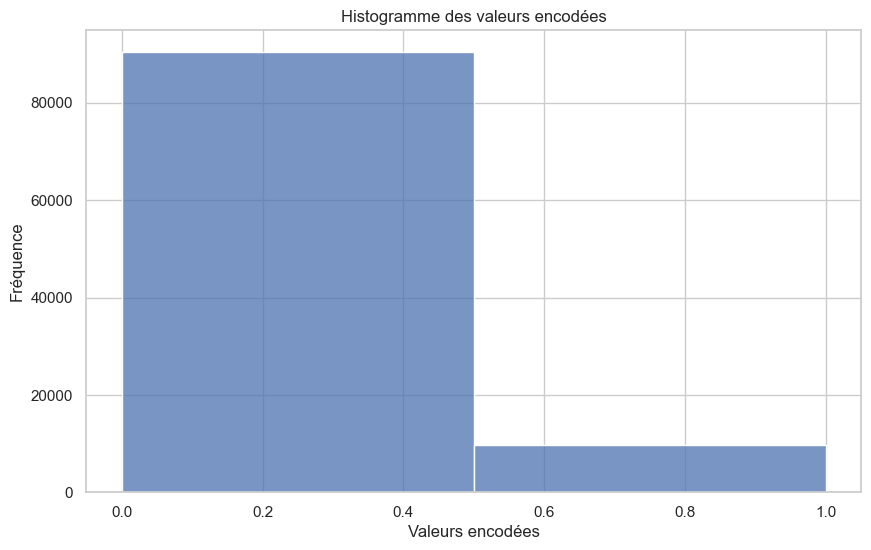

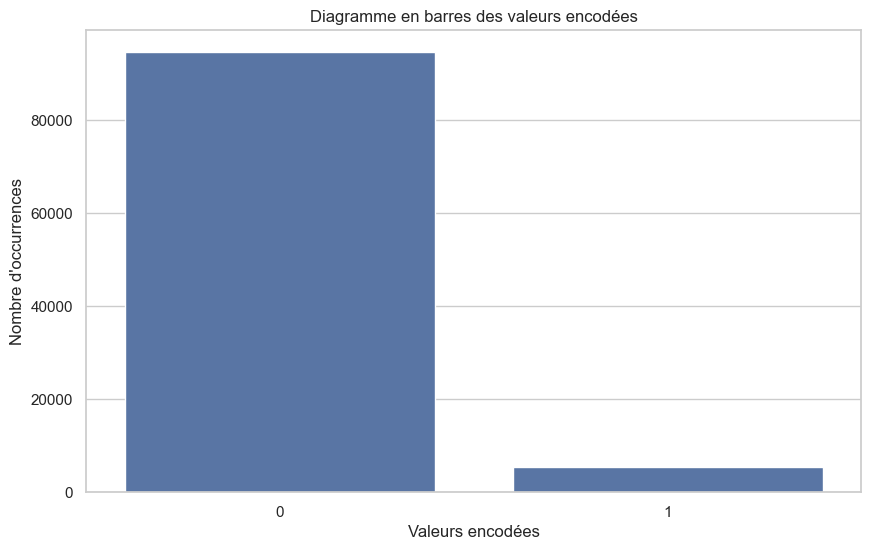

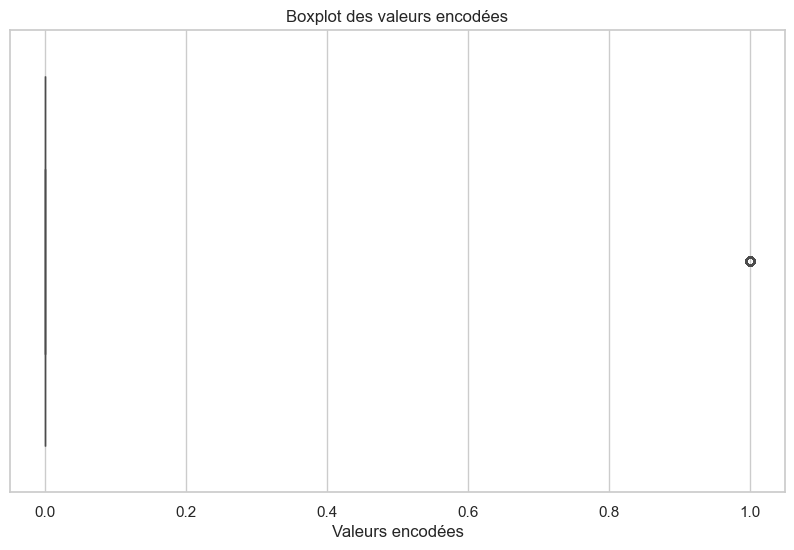

In [12]:
sns.set(style="whitegrid")

# Créer un histogramme des valeurs encodées
plt.figure(figsize=(10, 6))
sns.histplot(df['toxic'], bins=int(df['toxic'].max())+1, kde=False)
plt.title('Histogramme des valeurs encodées')
plt.xlabel('Valeurs encodées')
plt.ylabel('Fréquence')
plt.show()

# Créer un diagramme en barres pour les valeurs encodées
plt.figure(figsize=(10, 6))
sns.countplot(x='obscene', data=df)
plt.title('Diagramme en barres des valeurs encodées')
plt.xlabel('Valeurs encodées')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# Créer un boxplot des valeurs encodées
plt.figure(figsize=(10, 6))
sns.boxplot(x='obscene', data=df)
plt.title('Boxplot des valeurs encodées')
plt.xlabel('Valeurs encodées')
plt.show()

In [13]:
df['insult_or_identity_hate'] = (df['insult'] | df['identity_hate']).astype(int)

In [14]:
df.drop(['insult', 'identity_hate'], axis=1, inplace=True)

In [15]:
df.head(300)

id                                       comment_text  \
0    0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1    000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2    000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3    0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4    0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
..                ...                                                ...   
295  00be7dcac98dc95d  this user is such a worthless goddamn faggot f...   
296  00bef5aca1e725ca  It's an unsourced aesthetic opinion, and there...   
297  00bf0cb1048b5212  "\n\nImage:Popclassic.jpg\nI have tagged Image...   
298  00c0b8ed05ed7833  Fuck off\n\nYou are NOT an administrator. You ...   
299  00c0ba596a61d32d               "\nHow adorably disingenuous. →  ₪ "   

     toxic  obscene  insult_or_identity_hate  
0        0        0                        0  
1        0        0                        0  
2        0        0                        0  
3        0        0                        0  
4        0        0                        0  
..     ...      ...                      ...  
295      1        1                        1  
296      0        0                        0  
297      0        0                        0  
298      1        1                        0  
299      0        0                        0  

[300 rows x 5 columns]

In [16]:
df['obscene'] = df['obscene'].replace([1],[2])
df['insult_or_identity_hate'] = df['insult_or_identity_hate'].replace([1],[3])
df.head(300)

id                                       comment_text  \
0    0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1    000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2    000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3    0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4    0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
..                ...                                                ...   
295  00be7dcac98dc95d  this user is such a worthless goddamn faggot f...   
296  00bef5aca1e725ca  It's an unsourced aesthetic opinion, and there...   
297  00bf0cb1048b5212  "\n\nImage:Popclassic.jpg\nI have tagged Image...   
298  00c0b8ed05ed7833  Fuck off\n\nYou are NOT an administrator. You ...   
299  00c0ba596a61d32d               "\nHow adorably disingenuous. →  ₪ "   

     toxic  obscene  insult_or_identity_hate  
0        0        0                        0  
1        0        0                        0  
2        0        0                        0  
3        0        0                        0  
4        0        0                        0  
..     ...      ...                      ...  
295      1        2                        3  
296      0        0                        0  
297      0        0                        0  
298      1        2                        0  
299      0        0                        0  

[300 rows x 5 columns]

In [17]:
df['modo'] = df['toxic'].astype(str) + df['obscene'].astype(str) + df['insult_or_identity_hate'].astype(str)

In [18]:
df.head(300)

id                                       comment_text  \
0    0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1    000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2    000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3    0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4    0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
..                ...                                                ...   
295  00be7dcac98dc95d  this user is such a worthless goddamn faggot f...   
296  00bef5aca1e725ca  It's an unsourced aesthetic opinion, and there...   
297  00bf0cb1048b5212  "\n\nImage:Popclassic.jpg\nI have tagged Image...   
298  00c0b8ed05ed7833  Fuck off\n\nYou are NOT an administrator. You ...   
299  00c0ba596a61d32d               "\nHow adorably disingenuous. →  ₪ "   

     toxic  obscene  insult_or_identity_hate modo  
0        0        0                        0  000  
1        0        0                        0  000  
2        0        0                        0  000  
3        0        0                        0  000  
4        0        0                        0  000  
..     ...      ...                      ...  ...  
295      1        2                        3  123  
296      0        0                        0  000  
297      0        0                        0  000  
298      1        2                        0  120  
299      0        0                        0  000  

[300 rows x 6 columns]

In [19]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

modo_reshaped = df['modo'].values.reshape(-1, 1)

encoded_modo = encoder.fit_transform(modo_reshaped)

df['modo_encoded'] = encoded_modo

df.head(300)

id                                       comment_text  \
0    0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1    000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2    000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3    0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4    0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
..                ...                                                ...   
295  00be7dcac98dc95d  this user is such a worthless goddamn faggot f...   
296  00bef5aca1e725ca  It's an unsourced aesthetic opinion, and there...   
297  00bf0cb1048b5212  "\n\nImage:Popclassic.jpg\nI have tagged Image...   
298  00c0b8ed05ed7833  Fuck off\n\nYou are NOT an administrator. You ...   
299  00c0ba596a61d32d               "\nHow adorably disingenuous. →  ₪ "   

     toxic  obscene  insult_or_identity_hate modo  modo_encoded  
0        0        0                        0  000           0.0  
1        0        0                        0  000           0.0  
2        0        0                        0  000           0.0  
3        0        0                        0  000           0.0  
4        0        0                        0  000           0.0  
..     ...      ...                      ...  ...           ...  
295      1        2                        3  123           7.0  
296      0        0                        0  000           0.0  
297      0        0                        0  000           0.0  
298      1        2                        0  120           6.0  
299      0        0                        0  000           0.0  

[300 rows x 7 columns]

In [20]:
rows_with_encoded_7 = df[df['modo_encoded'] == 7.0]

In [21]:
rows_with_encoded_7

id                                       comment_text  \
6      0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
42     001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
43     00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
55     0020e7119b96eeeb  Stupid peace of shit stop deleting my stuff as...   
56     0020fd96ed3b8c8b  =Tony Sidaway is obviously a fistfuckee. He lo...   
...                 ...                                                ...   
99897  16a36ae652a2b7cf  Go fuk your mom you fukin faggot.  I'll commit...   
99961  170771c0fda966a0  "\n\n Kill yourself \n\nI mean just look at yo...   
99970  17125b4929a7abb3  "\n\n""Bitch, suck my dick before I slap you w...   
99972  1715923caedcbe9b  Vanalism and threats \n\nFuck off asshole. You...   
99979  171b0aa4af478af4  Hi everybody, I'm as ignorant as a monkey turd...   

       toxic  obscene  insult_or_identity_hate modo  modo_encoded  
6          1        2                        3  123           7.0  
42         1        2                        3  123           7.0  
43         1        2                        3  123           7.0  
55         1        2                        3  123           7.0  
56         1        2                        3  123           7.0  
...      ...      ...                      ...  ...           ...  
99897      1        2                        3  123           7.0  
99961      1        2                        3  123           7.0  
99970      1        2                        3  123           7.0  
99972      1        2                        3  123           7.0  
99979      1        2                        3  123           7.0  

[3788 rows x 7 columns]

In [22]:
df.drop(['toxic', 'obscene','insult_or_identity_hate'], axis=1, inplace=True)

In [23]:
df.head(300)

id                                       comment_text modo  \
0    0000997932d777bf  Explanation\nWhy the edits made under my usern...  000   
1    000103f0d9cfb60f  D'aww! He matches this background colour I'm s...  000   
2    000113f07ec002fd  Hey man, I'm really not trying to edit war. It...  000   
3    0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...  000   
4    0001d958c54c6e35  You, sir, are my hero. Any chance you remember...  000   
..                ...                                                ...  ...   
295  00be7dcac98dc95d  this user is such a worthless goddamn faggot f...  123   
296  00bef5aca1e725ca  It's an unsourced aesthetic opinion, and there...  000   
297  00bf0cb1048b5212  "\n\nImage:Popclassic.jpg\nI have tagged Image...  000   
298  00c0b8ed05ed7833  Fuck off\n\nYou are NOT an administrator. You ...  120   
299  00c0ba596a61d32d               "\nHow adorably disingenuous. →  ₪ "  000   

     modo_encoded  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
..            ...  
295           7.0  
296           0.0  
297           0.0  
298           6.0  
299           0.0  

[300 rows x 4 columns]

In [24]:
def treat_comment(comment):
    spacy_comment = nlp(comment, disable=["parser", "tagger", "ner", "textcat"])
    treated_tokens = []
    i = 0 
    for w in spacy_comment:
        if w.is_alpha and not w.is_stop:
            i += 1  
            print(f"Token {i}: {w.text}")  
            treated_tokens.append(w.text)
    return " ".join(treated_tokens)

In [ ]:
df['comment_text'] = df['comment_text'].apply(treat_comment)

C:\Users\12mou\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Token 1: Explanation
Token 2: edits
Token 3: username
Token 4: Hardcore
Token 5: Metallica
Token 6: Fan
Token 7: reverted
Token 8: vandalisms
Token 9: closure
Token 10: GAs
Token 11: voted
Token 12: New
Token 13: York
Token 14: Dolls
Token 15: FAC
Token 16: remove
Token 17: template
Token 18: talk
Token 19: page
Token 20: retired
Token 1: matches
Token 2: background
Token 3: colour
Token 4: seemingly
Token 5: stuck
Token 6: Thanks
Token 7: talk
Token 8: January
Token 9: UTC
Token 1: Hey
Token 2: man
Token 3: trying
Token 4: edit
Token 5: war
Token 6: guy
Token 7: constantly
Token 8: removing
Token 9: relevant
Token 10: information
Token 11: talking
Token 12: edits
Token 13: instead
Token 14: talk
Token 15: page
Token 16: care
Token 17: formatting
Token 18: actual
Token 19: info
Token 1: real
Token 2: suggestions
Token 3: improvement
Token 4: wondered
Token 5: section
Token 6: statistics
Token 7: later
Token 8: subsection
Token 9: types
Token 10: accidents
Token 11: think
Token 12: refe

Token 1: Snowflakes
Token 2: symmetrical
Token 3: Geometry
Token 4: stated
Token 5: snowflake
Token 6: symmetric
Token 7: arms
Token 8: assertion
Token 9: simply
Token 10: true
Token 11: According
Token 12: Kenneth
Token 13: Libbrecht
Token 14: unattractive
Token 15: irregular
Token 16: crystals
Token 17: far
Token 18: common
Token 19: variety
Token 20: need
Token 21: look
Token 22: site
Token 23: FACTS
Token 24: decent
Token 25: number
Token 26: falsities
Token 27: page
Token 28: forgive
Token 29: m
Token 30: new
Token 31: nt
Token 32: want
Token 33: edit
Token 1: Signpost
Token 2: September
Token 3: Read
Token 4: Signpost
Token 5: Single
Token 6: page
Token 7: Unsubscribe
Token 1: considering
Token 2: paragraph
Token 3: edit
Token 4: understand
Token 5: reasons
Token 6: recent
Token 7: edit
Token 8: article
Token 9: sure
Token 10: data
Token 11: necessarily
Token 12: wrong
Token 13: persuaded
Token 14: strategy
Token 15: introducing
Token 16: academic
Token 17: honors
Token 18: parag

Token 1: FUCK
Token 2: FILTHY
Token 3: MOTHER
Token 4: ASS
Token 5: DRY
Token 1: Sorry
Token 2: sorry
Token 3: screwed
Token 4: someones
Token 5: talk
Token 6: page
Token 7: bad
Token 8: know
Token 9: having
Token 10: templates
Token 11: talk
Token 12: page
Token 13: helps
Token 14: assert
Token 15: dominance
Token 16: know
Token 17: bow
Token 18: almighty
Token 19: administrators
Token 20: going
Token 21: play
Token 22: outside
Token 23: mom
Token 1: believe
Token 2: Lisak
Token 3: criticism
Token 4: present
Token 5: conforms
Token 6: NPV
Token 7: rule
Token 8: Lisak
Token 9: neutral
Token 10: point
Token 11: view
Token 12: begin
Token 13: offer
Token 14: polygraph
Token 15: concerned
Token 16: review
Token 17: polygraph
Token 18: results
Token 19: shocks
Token 20: complainant
Token 21: thinking
Token 22: lies
Token 23: uncovered
Token 24: recantation
Token 25: perfectly
Token 26: valid
Token 27: know
Token 28: telling
Token 29: truth
Token 30: argue
Token 31: machine
Token 32: invest

Token 1: believe
Token 2: fat
Token 3: Artie
Token 4: recent
Token 5: appearence
Token 6: Tonight
Token 7: Jay
Token 8: Leno
Token 9: looks
Token 10: absolutely
Token 11: AWFUL
Token 12: money
Token 13: Artie
Token 14: Lange
Token 15: miss
Token 16: candidate
Token 17: Dead
Token 18: pool
Token 19: Kindly
Token 20: malicious
Token 21: fingers
Token 22: comment
Token 23: Everytime
Token 24: remove
Token 25: repost
Token 1: Locking
Token 2: page
Token 3: violate
Token 4: WP
Token 5: NEWBIES
Token 6: like
Token 7: conservatives
Token 8: Wikipedians
Token 1: Bisexual
Token 2: like
Token 3: homosexual
Token 4: heterosexual
Token 5: defined
Token 6: sexual
Token 7: activity
Token 8: like
Token 9: year
Token 10: old
Token 11: boy
Token 12: attracted
Token 13: girl
Token 14: sexually
Token 15: sex
Token 16: straight
Token 17: person
Token 18: actually
Token 19: sexually
Token 20: attracted
Token 21: aroused
Token 22: sex
Token 23: opposite
Token 24: sex
Token 25: bisexual
Token 1: REDIRECT
Tok

Token 1: Screwjob
Token 2: Hey
Token 3: noticed
Token 4: comments
Token 5: Montreal
Token 6: Screwjob
Token 7: discussion
Token 8: page
Token 9: decided
Token 10: account
Token 11: objected
Token 12: said
Token 13: atleast
Token 14: change
Token 15: page
Token 16: little
Token 17: fair
Token 18: wanted
Token 19: tell
Token 20: thought
Token 21: like
Token 22: know
Token 23: changed
Token 24: words
Token 25: paragraph
Token 26: added
Token 27: second
Token 28: bothered
Token 29: s
Token 30: fine
Token 31: thought
Token 32: fighting
Token 33: said
Token 34: aswell
Token 35: tell
Token 1: April
Token 2: Thank
Token 3: experimenting
Token 4: page
Token 5: Andy
Token 6: Griffith
Token 7: Wikipedia
Token 8: test
Token 9: worked
Token 10: reverted
Token 11: removed
Token 12: use
Token 13: sandbox
Token 14: tests
Token 15: want
Token 16: look
Token 17: welcome
Token 18: page
Token 19: like
Token 20: learn
Token 21: contributing
Token 22: encyclopedia
Token 1: Christ
Token 2: IQ
Token 3: select

Token 1: Comment
Token 2: verify
Token 3: claim
Token 4: talk
Token 1: Czech
Token 2: Republic
Token 3: Central
Token 4: Europe
Token 5: state
Token 6: article
Token 7: reason
Token 8: people
Token 9: making
Token 10: confusions
Token 11: Especially
Token 12: ridiculous
Token 13: replace
Token 14: mention
Token 15: North
Token 16: Caucasus
Token 17: favor
Token 18: north
Token 19: slope
Token 20: Caucasus
Token 21: Mountains
Token 22: nt
Token 23: geographical
Token 24: area
Token 25: denoting
Token 26: mountains
Token 27: region
Token 28: Countries
Token 29: located
Token 30: continents
Token 31: reason
Token 32: refuse
Token 33: allow
Token 34: article
Token 35: denoted
Token 36: continent
Token 37: single
Token 38: factor
Token 39: massive
Token 40: difference
Token 41: readers
Token 42: tired
Token 43: arguing
Token 44: people
Token 45: essentially
Token 46: wiki
Token 47: squatters
Token 48: refusing
Token 49: nudge
Token 50: given
Token 51: article
Token 1: Thanks
Token 2: Josett

Token 1: New
Token 2: WikiProject
Token 3: Novels
Token 4: initiative
Token 5: begun
Token 6: new
Token 7: initiative
Token 8: WikiProject
Token 9: Novels
Token 10: improvement
Token 11: drive
Token 12: member
Token 13: listed
Token 14: notified
Token 15: Wikipedia
Token 16: talk
Token 17: WikiProject
Token 18: Improvement
Token 19: Drive
Token 20: Wikipedia
Token 21: WikiProject
Token 22: Novels
Token 23: Collaboration
Token 24: details
Token 25: like
Token 26: remind
Token 27: eye
Token 28: project
Token 29: talk
Token 30: page
Token 31: Wikipedia
Token 32: talk
Token 33: WikiProject
Token 34: Novels
Token 35: Thanks
Token 1: Reply
Token 2: facetious
Token 3: relayed
Token 4: message
Token 5: Jza
Token 6: MRSC
Token 7: words
Token 8: stern
Token 9: like
Token 10: evidence
Token 11: claims
Token 12: talk
Token 13: glad
Token 14: provide
Token 15: failed
Token 16: provide
Token 17: diffs
Token 18: message
Token 19: regards
Token 20: words
Token 21: claiming
Token 22: offesive
Token 23:

Token 1: Actually
Token 2: direct
Token 3: quotes
Token 4: quotation
Token 5: marks
Token 6: attributed
Token 7: generally
Token 8: known
Token 9: plagiarism
Token 10: copyright
Token 11: infringement
Token 12: NYT
Token 13: material
Token 14: issue
Token 15: know
Token 16: material
Token 17: Jewish
Token 18: Action
Token 19: Taskforce
Token 20: problem
Token 1: Katelyn
Token 2: Faber
Token 3: weigh
Token 4: Talk
Token 5: Page
Token 6: Katelyn
Token 7: Faber
Token 8: inclusion
Token 9: image
Token 10: Template
Token 11: User
Token 12: Totalbox
Token 13: Thanks
Token 14: reverting
Token 15: Esperanza
Token 16: Newsletter
Token 17: Issue
Token 18: solid
Token 19: background
Token 20: vertical
Token 21: align
Token 22: Reach
Token 23: outReach
Token 24: program
Token 25: aimed
Token 26: allowing
Token 27: users
Token 28: bring
Token 29: issues
Token 30: Wikipedia
Token 31: listening
Token 32: sympathetic
Token 33: caring
Token 34: audience
Token 35: know
Token 36: feel
Token 37: expect
To

Token 1: George
Token 2: Bush
Token 3: approval
Token 4: rating
Token 5: graph
Token 6: circle
Token 7: September
Token 8: attacks
Token 9: looks
Token 10: far
Token 11: right
Token 12: Think
Token 13: update
Token 14: data
Token 15: points
Token 16: post
Token 17: omitted
Token 1: Sorry
Token 2: interrupt
Token 3: edits
Token 4: likely
Token 5: pages
Token 6: asking
Token 7: help
Token 8: maybe
Token 9: maybe
Token 10: kind
Token 11: counts
Token 12: Amulet
Token 1: Absolutely
Token 2: use
Token 3: word
Token 4: strongly
Token 5: misleading
Token 6: structure
Token 7: mastaba
Token 8: burial
Token 9: chamber
Token 10: basicly
Token 11: Mastaba
Token 12: definition
Token 13: entran
Token 14: ceinner
Token 15: space
Token 16: structure
Token 17: solid
Token 18: pile
Token 19: rocks
Token 20: inner
Token 21: space
Token 22: entrances
Token 23: ment
Token 24: wall
Token 25: fragment
Token 1: noticed
Token 2: neutrality
Token 3: article
Token 4: disputed
Token 5: light
Token 6: ask
Token 7

Token 1: ref
Token 2: article
Token 3: mentioned
Token 4: Wikipedia
Token 5: Youngest
Token 6: Patent
Token 7: holder
Token 8: India
Token 9: mentioned
Token 10: news
Token 11: latest
Token 12: book
Token 13: real
Token 14: life
Token 15: heroes
Token 16: providing
Token 17: notable
Token 18: reliable
Token 19: reference
Token 20: feel
Token 21: DNA
Token 22: group
Token 23: reliable
Token 24: notable
Token 25: reference
Token 26: page
Token 27: exists
Token 28: Wikipedia
Token 29: believe
Token 30: provide
Token 31: information
Token 32: article
Token 33: having
Token 34: bad
Token 35: intentions
Token 36: words
Token 37: sock
Token 38: meatpuppets
Token 39: asked
Token 40: suggested
Token 41: edit
Token 42: write
Token 43: free
Token 44: man
Token 45: send
Token 46: information
Token 47: free
Token 48: person
Token 49: analyse
Token 50: Wikipedia
Token 51: ref
Token 52: article
Token 53: mentioned
Token 54: Wikipedia
Token 55: Youngest
Token 56: Patent
Token 57: holder
Token 58: Indi

Token 1: organization
Token 2: sub
Token 3: topics
Token 4: Culture
Token 5: thrown
Token 6: way
Token 7: end
Token 8: economy
Token 9: tourism
Token 10: inappropriate
Token 11: information
Token 12: section
Token 13: unnecessarily
Token 14: loaded
Token 15: history
Token 16: detailed
Token 17: geography
Token 18: makes
Token 19: uninteresting
Token 20: repetitive
Token 21: Information
Token 22: interspersed
Token 23: sub
Token 24: sections
Token 25: regard
Token 26: fit
Token 27: Eg
Token 28: Geography
Token 29: section
Token 30: starts
Token 31: fact
Token 32: largest
Token 33: state
Token 34: strictly
Token 35: geography
Token 36: belongs
Token 37: introduction
Token 38: Climate
Token 39: belongs
Token 40: page
Token 41: toursim
Token 42: Regions
Token 43: cities
Token 44: interesting
Token 45: combination
Token 46: case
Token 47: Cities
Token 48: Uttar
Token 49: Pradesh
Token 50: interesting
Token 51: topic
Token 52: interesting
Token 53: cities
Token 54: regions
Token 55: speciali

Token 1: Thanks
Token 2: copy
Token 3: edit
Token 4: OMG
Token 5: reads
Token 6: professional
Token 7: appreciate
Token 8: lot
Token 9: Yeah
Token 10: knew
Token 11: problem
Token 12: Okay
Token 13: story
Token 14: Danny
Token 15: body
Token 16: paint
Token 17: robot
Token 18: sketch
Token 19: party
Token 20: theme
Token 21: black
Token 22: light
Token 23: everybody
Token 24: Danny
Token 25: paint
Token 26: washed
Token 27: sure
Token 28: Jack
Token 29: black
Token 30: light
Token 31: switch
Token 32: apartment
Token 33: Liz
Token 34: came
Token 35: turned
Token 36: resulted
Token 37: Liz
Token 38: having
Token 39: paint
Token 40: said
Token 41: sense
Token 42: read
Token 43: paint
Token 44: Danny
Token 45: black
Token 46: light
Token 47: attack
Token 48: Yeah
Token 49: thought
Token 50: maybe
Token 51: people
Token 52: saw
Token 53: GA
Token 54: note
Token 55: wo
Token 56: leave
Token 57: message
Token 58: work
Token 59: user
Token 60: left
Token 61: message
Token 62: article
Token 63

Token 1: focussing
Token 2: science
Token 3: moment
Token 4: leading
Token 5: revolution
Token 1: question
Token 2: style
Token 3: information
Token 4: stripping
Token 5: occur
Token 6: shape
Token 7: edited
Token 8: intrusive
Token 9: edits
Token 10: moving
Token 11: shape
Token 12: highlighting
Token 13: selecting
Token 14: shape
Token 15: Inkscape
Token 16: makes
Token 17: unusable
Token 18: messing
Token 19: Inkscape
Token 1: Article
Token 2: Ed
Token 3: Morrissey
Token 4: Hi
Token 5: moved
Token 6: article
Token 7: Ed
Token 8: Morrissey
Token 9: Captain
Token 10: Quarters
Token 11: Ed
Token 12: Morrissey
Token 13: started
Token 14: bringing
Token 15: date
Token 16: able
Token 17: look
Token 18: fix
Token 19: defects
Token 20: spot
Token 21: Thanks
Token 22: CWC
Token 1: running
Token 2: TALK
Token 3: pages
Token 4: accusing
Token 5: EDIT
Token 6: WARS
Token 7: prove
Token 8: blocked
Token 9: prove
Token 10: POV
Token 11: defeated
Token 12: going
Token 13: making
Token 14: accusati

Token 1: Yes
Token 2: definite
Token 3: value
Token 4: documenting
Token 5: Scientific
Token 6: Instrument
Token 7: Module
Token 8: believe
Token 9: belongs
Token 10: Service
Token 11: module
Token 12: sectors
Token 13: subsection
Token 14: payload
Token 15: actually
Token 16: spacecraft
Token 17: services
Token 18: interrupts
Token 19: flow
Token 20: plan
Token 21: Apollo
Token 22: Program
Token 23: Mission
Token 24: types
Token 25: section
Token 26: think
Token 27: belongs
Token 28: edit
Token 29: sectors
Token 30: subsection
Token 31: improve
Token 32: wording
Token 33: flow
Token 34: bit
Token 1: Thank
Token 2: Hei
Token 3: William
Token 4: Hope
Token 5: fan
Token 6: Guess
Token 7: new
Token 8: IP
Token 9: ready
Token 10: vandalize
Token 11: William
Token 12: Hope
Token 13: sh
Token 14: t
Token 15: stop
Token 16: maybe
Token 17: delay
Token 18: stopping
Token 19: lets
Token 20: salute
Token 21: William
Token 22: Hope
Token 23: lunacy
Token 24: shoving
Token 25: p
Token 26: nis
Toke

Token 1: Upgraded
Token 2: Human
Token 3: Language
Token 4: Families
Token 5: Language
Token 6: Families
Token 7: wikicolors
Token 8: File
Token 1: kitten
Token 2: good
Token 3: person
Token 1: Ok
Token 2: peer
Token 3: viewed
Token 4: months
Token 5: published
Token 6: Academic
Token 7: archive
Token 8: line
Token 9: DiVA
Token 10: permanent
Token 11: URI
Token 12: urn
Token 13: nbn
Token 14: se
Token 15: kau
Token 16: Wallin
Token 17: p
Token 18: investigation
Token 19: friction
Token 20: graphs
Token 21: ranking
Token 22: ability
Token 23: galling
Token 24: phenomenon
Token 25: dry
Token 26: SOFS
Token 27: contact
Token 28: Adhesive
Token 29: material
Token 30: transfer
Token 31: friction
Token 32: free
Token 33: pdf
Token 34: document
Token 35: available
Token 36: found
Token 37: use
Token 38: search
Token 39: Harald
Token 40: Wallin
Token 41: direct
Token 42: libris
Token 43: link
Token 1: POV
Token 2: pushing
Token 3: Faustian
Token 4: inserted
Token 5: article
Token 6: UPA
Token

Token 1: revised
Token 2: translation
Token 3: Spanish
Token 4: going
Token 5: earlier
Token 6: edit
Token 7: Subsequent
Token 8: edits
Token 9: Spanish
Token 10: language
Token 11: Wikipedia
Token 12: intended
Token 13: mainly
Token 14: insert
Token 15: links
Token 16: primarily
Token 17: succeeded
Token 18: deleting
Token 19: chunks
Token 20: original
Token 21: text
Token 22: rendering
Token 23: result
Token 24: ungrammatical
Token 25: somewhat
Token 26: insensible
Token 27: taken
Token 28: translation
Token 29: incorporated
Token 30: previously
Token 31: omitted
Token 32: text
Token 33: gone
Token 34: idiomatic
Token 35: English
Token 36: hopefully
Token 37: serviceable
Token 1: sorry
Token 2: like
Token 3: answer
Token 4: accept
Token 5: wording
Token 6: word
Token 7: article
Token 8: reflect
Token 9: reflected
Token 10: sources
Token 11: patients
Token 12: happy
Token 13: successful
Token 14: operation
Token 15: care
Token 16: Yugoslav
Token 17: Media
Token 18: Yugoslav
Token 19: 

Token 1: Unfortunately
Token 2: judging
Token 3: previous
Token 4: warnings
Token 5: people
Token 6: unusual
Token 7: view
Token 8: personal
Token 9: attacks
Token 10: Pointing
Token 11: individuals
Token 12: accusing
Token 13: sockpuppets
Token 14: incorrect
Token 15: fact
Token 16: main
Token 17: people
Token 18: making
Token 19: accusations
Token 20: harassing
Token 21: months
Token 22: sockpuppets
Token 23: meat
Token 24: puppets
Token 25: getting
Token 26: edit
Token 27: conflicts
Token 28: stack
Token 29: votes
Token 30: Request
Token 31: Admin
Token 32: proceding
Token 33: pointed
Token 34: editors
Token 35: time
Token 36: certainly
Token 37: considered
Token 38: personal
Token 39: attack
Token 40: Pointing
Token 41: admins
Token 42: actual
Token 43: policy
Token 44: basis
Token 45: blocks
Token 46: personal
Token 47: attack
Token 48: fact
Token 49: confirmed
Token 50: overruling
Token 51: blocks
Token 52: Frankly
Token 53: looking
Token 54: personal
Token 55: attacks
Token 56: 

Token 1: January
Token 2: UTC
Token 3: argument
Token 4: WP
Token 5: NATURAL
Token 6: rely
Token 7: showing
Token 8: common
Token 9: need
Token 10: prove
Token 11: common
Token 12: Numbers
Token 13: help
Token 14: bit
Token 15: told
Token 16: Gohatto
Token 17: 御法度
Token 18: film
Token 19: Japan
Token 20: turned
Token 21: false
Token 22: Incidentally
Token 23: Ryuhei
Token 24: Matsuda
Token 25: looks
Token 26: like
Token 27: mother
Token 28: father
Token 29: think
Token 30: authentic
Token 31: portrayal
Token 32: Shinsengumi
Token 33: film
Token 34: historical
Token 35: insights
Token 1: Unspecified
Token 2: source
Token 3: Image
Token 4: Thanks
Token 5: uploading
Token 6: Image
Token 7: noticed
Token 8: file
Token 9: description
Token 10: page
Token 11: currently
Token 12: specify
Token 13: created
Token 14: content
Token 15: copyright
Token 16: status
Token 17: unclear
Token 18: create
Token 19: file
Token 20: need
Token 21: specify
Token 22: owner
Token 23: copyright
Token 24: obtain

Token 1: ARTPOP
Token 2: album
Token 3: Hello
Token 4: thank
Token 5: contributions
Token 6: message
Token 7: good
Token 8: faith
Token 9: hidden
Token 10: comments
Token 11: like
Token 12: stating
Token 13: editor
Token 14: blocked
Token 15: remove
Token 16: redirect
Token 17: position
Token 18: asking
Token 19: saying
Token 20: turnaway
Token 21: new
Token 22: contributors
Token 23: aware
Token 24: rules
Token 25: feeling
Token 26: bitten
Token 27: case
Token 28: think
Token 29: kind
Token 30: user
Token 31: talk
Token 32: page
Token 33: message
Token 34: appropriate
Token 35: effective
Token 36: edit
Token 37: reverted
Token 38: reverted
Token 39: version
Token 40: removed
Token 41: block
Token 42: warning
Token 43: appropriate
Token 44: admin
Token 45: block
Token 46: user
Token 47: removed
Token 48: redirect
Token 49: specially
Token 50: hidden
Token 51: message
Token 52: warning
Token 53: Feel
Token 54: free
Token 55: correct
Token 56: wrong
Token 57: write
Token 58: good
Token 5

Token 1: funny
Token 2: exactly
Token 3: thing
Token 4: anonymous
Token 5: user
Token 6: ip
Token 7: greece
Token 8: user
Token 9: WilliamThweatt
Token 10: Accusing
Token 11: people
Token 12: reason
Token 13: allowed
Token 14: wikipedia
Token 15: wikipedia
Token 16: rules
Token 17: free
Token 18: ask
Token 19: investigation
Token 20: fact
Token 21: kindly
Token 22: ask
Token 23: vandalism
Token 24: persists
Token 25: seek
Token 26: arbitration
Token 27: kindly
Token 28: ask
Token 29: moderator
Token 30: reverts
Token 31: confident
Token 32: conclude
Token 33: mal
Token 34: intentioned
Token 35: clear
Token 36: nationalistic
Token 37: agenda
Token 38: guys
Token 39: common
Token 40: greek
Token 1: watched
Token 2: entire
Token 3: series
Token 4: agree
Token 5: entire
Token 6: article
Token 7: suzumiya
Token 8: haruhi
Token 9: articles
Token 10: somebody
Token 11: knows
Token 12: haruhi
Token 13: personally
Token 14: sort
Token 15: view
Token 16: m
Token 17: going
Token 18: fix
Token 1: 

Token 1: Hi
Token 2: Fracophonie
Token 3: Thanks
Token 4: taking
Token 5: time
Token 6: write
Token 7: long
Token 8: message
Token 9: appreciate
Token 10: terms
Token 11: said
Token 12: age
Token 13: mean
Token 14: cause
Token 15: offense
Token 16: thought
Token 17: read
Token 18: decisions
Token 19: think
Token 20: getting
Token 21: confused
Token 22: check
Token 23: user
Token 24: privileges
Token 25: read
Token 26: policies
Token 27: read
Token 28: rest
Token 29: later
Token 30: today
Token 31: troll
Token 32: need
Token 33: time
Token 34: acronyms
Token 35: policies
Token 36: etc
Token 37: started
Token 38: writing
Token 39: article
Token 40: favourite
Token 41: website
Token 42: turned
Token 43: massive
Token 44: thing
Token 45: expecting
Token 46: time
Token 47: argue
Token 48: debate
Token 49: usrs
Token 50: clear
Token 51: want
Token 52: deleted
Token 53: despite
Token 54: said
Token 55: example
Token 56: user
Token 57: wrote
Token 58: site
Token 59: called
Token 60: precisely


Token 1: IMDb
Token 2: content
Token 3: user
Token 4: submitted
Token 5: subject
Token 6: incorrect
Token 7: speculation
Token 8: rumor
Token 9: use
Token 10: IMDb
Token 11: Wikipedia
Token 12: referencing
Token 13: considered
Token 14: unacceptable
Token 15: strongly
Token 16: discouraged
Token 17: WikiProject
Token 18: Film
Token 19: Resources
Token 20: self
Token 21: published
Token 22: media
Token 23: largely
Token 24: acceptable
Token 25: includes
Token 26: website
Token 27: content
Token 28: largely
Token 29: user
Token 30: generated
Token 31: including
Token 32: Internet
Token 33: Movie
Token 34: Database
Token 35: USERG
Token 36: said
Token 37: long
Token 38: standing
Token 39: consensus
Token 40: disagree
Token 41: encourage
Token 42: Wikipedia
Token 43: Noticeboard
Token 1: new
Token 2: means
Token 3: communicating
Token 4: sure
Token 5: expressing
Token 6: right
Token 7: form
Token 8: reviewing
Token 9: recent
Token 10: MA
Token 11: nominations
Token 12: expected
Token 13: w

Token 1: recaptcha
Token 2: defamatory
Token 3: relates
Token 4: computer
Token 5: system
Token 6: living
Token 7: person
Token 8: ReCAPTCHA
Token 9: forces
Token 10: users
Token 11: solve
Token 12: Captcha
Token 13: access
Token 14: service
Token 15: question
Token 16: Forced
Token 17: labor
Token 18: definition
Token 19: slave
Token 20: labor
Token 21: going
Token 22: revert
Token 23: reversion
Token 24: report
Token 25: vandalism
Token 26: send
Token 27: threatening
Token 28: messages
Token 29: tia
Token 1: Question
Token 2: Possible
Token 3: Citation
Token 4: sorry
Token 5: missed
Token 6: question
Token 7: pay
Token 8: attention
Token 9: page
Token 10: response
Token 11: question
Token 12: let
Token 13: start
Token 14: repeating
Token 15: boilerplate
Token 16: formulation
Token 17: job
Token 18: Wikipedia
Token 19: editors
Token 20: verifiably
Token 21: summarize
Token 22: reliable
Token 23: sources
Token 24: neutral
Token 25: point
Token 26: view
Token 27: worked
Token 28: origin

Token 1: agree
Token 2: clearly
Token 3: media
Token 4: spouses
Token 5: household
Token 6: names
Token 7: stop
Token 8: Jim
Token 9: rightly
Token 10: points
Token 11: Rein
Token 12: notable
Token 13: political
Token 14: spouses
Token 15: prominence
Token 16: businesswoman
Token 17: potential
Token 18: conflict
Token 19: interest
Token 20: trying
Token 21: avoid
Token 22: Nick
Token 1: Security
Token 2: Reasons
Token 3: edit
Token 4: war
Token 5: said
Token 6: edit
Token 7: summary
Token 8: term
Token 9: Security
Token 10: Reasons
Token 11: ambiguous
Token 12: properly
Token 13: established
Token 14: source
Token 15: unnecessary
Token 16: crystal
Token 17: ball
Token 18: know
Token 19: said
Token 20: earlier
Token 21: Janes
Token 22: perfect
Token 23: reason
Token 24: MG
Token 25: manufacturers
Token 26: alter
Token 27: parts
Token 28: interchange
Token 29: BATFE
Token 30: makes
Token 31: Suddenly
Token 32: Glock
Token 33: different
Token 34: Yeah
Token 35: guess
Token 36: like
Token 

Token 1: think
Token 2: entire
Token 3: article
Token 4: tagged
Token 5: politicized
Token 6: future
Token 7: trends
Token 8: speculative
Token 9: point
Token 10: scientists
Token 11: learners
Token 12: increasingly
Token 13: know
Token 14: teachers
Token 15: Yes
Token 16: probably
Token 17: educated
Token 18: guesses
Token 19: better
Token 20: educated
Token 21: guess
Token 22: notice
Token 23: totally
Token 24: spewing
Token 25: unnecessary
Token 26: carbon
Token 27: statement
Token 28: think
Token 29: article
Token 30: superbly
Token 31: misses
Token 32: point
Token 33: pollution
Token 34: waste
Token 35: TYPES
Token 36: stupid
Token 37: ways
Token 38: things
Token 39: better
Token 40: ways
Token 41: known
Token 42: making
Token 43: guinea
Token 44: pigs
Token 45: planet
Token 46: species
Token 47: points
Token 1: Car
Token 2: Expert
Token 3: page
Token 4: image
Token 5: Thank
Token 6: note
Token 7: image
Token 8: Car
Token 9: Expert
Token 10: magazine
Token 11: copyright
Token 12: 

Token 1: Nigel
Token 2: wiki
Token 3: standards
Token 4: use
Token 5: external
Token 6: link
Token 7: proper
Token 8: context
Token 9: article
Token 10: useful
Token 11: tasteful
Token 12: informative
Token 13: factual
Token 14: etc
Token 15: functional
Token 16: link
Token 17: likely
Token 18: continue
Token 19: functional
Token 20: link
Token 21: link
Token 22: considered
Token 23: merits
Token 24: following
Token 25: guidelines
Token 26: number
Token 27: external
Token 28: links
Token 29: article
Token 30: grows
Token 31: longer
Token 32: assessment
Token 33: stricter
Token 34: doubt
Token 35: appropriateness
Token 36: adding
Token 37: new
Token 38: links
Token 39: suggestion
Token 40: article
Token 41: talkpage
Token 42: discuss
Token 43: editors
Token 44: generally
Token 45: avoid
Token 46: external
Token 47: links
Token 48: takes
Token 49: directly
Token 50: home
Token 51: page
Token 52: aircraft
Token 53: question
Token 54: link
Token 55: directly
Token 56: NASM
Token 57: page
T

Token 1: AGF
Token 2: requires
Token 3: think
Token 4: reverting
Token 5: user
Token 6: preferred
Token 7: version
Token 8: look
Token 9: better
Token 10: allow
Token 11: admin
Token 12: edit
Token 1: Accents
Token 2: cartoon
Token 3: established
Token 4: Mario
Token 5: Luigi
Token 6: Brooklyn
Token 7: fact
Token 8: commonly
Token 9: accepted
Token 10: fans
Token 11: despite
Token 12: having
Token 13: mentioned
Token 14: games
Token 15: Toad
Token 16: speak
Token 17: thicker
Token 18: Brooklyn
Token 19: accent
Token 20: accents
Token 21: mentioned
Token 22: games
Token 23: TV
Token 24: presumably
Token 25: licensed
Token 26: product
Token 27: Nintendo
Token 28: decided
Token 29: Italian
Token 30: accent
Token 31: fans
Token 32: assumed
Token 33: TV
Token 34: later
Token 35: movie
Token 36: accent
Token 37: official
Token 38: standing
Token 39: Nintendo
Token 40: products
Token 41: included
Token 42: digitized
Token 43: recorded
Token 44: speech
Token 45: realize
Token 46: Nintendo
Toke

Token 1: confusion
Token 2: controversy
Token 3: real
Token 4: world
Token 5: preclude
Token 6: writing
Token 7: good
Token 8: Wikipedia
Token 9: topic
Token 10: Ackoz
Token 11: suggests
Token 12: real
Token 13: world
Token 14: hashed
Token 15: truth
Token 16: expulsions
Token 17: impossible
Token 18: know
Token 19: truth
Token 20: impossible
Token 21: write
Token 22: reject
Token 23: stance
Token 24: think
Token 25: difficult
Token 26: possible
Token 27: write
Token 28: quality
Token 29: Wikipedia
Token 30: article
Token 31: topic
Token 32: murky
Token 33: controversial
Token 34: Wikipedia
Token 35: editors
Token 36: wrong
Token 37: believe
Token 38: Wikipedia
Token 39: job
Token 40: report
Token 41: truth
Token 42: wrong
Token 43: Wikipedia
Token 44: job
Token 45: report
Token 46: truth
Token 47: precisely
Token 48: difficult
Token 49: determine
Token 50: truth
Token 51: attempt
Token 52: original
Token 53: research
Token 54: Instead
Token 55: truth
Token 56: Wikipedia
Token 57: aims

Token 1: d
Token 2: Homeonttherange
Token 3: typical
Token 4: problem
Token 5: literal
Token 6: term
Token 7: Personal
Token 8: Union
Token 9: special
Token 10: limited
Token 11: Constitutional
Token 12: term
Token 13: refers
Token 14: States
Token 15: countries
Token 16: recognise
Token 17: Monarch
Token 18: Head
Token 19: State
Token 20: UNION
Token 21: PARLIAMENTS
Token 22: examples
Token 23: Union
Token 24: Kalmar
Token 25: members
Token 26: Kingdoms
Token 27: Denmark
Token 28: Norway
Token 29: Sweden
Token 30: gave
Token 31: rise
Token 32: termUnited
Token 33: Scandinavia
Token 34: believe
Token 35: Sweden
Token 36: left
Token 37: Union
Token 38: resulting
Token 39: left
Token 40: Union
Token 41: Denmark
Token 42: Norway
Token 43: dissolved
Token 44: allied
Token 45: Napolean
Token 46: tunrned
Token 47: badly
Token 1: think
Token 2: DayZ
Token 3: mod
Token 4: DayZ
Token 5: video
Token 6: game
Token 7: DayZ
Token 8: disambiguation
Token 9: page
Token 1: pushing
Token 2: anti
Token 

Token 1: agree
Token 2: Leontes
Token 3: began
Token 4: attempting
Token 5: compromise
Token 6: night
Token 7: considering
Token 8: backing
Token 9: interest
Token 10: building
Token 11: consensus
Token 12: note
Token 13: political
Token 14: descriptors
Token 15: absence
Token 16: reliable
Token 17: party
Token 18: sources
Token 19: inappropriate
Token 20: article
Token 21: note
Token 22: commenters
Token 23: appear
Token 24: confusing
Token 25: electoral
Token 26: vote
Token 27: website
Token 28: electoral
Token 29: vote
Token 30: author
Token 31: Wikipedia
Token 32: article
Token 33: website
Token 34: author
Token 35: article
Token 1: Dispatch
Token 2: review
Token 3: added
Token 4: comments
Token 5: think
Token 6: wonderful
Token 7: dispatch
Token 8: clear
Token 9: needed
Token 10: like
Token 11: long
Token 12: time
Token 1: vote
Token 2: Christ
Token 3: Pantocrator
Token 4: nice
Token 5: wider
Token 6: crop
Token 1: idea
Token 2: fuck
Token 3: cumshitter
Token 1: assistance
Token 2

Token 1: evidence
Token 2: sure
Token 3: familiar
Token 4: notes
Token 5: suspect
Token 6: editing
Token 7: evidence
Token 8: page
Token 1: AfD
Token 2: Wikipedia
Token 3: Articles
Token 4: deletion
Token 5: Revelations
Token 6: Guidelines
Token 7: notability
Token 8: outlined
Token 9: generally
Token 10: WP
Token 11: N
Token 12: specifically
Token 13: songs
Token 14: WP
Token 15: NSONG
Token 16: Thank
Token 1: Organizations
Token 2: Start
Token 3: Low
Token 4: Yes
Token 5: Yes
Token 6: WikiProject
Token 1: Actions
Token 2: la
Token 3: la
Token 4: land
Token 5: real
Token 6: world
Token 7: consequences
Token 1: Dean
Token 2: Wormer
Token 3: Works
Token 4: Racists
Token 5: Jena
Token 6: continue
Token 7: update
Token 8: posting
Token 9: Jena
Token 10: LA
Token 11: reflect
Token 12: fact
Token 13: thier
Token 14: famous
Token 15: person
Token 16: note
Token 17: SEGREGATIONIST
Token 18: DEMOCRAT
Token 19: fact
Token 20: historically
Token 21: accurate
Token 22: description
Token 1: Woopsi

Token 1: Referring
Token 2: Catherine
Token 3: told
Token 4: uncertain
Token 5: terms
Token 6: refer
Token 7: living
Token 8: dead
Token 9: names
Token 10: WP
Token 11: female
Token 12: title
Token 13: referred
Token 14: article
Token 15: ie
Token 16: Lady
Token 17: Amy
Token 18: Lady
Token 19: Dudley
Token 20: Amy
Token 21: Robsart
Token 22: Lady
Token 23: Amy
Token 24: wrong
Token 25: married
Token 26: daughter
Token 27: knight
Token 28: title
Token 29: wrong
Token 30: Northumberland
Token 31: attainted
Token 32: children
Token 33: lost
Token 34: styles
Token 35: offspring
Token 36: earl
Token 37: duke
Token 38: Lady
Token 39: Dudley
Token 40: Elizabeth
Token 41: knighted
Token 42: Robert
Token 43: Dudley
Token 44: near
Token 45: end
Token 46: Amy
Token 47: life
Token 48: Lady
Token 49: Amy
Token 50: Dudley
Token 51: legally
Token 52: longer
Token 53: wife
Token 54: son
Token 55: earl
Token 56: duke
Token 57: thought
Token 58: simpler
Token 59: refer
Token 60: Amy
Token 61: explain
T

Token 1: shit
Token 2: face
Token 3: fuck
Token 1: retarded
Token 1: Users
Token 2: sockpuppets
Token 3: discussion
Token 4: Note
Token 5: user
Token 6: nightscream
Token 7: soliciting
Token 8: sockpuppets
Token 9: Toure
Token 10: Neblett
Token 11: join
Token 12: discussion
Token 13: surprising
Token 14: considering
Token 15: nightscream
Token 16: slimy
Token 17: debating
Token 18: tactics
Token 19: ad
Token 20: hominem
Token 21: smears
Token 22: looks
Token 23: like
Token 24: reality
Token 25: actual
Token 26: people
Token 27: opposed
Token 28: teh
Token 29: inclusion
Token 30: rest
Token 31: sockpuppets
Token 32: guess
Token 33: demonstrates
Token 34: Nightscream
Token 35: Toure
Token 36: sockpuppets
Token 37: FYI
Token 38: user
Token 39: simply
Token 40: clear
Token 41: sockpuppet
Token 1: Thanks
Token 2: Stephan
Token 3: interpretation
Token 4: removed
Token 5: content
Token 6: discussing
Token 7: talk
Token 8: page
Token 9: concerned
Token 10: contents
Token 11: reliability
Token 

Token 1: Thank
Token 2: experimenting
Token 3: Wikipedia
Token 4: test
Token 5: worked
Token 6: reverted
Token 7: removed
Token 8: use
Token 9: sandbox
Token 10: tests
Token 11: want
Token 12: look
Token 13: welcome
Token 14: page
Token 15: learn
Token 16: contributing
Token 17: encyclopedia
Token 18: talk
Token 19: contrb
Token 1: article
Token 2: Sebastien
Token 3: Larroudé
Token 4: speedily
Token 5: deleted
Token 6: Wikipedia
Token 7: article
Token 8: person
Token 9: group
Token 10: people
Token 11: band
Token 12: club
Token 13: company
Token 14: web
Token 15: content
Token 16: indicate
Token 17: subject
Token 18: notable
Token 19: article
Token 20: subject
Token 21: included
Token 22: Wikipedia
Token 23: criteria
Token 24: speedy
Token 25: deletion
Token 26: articles
Token 27: assert
Token 28: notability
Token 29: deleted
Token 30: time
Token 31: indicate
Token 32: subject
Token 33: notable
Token 34: free
Token 35: create
Token 36: article
Token 37: making
Token 38: sure
Token 39: 

Token 1: Replacement
Token 2: EDIT
Token 3: NOTE
Token 4: SUPRA
Token 5: SECTION
Token 6: DISAPPEAR
Token 7: ABLE
Token 8: POST
Token 9: ARTICLE
Token 10: TALK
Token 11: PAGE
Token 12: includes
Token 13: Shell
Token 14: blocked
Token 15: able
Token 16: place
Token 17: answers
Token 18: disappear
Token 19: tomorrow
Token 20: Shell
Token 21: falsely
Token 22: blocked
Token 23: save
Token 24: replies
Token 25: certain
Token 26: article
Token 27: talk
Token 28: page
Token 29: save
Token 30: entire
Token 31: page
Token 32: minus
Token 33: archived
Token 34: sections
Token 35: POV
Token 36: concerns
Token 37: m
Token 38: surprised
Token 39: article
Token 40: called
Token 41: anti
Token 42: semetic
Token 43: traces
Token 44: Islamic
Token 45: perspectives
Token 46: know
Token 47: opposed
Token 48: piece
Token 49: Zionist
Token 50: propaganda
Token 51: passed
Token 52: fair
Token 53: balanced
Token 54: entire
Token 55: article
Token 56: baseless
Token 57: jewish
Token 58: propaganda
Token 59: 

Token 1: Phil
Token 2: Plait
Token 3: claimed
Token 4: radio
Token 5: program
Token 6: Joe
Token 7: Rogan
Token 8: shuttle
Token 9: astronauts
Token 10: gone
Token 11: space
Token 12: van
Token 13: allen
Token 14: belts
Token 15: min
Token 16: s
Token 17: misleading
Token 18: propaganda
Token 19: dunno
Token 20: website
Token 21: removed
Token 22: source
Token 1: Lamia
Token 2: Joreige
Token 3: Hi
Token 4: Lea
Token 5: like
Token 6: tell
Token 7: contributions
Token 8: invaluable
Token 9: presenting
Token 10: overlooked
Token 11: subjects
Token 12: kudos
Token 13: started
Token 14: aforementioned
Token 15: article
Token 16: watchlist
Token 17: know
Token 18: mistake
Token 19: notice
Token 20: rules
Token 21: WP
Token 22: check
Token 23: WP
Token 24: Notability
Token 25: know
Token 26: better
Token 27: protect
Token 28: materials
Token 29: add
Token 30: meta
Token 31: deletionists
Token 32: Cheers
Token 1: receive
Token 2: massage
Token 1: OFFENSE
Token 2: great
Token 3: offense
Token 4

Token 1: renewed
Token 2: effort
Token 3: personal
Token 4: attacks
Token 5: course
Token 6: questions
Token 7: unwarranted
Token 8: blockage
Token 9: imagine
Token 10: IP
Token 11: editors
Token 12: tend
Token 13: raw
Token 14: ends
Token 15: deal
Token 16: admins
Token 17: tend
Token 18: lean
Token 19: editing
Token 20: account
Token 21: editing
Token 22: especially
Token 23: area
Token 24: label
Token 25: personal
Token 26: attacks
Token 27: harassment
Token 28: given
Token 29: IP
Token 30: editor
Token 31: named
Token 32: editor
Token 33: thing
Token 34: exampleand
Token 35: yep
Token 36: maybe
Token 37: guessed
Token 38: question
Token 39: supposedly
Token 40: okay
Token 41: according
Token 42: like
Token 43: escape
Token 44: orbit
Token 45: dish
Token 46: personal
Token 47: attack
Token 48: lowly
Token 49: IP
Token 50: editor
Token 51: Specifically
Token 52: supposedly
Token 53: okay
Token 54: personal
Token 55: attack
Token 56: putting
Token 57: false
Token 58: stuff
Token 59: k

Token 1: Hmmm
Token 2: way
Token 3: remember
Token 4: code
Token 5: gabsadds
Token 1: article
Token 2: exists
Token 3: Liger
Token 4: Pro
Token 1: Feather
Token 2: citation
Token 3: quill
Token 4: looked
Token 5: past
Token 6: opinion
Token 1: Bakan
Token 2: Abbie
Token 3: Bakan
Token 4: mentioned
Token 5: article
Token 6: Based
Token 7: worthless
Token 8: rag
Token 9: cited
Token 10: source
Token 11: article
Token 12: shill
Token 13: Lenin
Token 14: rest
Token 15: commie
Token 16: gang
Token 17: rag
Token 18: shows
Token 19: egregious
Token 20: pro
Token 21: Communist
Token 22: bias
Token 23: bother
Token 24: check
Token 25: facts
Token 26: look
Token 27: causes
Token 28: Kronstadt
Token 29: rebellion
Token 30: cite
Token 31: reliable
Token 32: historical
Token 33: sources
Token 34: subject
Token 35: discredits
Token 36: absurd
Token 37: accusations
Token 38: White
Token 39: conspiracy
Token 40: overthrow
Token 41: Soviet
Token 42: government
Token 43: rebellion
Token 44: motivated
To

Token 1: Nevermind
Token 2: assimilated
Token 3: puppies
Token 4: Sorry
Token 5: bother
Token 6: Cheese
Token 7: Wine
Token 1: fixed
Token 2: link
Token 3: took
Token 4: seconds
Token 5: leave
Token 6: report
Token 7: administrators
Token 1: told
Token 2: deliberate
Token 3: personal
Token 4: attacks
Token 5: belief
Token 6: messages
Token 7: interpreted
Token 8: wrongly
Token 9: asumed
Token 10: good
Token 11: faith
Token 12: posting
Token 13: mentioned
Token 1: remove
Token 2: content
Token 3: pages
Token 4: explanation
Token 5: edit
Token 6: Vole
Token 7: continue
Token 8: blocked
Token 9: editing
Token 10: royal
Token 11: court
Token 1: Deleted
Token 2: American
Token 3: Criminal
Token 4: category
Token 5: incredible
Token 6: facts
Token 7: article
Token 8: lead
Token 9: misguided
Token 10: soul
Token 11: think
Token 12: American
Token 13: Criminal
Token 14: Category
Token 15: lively
Token 16: discussion
Token 17: category
Token 18: talk
Token 19: page
Token 20: category
Token 21: 

Token 1: Bloc
Token 2: voting
Token 3: Countries
Token 4: large
Token 5: populations
Token 6: non
Token 7: nationals
Token 8: televote
Token 9: influenced
Token 10: considerably
Token 11: cited
Token 12: reason
Token 13: apparent
Token 14: bloc
Token 15: voting
Token 16: Balkan
Token 17: countries
Token 18: blown
Token 19: crazy
Token 20: non
Token 21: nationals
Token 22: mean
Token 23: countries
Token 24: similar
Token 25: cultures
Token 26: speak
Token 27: languages
Token 28: stars
Token 29: Croatia
Token 30: popular
Token 31: Serbia
Token 32: vice
Token 33: versa
Token 34: People
Token 35: nationals
Token 36: countries
Token 37: largest
Token 38: proportion
Token 39: countries
Token 40: refugees
Token 41: countries
Token 42: explain
Token 43: Croatia
Token 44: highest
Token 45: pts
Token 46: Serbia
Token 47: Macedonia
Token 48: Serbia
Token 49: conflict
Token 50: speak
Token 51: example
Token 52: Bosnian
Token 53: Serb
Token 54: voting
Token 55: Croatian
Token 56: Serbian
Token 57: 

Token 1: Desktop
Token 2: computer
Token 3: clipart
Token 4: Yellow
Token 5: theme
Token 1: wrong
Token 2: stupid
Token 3: notice
Token 4: lost
Token 5: cause
Token 6: existence
Token 1: Quality
Token 2: wifi
Token 3: currently
Token 4: visiting
Token 5: france
Token 6: stayed
Token 7: apartments
Token 8: boxes
Token 9: cases
Token 10: wifi
Token 11: router
Token 12: cope
Token 13: device
Token 14: time
Token 15: info
Token 16: available
Token 17: issues
Token 18: DHCP
Token 19: server
Token 20: mention
Token 21: problem
Token 22: french
Token 23: version
Token 24: page
Token 25: different
Token 26: boxes
Token 27: feel
Token 28: like
Token 29: hardware
Token 30: comments
Token 1: person
Token 2: claiming
Token 3: edit
Token 4: warring
Token 5: urge
Token 6: moderate
Token 7: tone
Token 8: abide
Token 9: civility
Token 10: Padding
Token 11: Romm
Token 12: entry
Token 13: insubstantial
Token 14: fluff
Token 15: like
Token 16: brother
Token 17: living
Token 18: lengthy
Token 19: descript

Token 1: left
Token 2: choice
Token 3: Wikipedia
Token 4: group
Token 5: fellow
Token 6: editors
Token 7: banned
Token 8: according
Token 9: actions
Token 10: status
Token 1: Yank
Token 2: flying
Token 3: toss
Token 4: absurd
Token 5: convention
Token 6: handful
Token 7: people
Token 8: decided
Token 9: invent
Token 1: Hangman
Token 2: Game
Token 3: Hey
Token 4: man
Token 5: Sure
Token 6: host
Token 7: Game
Token 8: going
Token 9: need
Token 10: wait
Token 11: bit
Token 12: voting
Token 13: page
Token 14: soon
Token 15: resolved
Token 16: going
Token 17: archive
Token 18: games
Token 19: heads
Token 20: okay
Token 1: obvious
Token 2: understood
Token 3: opinion
Token 4: text
Token 5: dialektism
Token 6: good
Token 7: method
Token 8: write
Token 9: controversial
Token 10: subject
Token 11: want
Token 12: include
Token 13: comments
Token 14: CMA
Token 15: president
Token 16: start
Token 17: deleting
Token 18: parts
Token 19: Mr
Token 20: Clements
Token 21: probably
Token 22: thinks
Token

Token 1: comment
Token 2: reverted
Token 3: unable
Token 4: worry
Token 5: found
Token 6: users
Token 7: banned
Token 8: received
Token 9: block
Token 10: later
Token 11: reason
Token 12: ended
Token 13: getting
Token 14: blocked
Token 15: extremely
Token 16: pissed
Token 17: guess
Token 18: felt
Token 19: hardly
Token 1: REDIRECT
Token 2: Talk
Token 3: Carlos
Token 4: Johnson
Token 5: musician
Token 1: incorporated
Token 2: Burkert
Token 3: quote
Token 4: embodying
Token 5: pathos
Token 6: context
Token 7: Confusion
Token 8: Aristaeus
Token 9: statue
Token 10: set
Token 11: rocks
Token 12: mountains
Token 13: protection
Token 14: excessive
Token 15: heat
Token 16: Pausanias
Token 17: come
Token 1: offended
Token 2: Birther
Token 3: analogy
Token 4: consider
Token 5: analogy
Token 6: including
Token 7: title
Token 8: like
Token 9: Dark
Token 10: Moon
Token 11: Apollo
Token 12: Whistle
Token 13: Blowers
Token 14: Bill
Token 15: Kaysing
Token 16: section
Token 17: Neil
Token 18: Armstron

Token 1: JESUS
Token 2: CHIRST
Token 3: HELP
Token 4: GOT
Token 5: BLOCKED
Token 1: ought
Token 2: know
Token 3: Yes
Token 4: angel
Token 5: ought
Token 6: know
Token 1: Autoblocked
Token 2: IP
Token 3: address
Token 4: recently
Token 5: reason
Token 6: given
Token 7: Tango
Token 8: block
Token 9: Personal
Token 10: attacks
Token 1: vandalize
Token 2: pages
Token 3: like
Token 4: Lake
Token 5: Sammamish
Token 6: State
Token 7: Park
Token 8: Consider
Token 9: final
Token 10: warning
Token 1: Effects
Token 2: dated
Token 3: June
Token 4: codicil
Token 5: Charlotte
Token 6: Dorothea
Token 7: Forster
Token 8: Grierson
Token 9: city
Token 10: Dublin
Token 11: residing
Token 12: Clarmont
Token 13: Bank
Token 14: Shrewsbury
Token 15: England
Token 16: late
Token 17: Carlile
Token 18: terrace
Token 19: Malahide
Token 20: County
Token 21: Dublin
Token 22: Ireland
Token 23: Spinster
Token 24: deceased
Token 25: died
Token 26: March
Token 27: Carlile
Token 28: terrace
Token 29: aforesaid
Token 30

Token 1: July
Token 2: UTC
Token 3: yes
Token 4: fine
Token 5: point
Token 6: publisher
Token 7: statement
Token 8: sentence
Token 9: idea
Token 10: having
Token 11: resource
Token 12: copy
Token 13: resource
Token 14: says
Token 15: instead
Token 16: listing
Token 17: reference
Token 18: resource
Token 19: says
Token 20: Joe
Token 21: worms
Token 22: write
Token 23: Joe
Token 24: ate
Token 25: worms
Token 26: tarnishing
Token 27: reputation
Token 28: point
Token 29: accepted
Token 30: practices
Token 31: publishing
Token 32: world
Token 33: Wikipedia
Token 34: accepted
Token 35: practices
Token 36: covered
Token 37: policy
Token 38: guidelines
Token 39: came
Token 40: long
Token 41: period
Token 42: time
Token 43: process
Token 44: consensus
Token 45: people
Token 46: keeping
Token 47: records
Token 48: books
Token 49: published
Token 50: think
Token 51: missed
Token 52: point
Token 53: Publisher
Token 54: Weekly
Token 55: magazine
Token 56: statement
Token 57: number
Token 58: books


Token 1: discuss
Token 2: blank
Token 3: major
Token 4: malfunction
Token 5: discuss
Token 6: edits
Token 7: blanking
Token 8: POV
Token 9: gadaffi
Token 10: irrelevant
Token 11: joke
Token 12: absolutely
Token 13: service
Token 14: people
Token 15: acting
Token 16: like
Token 17: fact
Token 18: quickly
Token 19: given
Token 20: impression
Token 21: turks
Token 22: hide
Token 1: Nextgen
Token 2: Recon
Token 3: Commandos
Token 4: picked
Token 5: smaller
Token 6: squad
Token 7: stealthy
Token 8: unnoticed
Token 9: ones
Token 10: dangerous
Token 11: missions
Token 1: DRV
Token 2: Zaydra
Token 3: Pena
Token 4: revert
Token 5: revision
Token 6: closing
Token 7: DRV
Token 8: comments
Token 9: closing
Token 10: speech
Token 11: bit
Token 12: odd
Token 1: mean
Token 2: downer
Token 3: BTW
Token 4: stole
Token 5: username
Token 6: template
Token 7: looks
Token 8: great
Token 1: Hey
Token 2: freaking
Token 3: hermaphrodite
Token 4: unprotect
Token 5: user
Token 6: page
Token 7: like
Token 8: sui

Token 1: Hydrolyzed
Token 2: jojoba
Token 3: ester
Token 4: difference
Token 5: merged
Token 6: Talk
Token 1: Schaefer
Token 2: Nolan
Token 1: voluntarily
Token 2: accepted
Token 3: month
Token 4: self
Token 5: imposed
Token 6: ban
Token 7: editing
Token 8: political
Token 9: topics
Token 10: unblocked
Token 11: okay
Token 12: told
Token 13: Talk
Token 1: Template
Token 2: know
Token 3: nominations
Token 4: Pakistan
Token 5: Zindabad
Token 6: Orlady
Token 7: wondering
Token 8: consider
Token 9: reviewing
Token 10: old
Token 11: DYK
Token 12: nomination
Token 13: June
Token 14: needs
Token 15: fresh
Token 16: uninvolved
Token 17: eye
Token 18: think
Token 19: volatile
Token 20: concerns
Token 21: hooks
Token 22: addressed
Token 23: let
Token 24: know
Token 25: LauraHale
Token 26: declined
Token 27: promised
Token 28: obtain
Token 29: independent
Token 30: review
Token 31: need
Token 32: find
Token 33: Thank
Token 1: Sorry
Token 2: consulted
Token 3: noticed
Token 4: posted
Token 5: seco

Token 1: OK
Token 2: OK
Token 3: sorry
Token 4: wo
Token 5: sent
Token 6: pictures
Token 7: thought
Token 8: leave
Token 9: apologize
Token 10: comment
Token 11: talk
Token 12: page
Token 1: disagreement
Token 2: interpret
Token 3: rationale
Token 4: exposition
Token 5: ways
Token 6: Talk
Token 1: historical
Token 2: fact
Token 3: concerning
Token 4: current
Token 5: Armenia
Token 6: pertaining
Token 7: Wikiprojects
Token 8: pathetic
Token 9: winking
Token 10: marks
Token 11: antiturkish
Token 12: ass
Token 1: agree
Token 2: article
Token 3: POV
Token 1: Justin
Token 2: Vaisse
Token 3: opinion
Token 4: relative
Token 5: absence
Token 6: French
Token 7: American
Token 8: political
Token 9: social
Token 10: unity
Token 11: helps
Token 12: explain
Token 13: anti
Token 14: French
Token 15: sentiment
Token 16: United
Token 17: States
Token 18: French
Token 19: historian
Token 20: Justin
Token 21: Vaïsse
Token 22: proposed
Token 23: important
Token 24: cause
Token 25: overtly
Token 26: expre

Token 1: OldLady
Token 2: Productions
Token 3: History
Token 4: OldLady
Token 5: Productions
Token 6: created
Token 7: actors
Token 8: Ryan
Token 9: Marco
Token 10: created
Token 11: OldLady
Token 12: Productions
Token 13: video
Token 14: Soccer
Token 15: Battle
Token 16: OldLady
Token 17: Productions
Token 18: went
Token 19: cast
Token 20: people
Token 21: year
Token 22: later
Token 23: OldLady
Token 24: Productions
Token 25: fired
Token 26: members
Token 27: Daniel
Token 28: Steven
Token 29: got
Token 30: new
Token 31: actors
Token 32: Marino
Token 33: Gianni
Token 34: viewed
Token 35: video
Token 36: youtube
Token 37: Camp
Token 38: Rock
Token 39: Parody
Token 40: video
Token 41: views
Token 42: months
Token 43: uploaded
Token 44: big
Token 45: break
Token 46: imagined
Token 47: getting
Token 48: close
Token 49: views
Token 50: reality
Token 51: views
Token 52: new
Token 53: video
Token 54: company
Token 55: fantastic
Token 56: Videos
Token 57: know
Token 58: exact
Token 59: videos


Token 1: Bleh
Token 2: ideas
Token 3: wrong
Token 4: server
Token 5: damn
Token 6: thing
Token 7: wo
Token 8: work
Token 9: upload
Token 10: Segoe
Token 11: UI
Token 12: actually
Token 13: PNG
Token 14: begin
Token 1: stop
Token 2: continue
Token 3: vandalize
Token 4: Wikipedia
Token 5: blocked
Token 6: editing
Token 7: talk
Token 1: archiving
Token 2: NWS
Token 3: SPC
Token 4: maps
Token 5: today
Token 6: tomorrow
Token 7: include
Token 8: page
Token 9: think
Token 10: good
Token 11: idea
Token 1: NPOV
Token 2: tag
Token 3: anonymous
Token 4: user
Token 5: removed
Token 6: NPOV
Token 7: tag
Token 8: yesterday
Token 9: comment
Token 10: think
Token 11: article
Token 12: ready
Token 13: problems
Token 14: resolved
Token 15: retains
Token 16: poison
Token 17: pen
Token 18: hangover
Token 19: edits
Token 20: anonymous
Token 21: users
Token 22: agenda
Token 23: ended
Token 24: odd
Token 25: compromises
Token 26: like
Token 27: Miranda
Token 28: Devine
Token 29: mention
Token 30: paragraph


Token 1: Hi
Token 2: Umeboshi
Token 3: Thanks
Token 4: think
Token 5: going
Token 6: let
Token 7: topic
Token 8: far
Token 9: Wikipedia
Token 10: concerned
Token 11: stressful
Token 12: battle
Token 13: characters
Token 14: know
Token 15: way
Token 16: political
Token 17: systems
Token 18: interested
Token 19: posting
Token 20: pursuing
Token 21: topic
Token 22: think
Token 23: great
Token 24: got
Token 25: release
Token 26: steam
Token 27: coming
Token 28: ears
Token 29: night
Token 30: advanced
Token 31: age
Token 32: reached
Token 33: good
Token 34: Thanks
Token 35: hope
Token 36: having
Token 37: nice
Token 38: day
Token 39: today
Token 40: Best
Token 41: wishes
Token 1: Rollback
Token 2: rights
Token 3: request
Token 4: Hello
Token 5: listed
Token 6: admin
Token 7: willing
Token 8: consider
Token 9: grant
Token 10: rollback
Token 11: rights
Token 12: ask
Token 13: consideration
Token 14: time
Token 15: edits
Token 16: reviewer
Token 17: rights
Token 18: written
Token 19: articles


Token 1: Wrong
Token 2: licenses
Token 3: corrected
Token 4: licenses
Token 5: majority
Token 6: images
Token 7: uploaded
Token 8: exceptions
Token 9: Image
Token 10: Wankhede
Token 11: flickr
Token 12: page
Token 13: author
Token 14: apparently
Token 15: agreed
Token 16: license
Token 17: image
Token 18: free
Token 19: Creative
Token 20: Commons
Token 21: licenses
Token 22: failed
Token 23: actually
Token 24: change
Token 25: licensing
Token 26: Image
Token 27: Concern
Token 28: creator
Token 29: position
Token 30: submit
Token 31: image
Token 32: Creative
Token 33: Commons
Token 34: license
Token 35: depicts
Token 36: billboard
Token 37: film
Token 38: copyright
Token 39: held
Token 40: somebody
Token 41: photographer
Token 42: photo
Token 43: Wikipedia
Token 44: fair
Token 45: use
Token 46: policy
Token 47: probably
Token 48: apply
Token 49: panorama
Token 50: freedom
Token 51: depending
Token 52: copyright
Token 53: law
Token 54: India
Token 55: says
Token 56: topic
Token 57: Image

Token 1: sources
Token 2: saying
Token 3: going
Token 4: find
Token 5: says
Token 6: wondering
Token 7: knew
Token 1: Thank
Token 1: Thank
Token 2: experimenting
Token 3: page
Token 4: Oil
Token 5: price
Token 6: increases
Token 7: Wikipedia
Token 8: test
Token 9: worked
Token 10: reverted
Token 11: removed
Token 12: use
Token 13: sandbox
Token 14: tests
Token 15: want
Token 16: look
Token 17: welcome
Token 18: page
Token 19: like
Token 20: learn
Token 21: contributing
Token 22: encyclopedia
Token 23: Thank
Token 24: understanding
Token 25: link
Token 26: edit
Token 27: reverted
Token 28: found
Token 29: link
Token 30: believe
Token 31: edit
Token 32: reverted
Token 33: contact
Token 1: described
Token 2: ways
Token 3: case
Token 4: looks
Token 5: bad
Token 6: Arguing
Token 7: likely
Token 8: convince
Token 9: considered
Token 10: seen
Token 11: sign
Token 12: messages
Token 13: talk
Token 14: pages
Token 15: tildes
Token 1: comments
Token 2: left
Token 3: warn
Token 4: idea
Token 5: S

Token 1: good
Token 2: ignorant
Token 3: mentally
Token 4: defective
Token 5: getting
Token 6: Die
Token 7: soon
Token 1: Crimea
Token 2: Ukraine
Token 3: articles
Token 4: Hi
Token 5: HJ
Token 6: message
Token 7: left
Token 8: talk
Token 9: page
Token 10: explained
Token 11: reasoning
Token 12: protecting
Token 13: relevant
Token 14: articles
Token 15: response
Token 16: indicates
Token 17: share
Token 18: opinion
Token 19: understand
Token 20: coming
Token 21: comment
Token 22: said
Token 23: like
Token 24: avoid
Token 25: protecting
Token 26: duration
Token 27: avoided
Token 28: bringing
Token 29: issues
Token 30: attention
Token 31: utmost
Token 32: life
Token 33: easier
Token 34: bring
Token 35: issues
Token 36: attention
Token 37: request
Token 38: filed
Token 39: User
Token 40: sort
Token 41: gone
Token 42: past
Token 43: lots
Token 44: disruptive
Token 45: anon
Token 46: IPs
Token 47: causing
Token 48: trouble
Token 49: pages
Token 50: pretty
Token 51: blown
Token 52: sock
Toke

Token 1: created
Token 2: ID
Token 3: occasionally
Token 4: forget
Token 5: log
Token 6: class
Token 7: C
Token 8: collected
Token 9: massive
Token 10: number
Token 11: diff
Token 12: edits
Token 13: Balkanfever
Token 14: pretends
Token 15: neutral
Token 16: record
Token 17: getting
Token 18: blocked
Token 19: saying
Token 20: Greeks
Token 21: previous
Token 22: handle
Token 23: mention
Token 24: personal
Token 25: talk
Token 26: page
Token 27: big
Token 28: anti
Token 29: Greek
Token 30: rant
Token 31: fest
Token 32: pointing
Token 33: questionable
Token 34: FYROM
Token 35: news
Token 36: sources
Token 37: highly
Token 38: exaggerated
Token 39: sensationalist
Token 40: titles
Token 41: Assfuckers
Token 42: nice
Token 43: ring
Token 44: D
Token 45: use
Token 46: pejorative
Token 47: term
Token 48: ready
Token 49: pull
Token 50: trigger
Token 51: admin
Token 52: Futper
Token 53: Macedoniaboy
Token 54: says
Token 55: proud
Token 56: fighter
Token 57: united
Token 58: Macedonia
Token 59: 

Token 1: Condolences
Token 2: wife
Token 3: family
Token 4: prayers
Token 1: Need
Token 2: Stop
Token 3: difference
Token 4: episodes
Token 5: articles
Token 6: acting
Token 7: like
Token 8: major
Token 9: geek
Token 10: WP
Token 11: collapse
Token 12: perfect
Token 13: think
Token 14: Joker
Token 15: said
Token 16: best
Token 17: said
Token 18: SENSIBLE
Token 19: WAY
Token 20: LIVE
Token 21: WORLD
Token 22: RULES
Token 23: try
Token 24: tell
Token 25: WP
Token 26: terrible
Token 27: rules
Token 28: moderators
Token 29: stop
Token 30: vandalism
Token 31: STOP
Token 32: FUCKING
Token 33: REDIRECTING
Token 34: getting
Token 35: nerves
Token 36: WP
Token 37: users
Token 1: REDIRECT
Token 2: Mexican
Token 3: Primera
Token 4: División
Token 5: season
Token 1: love
Token 2: Wikipedia
Token 3: place
Token 4: hilarious
Token 5: article
Token 6: protected
Token 7: possibility
Token 8: special
Token 9: happen
Token 10: life
Token 11: need
Token 12: include
Token 13: article
Token 14: imagine
Tok

Token 1: Intro
Token 2: intro
Token 3: Palpatine
Token 4: page
Token 5: long
Token 6: time
Token 7: ambitious
Token 8: Senator
Token 9: Galactic
Token 10: Senate
Token 11: blockade
Token 12: homeworld
Token 13: Naboo
Token 14: Trade
Token 15: Federation
Token 16: saw
Token 17: Chancellor
Token 18: Galactic
Token 19: Republic
Token 20: Palpatine
Token 21: leader
Token 22: Galactic
Token 23: Republic
Token 24: time
Token 25: Clone
Token 26: Wars
Token 27: later
Token 28: man
Token 29: Emperor
Token 30: Ultimately
Token 31: Palpatine
Token 32: revealed
Token 33: alter
Token 34: ego
Token 35: Darth
Token 36: Sidious
Token 37: Sith
Token 38: Lord
Token 39: immense
Token 40: power
Token 41: immeasurable
Token 42: cunning
Token 43: yesterday
Token 44: user
Token 45: Robeykr
Token 46: changed
Token 47: ambitious
Token 48: unassuming
Token 49: Senator
Token 50: Galactic
Token 51: Senate
Token 52: blockade
Token 53: homeworld
Token 54: Naboo
Token 55: Trade
Token 56: Federation
Token 57: saw
Tok

Token 1: Wikipedia
Token 2: Today
Token 3: featured
Token 4: article
Token 5: Gerda
Token 6: talking
Token 7: image
Token 8: checked
Token 9: description
Token 10: said
Token 11: work
Token 12: forger
Token 13: Van
Token 14: Meergeren
Token 15: true
Token 16: century
Token 17: work
Token 18: idea
Token 19: true
Token 20: Dank
Token 21: push
Token 22: talk
Token 1: dare
Token 2: block
Token 3: cause
Token 4: right
Token 5: abusing
Token 6: position
Token 7: demand
Token 8: immediate
Token 9: removal
Token 10: administrator
Token 11: Tannim
Token 1: Camille
Token 2: Paglia
Token 3: sex
Token 4: positive
Token 5: feminist
Token 6: supporting
Token 7: links
Token 8: asked
Token 9: stupid
Token 10: twit
Token 11: lazy
Token 12: read
Token 13: entirety
Token 14: post
Token 15: relevant
Token 16: sections
Token 17: Camille
Token 18: Paglia
Token 19: hand
Token 20: saying
Token 21: public
Token 22: years
Token 23: ago
Token 24: endorsed
Token 25: prostitutes
Token 26: strippers
Token 27: extre

Token 1: thanks
Token 2: checking
Token 3: investigating
Token 4: shame
Token 5: recent
Token 6: Diagnosic
Token 7: Criteria
Token 8: rate
Token 9: occurrence
Token 10: tuberous
Token 11: sclerosis
Token 12: birth
Token 13: unknown
Token 14: continues
Token 15: stats
Token 16: trying
Token 17: come
Token 18: figure
Token 19: indicates
Token 20: real
Token 21: incidence
Token 22: birth
Token 23: high
Token 24: Webb
Token 25: et
Token 26: al
Token 27: Cardiac
Token 28: rhabdomyomas
Token 29: association
Token 30: tuberous
Token 31: sclerosis
Token 32: Arch
Token 33: Dis
Token 34: Child
Token 35: Earlier
Token 36: talking
Token 37: Hunt
Token 38: Lindenbaum
Token 39: study
Token 40: says
Token 41: scientists
Token 42: believed
Token 43: birth
Token 44: prevalence
Token 45: higher
Token 46: considered
Token 47: paper
Token 48: details
Token 49: editorial
Token 50: Fryer
Token 51: Journal
Token 52: Royal
Token 53: Society
Token 54: Medicine
Token 55: says
Token 56: suggesting
Token 57: birt

Token 1: intro
Token 2: quality
Token 3: members
Token 4: intro
Token 5: later
Token 6: dozen
Token 7: beginning
Token 8: end
Token 1: guessing
Token 2: Predatory
Token 3: towing
Token 4: vehicles
Token 5: removed
Token 6: parking
Token 7: enforcement
Token 1: Cleanup
Token 2: cleanup
Token 3: tag
Token 4: page
Token 5: remove
Token 6: reading
Token 7: Wikipedia
Token 8: Cleanup
Token 9: page
Token 10: Aug
Token 11: UTC
Token 1: Y
Token 2: o
Token 3: g
Token 4: u
Token 5: y
Token 6: s
Token 7: M
Token 8: y
Token 9: n
Token 10: m
Token 11: e
Token 12: s
Token 13: H
Token 14: n
Token 15: t
Token 16: r
Token 17: s
Token 18: h
Token 1: know
Token 2: RfC
Token 3: complete
Token 4: plan
Token 5: year
Token 6: topic
Token 7: discussions
Token 8: article
Token 9: repetative
Token 10: boring
Token 1: External
Token 2: Links
Token 3: added
Token 4: official
Token 5: Bobby
Token 6: G
Token 7: website
Token 8: external
Token 9: link
Token 10: surprised
Token 11: looked
Token 12: history
Token 13: 

Token 1: Arabic
Token 2: Wiki
Token 3: Hallo
Token 4: Rouge
Token 5: admin
Token 6: know
Token 7: little
Token 8: islamists
Token 9: hope
Token 10: Ar
Token 11: wiki
Token 12: majority
Token 13: write
Token 14: history
Token 15: advantageous
Token 16: rouge
Token 17: admin
Token 18: Ar
Token 19: wiki
Token 20: criticism
Token 21: blame
Token 22: Wiki
Token 23: consider
Token 24: products
Token 25: evaluations
Token 26: u
Token 27: regard
Token 28: paragraph
Token 29: Arabic
Token 30: journalist
Token 31: Netherlands
Token 32: bla
Token 33: bla
Token 34: bla
Token 35: sure
Token 36: comes
Token 37: doctor
Token 1: Pizzeria
Token 2: quesrtion
Token 3: father
Token 4: pizzeria
Token 5: suspects
Token 6: worked
Token 7: heard
Token 8: unsubstantiated
Token 9: reports
Token 10: Pasquale
Token 11: confirm
Token 12: deny
Token 1: matter
Token 2: English
Token 3: scources
Token 4: provided
Token 5: British
Token 6: commonly
Token 7: called
Token 8: English
Token 9: term
Token 10: incorrect
Tok

Token 1: trying
Token 2: explain
Token 3: policies
Token 4: website
Token 5: said
Token 6: talk
Token 7: page
Token 8: WP
Token 9: censored
Token 10: WP
Token 11: NOTCENSORED
Token 12: JIM
Token 1: Query
Token 2: deletion
Token 3: Hello
Token 4: deleted
Token 5: article
Token 6: Slurpee
Token 7: Capital
Token 8: World
Token 9: claiming
Token 10: advertising
Token 11: explain
Token 12: advertising
Token 1: Ahh
Token 2: glad
Token 3: worked
Token 4: problem
Token 5: added
Token 6: images
Token 7: commons
Token 8: articles
Token 9: wikipedia
Token 10: Thanks
Token 11: assistance
Token 12: Nick
Token 1: e
Token 2: mail
Token 3: Relish
Token 4: e
Token 5: c
Token 6: friend
Token 1: best
Token 2: bit
Token 3: folks
Token 4: victim
Token 5: harassment
Token 6: block
Token 7: Thanks
Token 8: best
Token 9: alienate
Token 10: trying
Token 11: improve
Token 12: handful
Token 13: articles
Token 14: thinks
Token 15: wikipedia
Token 16: fallen
Token 17: cliff
Token 18: way
Token 19: barely
Token 20:

Token 1: deleted
Token 2: response
Token 3: comments
Token 4: wikipedia
Token 5: talk
Token 6: Wikiproject
Token 7: Ships
Token 8: aware
Token 9: deleting
Token 10: comments
Token 11: users
Token 12: frowned
Token 13: wikipedia
Token 14: particular
Token 15: case
Token 16: discussion
Token 17: started
Token 18: user
Token 19: Brad
Token 20: personal
Token 21: comment
Token 22: nt
Token 23: mind
Token 24: curious
Token 25: offended
Token 26: comment
Token 27: clearly
Token 28: ridicules
Token 29: debate
Token 30: started
Token 31: Wikipedia
Token 32: talk
Token 33: Naming
Token 34: conventions
Token 35: claimed
Token 36: post
Token 37: deleted
Token 38: POV
Token 39: inserted
Token 40: neutral
Token 41: notice
Token 42: POV
Token 43: desireability
Token 44: starting
Token 45: major
Token 46: change
Token 47: sooner
Token 48: later
Token 49: response
Token 50: comment
Token 51: suggesting
Token 52: proposed
Token 53: change
Token 54: produce
Token 55: lots
Token 56: work
Token 57: implic

Token 1: friends
Token 2: real
Token 3: life
Token 4: makes
Token 5: think
Token 6: internet
Token 7: like
Token 8: hint
Token 9: hole
Token 1: plenty
Token 2: video
Token 3: game
Token 4: articles
Token 5: need
Token 6: assistance
Token 7: form
Token 8: admins
Token 9: looking
Token 10: proof
Token 11: want
Token 12: contribute
Token 13: constructively
Token 14: encyclopedia
Token 15: Ranting
Token 16: block
Token 17: finding
Token 18: article
Token 19: millions
Token 20: needs
Token 21: form
Token 22: constructive
Token 23: editing
Token 24: helpful
Token 25: cause
Token 26: squid
Token 27: true
Token 28: suggest
Token 29: identify
Token 30: episode
Token 31: number
Token 32: contained
Token 33: information
Token 34: Televisions
Token 35: programs
Token 36: considered
Token 37: reliable
Token 38: sources
Token 39: factual
Token 40: nature
Token 41: documentary
Token 42: news
Token 43: program
Token 44: section
Token 45: squid
Token 46: article
Token 47: admittedly
Token 48: short
Tok

Token 1: Unfair
Token 2: Accusation
Token 3: Spamming
Token 4: Moved
Token 5: talk
Token 6: page
Token 7: Hello
Token 8: feel
Token 9: addition
Token 10: external
Token 11: links
Token 12: Wikipedia
Token 13: pages
Token 14: Genesis
Token 15: creation
Token 16: narrative
Token 17: Ibbur
Token 18: Gilgul
Token 19: unfairly
Token 20: flagged
Token 21: inappropriate
Token 22: activity
Token 23: external
Token 24: links
Token 25: added
Token 26: primary
Token 27: source
Token 28: texts
Token 29: directly
Token 30: related
Token 31: Wikipedia
Token 32: page
Token 33: subject
Token 34: commercial
Token 35: ideological
Token 36: advise
Token 37: Thank
Token 38: Jeangohile
Token 39: removed
Token 40: linked
Token 41: blog
Token 42: blogs
Token 43: considered
Token 44: reliable
Token 45: sources
Token 46: Wikipedia
Token 47: feel
Token 48: special
Token 49: case
Token 50: discuss
Token 51: article
Token 52: talk
Token 53: pages
Token 54: link
Token 55: helpful
Token 56: links
Token 57: normally

Token 1: getting
Token 2: rid
Token 3: white
Token 4: stolen
Token 5: generation
Token 6: keeping
Token 7: stolen
Token 8: generations
Token 9: extremely
Token 10: hypocritical
Token 11: reason
Token 12: Aboriginal
Token 13: stolen
Token 14: generation
Token 15: widely
Token 16: widely
Token 17: known
Token 18: people
Token 19: know
Token 20: white
Token 21: stolen
Token 22: generations
Token 23: mean
Token 24: valid
Token 25: means
Token 26: known
Token 27: mainstream
Token 28: public
Token 29: Stolen
Token 30: Generations
Token 31: Aboriginal
Token 32: children
Token 33: taken
Token 34: families
Token 35: foster
Token 36: care
Token 37: adopted
Token 38: White
Token 39: Stolen
Token 40: Generations
Token 41: white
Token 42: children
Token 43: taken
Token 44: families
Token 45: slave
Token 46: camps
Token 47: adopted
Token 48: tell
Token 49: white
Token 50: stolen
Token 51: generations
Token 52: valid
Token 53: Stolen
Token 54: Generations
Token 55: exactly
Token 56: accept
Token 1: L

Token 1: Yo
Token 2: fuck
Token 3: problem
Token 4: fucking
Token 5: page
Token 6: leave
Token 7: fuck
Token 1: Hi
Token 2: help
Token 3: reply
Token 1: details
Token 2: positions
Token 3: oil
Token 4: industry
Token 1: MfD
Token 2: Missed
Token 3: thanks
Token 4: Zapped
Token 5: Regards
Token 6: Talk
Token 1: know
Token 2: claim
Token 3: wo
Token 4: said
Token 5: want
Token 6: GB
Token 7: maybe
Token 8: find
Token 9: source
Token 10: says
Token 1: Tuberculosis
Token 2: pages
Token 3: DOTS
Token 4: RNTCP
Token 5: recently
Token 6: started
Token 7: Wikipage
Token 8: RNTCP
Token 9: later
Token 10: realise
Token 11: contributed
Token 12: lot
Token 13: Tuberculosis
Token 14: previously
Token 15: discussed
Token 16: need
Token 17: including
Token 18: integrating
Token 19: DOTS
Token 20: wikipage
Token 21: Tuberculosis
Token 22: treatment
Token 23: looks
Token 24: odd
Token 25: separate
Token 26: page
Token 27: RNTCP
Token 28: DOTS
Token 29: shall
Token 1: bad
Token 2: form
Token 3: dispute


Token 1: Palestnian
Token 2: Imagery
Token 3: figure
Token 4: nationalitiesexamples
Token 5: image
Token 6: prominant
Token 7: figures
Token 8: obscure
Token 9: image
Token 10: smiling
Token 11: children
Token 12: Suggested
Token 13: Prominent
Token 14: Palestinians
Token 15: feel
Token 16: free
Token 17: expand
Token 18: namelist
Token 19: add
Token 20: list
Token 21: template
Token 22: Mohammad
Token 23: Amin
Token 24: al
Token 25: Husayni
Token 26: Yasser
Token 27: Arafat
Token 28: Faisal
Token 29: Husseini
Token 30: Mahmoud
Token 31: Abbas
Token 32: Rana
Token 33: Raslan
Token 34: Israeli
Token 35: Citizen
Token 36: Arab
Token 37: Palestinian
Token 38: winner
Token 39: miss
Token 40: israel
Token 41: controvercial
Token 42: suggestion
Token 43: interesting
Token 44: Ahmad
Token 45: Tibi
Token 46: palestnian
Token 47: arab
Token 48: israeli
Token 49: knesset
Token 50: member
Token 51: Azmi
Token 52: Bishara
Token 53: pro
Token 54: resistance
Token 55: palestnian
Token 56: arab
Token

Token 1: Einstein
Token 2: search
Token 3: document
Token 4: bear
Token 5: Einstein
Token 6: League
Token 7: Nations
Token 8: archive
Token 9: returns
Token 10: results
Token 11: reviewing
Token 12: books
Token 13: dealing
Token 14: Einstein
Token 15: work
Token 16: life
Token 17: single
Token 18: mentioned
Token 19: Einstein
Token 20: support
Token 21: Ustase
Token 22: cause
Token 23: written
Token 24: German
Token 25: Einstein
Token 26: Sein
Token 27: Leben
Token 28: Denis
Token 29: Brian
Token 30: Christine
Token 31: von
Token 32: Samson
Token 33: Mark
Token 34: Wiley
Token 35: VCH
Token 36: page
Token 37: Indem
Token 38: er
Token 39: sich
Token 40: den
Token 41: Angelegenheiten
Token 42: seines
Token 43: eigenen
Token 44: Landes
Token 45: zuwandte
Token 46: empoerte
Token 47: sich
Token 48: Einstein
Token 49: ueber
Token 50: deutsche
Token 51: Studenten
Token 52: die
Token 53: fuer
Token 54: die
Token 55: Entlassung
Token 56: eines
Token 57: Professors
Token 58: agitierten
Token 59

Token 1: source
Token 2: states
Token 3: Black
Token 4: White
Token 5: difference
Token 6: IQ
Token 7: time
Token 8: points
Token 9: Neisser
Token 10: et
Token 11: al
Token 12: article
Token 13: stated
Token 14: direct
Token 15: evidence
Token 16: point
Token 17: fails
Token 18: support
Token 19: genetic
Token 20: hypothesis
Token 21: conclusion
Token 22: stands
Token 23: today
Token 24: new
Token 25: direct
Token 26: evidence
Token 27: question
Token 28: Rushton
Token 29: Jensen
Token 30: Gottfredson
Token 31: Lynn
Token 32: Vanhanen
Token 33: view
Token 34: Black
Token 35: White
Token 36: IQ
Token 37: difference
Token 38: owing
Token 39: substantially
Token 40: genetic
Token 41: differences
Token 42: races
Token 43: indirect
Token 44: evidence
Token 45: having
Token 46: factors
Token 47: reaction
Token 48: time
Token 49: brain
Token 50: size
Token 51: probative
Token 52: Nisbett
Token 53: view
Token 54: direct
Token 55: evidence
Token 56: indicates
Token 57: thedifference
Token 58: r

Token 1: Genre
Token 2: changes
Token 3: Hi
Token 4: imagine
Token 5: people
Token 6: different
Token 7: opinions
Token 8: exactly
Token 9: genre
Token 10: favorite
Token 11: favorite
Token 12: band
Token 13: belongs
Token 14: editing
Token 15: editing
Token 16: genres
Token 17: ending
Token 18: cycle
Token 19: Wikipedia
Token 20: pages
Token 21: believe
Token 22: genre
Token 23: properly
Token 24: assigned
Token 25: band
Token 26: want
Token 27: bring
Token 28: article
Token 29: talk
Token 30: page
Token 31: try
Token 32: reach
Token 33: consensus
Token 34: decision
Token 35: find
Token 36: discussion
Token 37: begun
Token 38: bare
Token 39: minumum
Token 40: use
Token 41: references
Token 42: change
Token 43: want
Token 44: known
Token 45: genre
Token 46: troll
Token 47: questions
Token 48: feel
Token 49: free
Token 50: drop
Token 51: line
Token 52: talk
Token 53: page
Token 54: talk
Token 55: page
Token 1: way
Token 2: use
Token 3: Wikipedia
Token 4: userpage
Token 5: email
Token 6:

Token 1: problem
Token 2: confused
Token 3: italicised
Token 4: realise
Token 5: actually
Token 6: publication
Token 7: thought
Token 8: contemporary
Token 9: Japan
Token 10: final
Token 11: tweaks
Token 12: good
Token 13: pass
Token 14: Nice
Token 15: work
Token 1: simply
Token 2: change
Token 3: caption
Token 4: drain
Token 5: Sydney
Token 6: explored
Token 7: graffiti
Token 8: happens
Token 9: photo
Token 1: Ortiz
Token 2: wrote
Token 3: taken
Token 4: site
Token 5: Social
Token 6: therapy
Token 7: absolutely
Token 8: cure
Token 9: properly
Token 10: treat
Token 11: people
Token 12: mental
Token 13: illness
Token 14: diagnosed
Token 15: bipolar
Token 16: lower
Token 17: spectrum
Token 18: means
Token 19: mood
Token 20: swings
Token 21: rarely
Token 22: include
Token 23: fun
Token 24: euphoric
Token 25: aspects
Token 26: manic
Token 27: depression
Token 28: patient
Token 29: said
Token 30: social
Token 31: therapy
Token 32: encourages
Token 33: engenders
Token 34: mania
Token 35: obs

Token 1: Unclear
Token 2: Statement
Token 3: use
Token 4: phrase
Token 5: caught
Token 6: fast
Token 7: ambiguous
Token 8: want
Token 9: revise
Token 10: sentence
Token 11: making
Token 12: clear
Token 13: current
Token 14: context
Token 15: refer
Token 16: styles
Token 17: product
Token 18: product
Token 19: general
Token 1: Red
Token 2: links
Token 3: following
Token 4: red
Token 5: links
Token 6: excluded
Token 7: article
Token 8: placed
Token 9: reference
Token 10: Horses
Token 11: Akarlina
Token 12: Artan
Token 13: Astarabad
Token 14: Bal
Token 15: de
Token 16: la
Token 17: Rose
Token 18: Caesarion
Token 19: Chopastair
Token 20: Darly
Token 21: Dayzaan
Token 22: Doctor
Token 23: Dino
Token 24: Flanaghan
Token 25: Cocktail
Token 26: Grand
Token 27: Fleuve
Token 28: Great
Token 29: Dane
Token 30: Homeland
Token 31: Kadance
Token 32: Ville
Token 33: Laverock
Token 34: Lowell
Token 35: Marildo
Token 36: Monjal
Token 37: Oumnaz
Token 38: Account
Token 39: Parme
Token 40: Partipral
Toke

Token 254: Moroccan
Token 255: territory
Token 256: ex
Token 257: WS
Token 258: provinces
Token 259: largely
Token 260: Casa
Token 261: Rabat
Token 262: area
Token 263: Technically
Token 264: unaware
Token 265: way
Token 266: determine
Token 267: physical
Token 268: server
Token 269: actually
Token 270: located
Token 271: versus
Token 272: service
Token 273: Presumably
Token 274: Regional
Token 275: Investment
Token 276: Office
Token 277: Laayoune
Token 278: server
Token 279: physically
Token 280: Laayoune
Token 281: similar
Token 282: offices
Token 283: strikes
Token 284: useful
Token 285: article
Token 286: indicate
Token 287: like
Token 288: country
Token 289: code
Token 290: sites
Token 291: use
Token 292: Moroccan
Token 293: address
Token 294: Polisario
Token 295: partisans
Token 296: like
Token 297: effective
Token 298: reality
Token 299: Country
Token 300: codes
Token 301: find
Token 302: reasonable
Token 303: th
Token 1: Kevin
Token 2: Ben
Token 3: Raw
Token 1: Sir
Token 2: com

Token 1: Section
Token 2: blanking
Token 3: article
Token 4: TV
Token 5: series
Token 6: Blacklist
Token 7: blanked
Token 8: cast
Token 9: section
Token 10: read
Token 11: article
Token 12: blanking
Token 13: information
Token 14: east
Token 15: cast
Token 16: member
Token 17: edits
Token 18: appeared
Token 19: disruptive
Token 20: reverted
Token 21: time
Token 22: remove
Token 23: section
Token 24: article
Token 25: aforementioned
Token 26: article
Token 27: reported
Token 28: administrator
Token 29: blocked
Token 30: editing
Token 1: possible
Token 2: bickering
Token 3: individuals
Token 4: want
Token 5: sweep
Token 6: away
Token 7: yrs
Token 8: helping
Token 9: research
Token 10: enjoy
Token 11: power
Token 12: WP
Token 13: gives
Token 14: rules
Token 15: OUTTA
Token 16: RULE
Token 17: RULES
Token 18: humble
Token 19: servant
Token 20: Subwayjack
Token 1: Reliable
Token 2: Cheating
Token 3: Barry
Token 4: Bonds
Token 5: Cheater
Token 6: CBS
Token 7: yea
Token 8: kinda
Token 9: think

Token 1: Mario
Token 2: Party
Token 3: fourth
Token 4: series
Token 5: board
Token 6: game
Token 7: style
Token 8: video
Token 9: games
Token 10: Nintendo
Token 11: platforms
Token 12: featuring
Token 13: popular
Token 14: Nintendo
Token 15: characters
Token 16: released
Token 17: Nintendo
Token 18: GameCube
Token 19: North
Token 20: America
Token 21: October
Token 22: strangely
Token 23: Japanese
Token 24: release
Token 25: November
Token 26: released
Token 27: November
Token 28: Europe
Token 29: heavily
Token 30: criticised
Token 31: Nintendo
Token 32: big
Token 33: GameCube
Token 34: Game
Token 35: Christmas
Token 36: Metroid
Token 37: Prime
Token 38: delayed
Token 39: March
Token 40: Mario
Token 41: Party
Token 42: Mario
Token 43: Party
Token 44: released
Token 45: Nintendo
Token 46: GameCube
Token 47: board
Token 48: host
Token 49: including
Token 50: Toad
Token 51: Goomba
Token 52: Shy
Token 53: Guy
Token 54: Koopa
Token 55: Boo
Token 56: Mario
Token 57: Party
Token 58: contains


Token 1: know
Token 2: immediately
Token 3: sounds
Token 4: like
Token 5: highly
Token 6: distorted
Token 7: guitars
Token 8: shrieking
Token 9: vocals
Token 10: etc
Token 11: defines
Token 12: black
Token 13: metal
Token 14: apart
Token 15: forms
Token 16: music
Token 17: use
Token 18: distortion
Token 19: screaming
Token 20: punk
Token 21: rock
Token 22: indie
Token 23: ideologies
Token 24: black
Token 25: metals
Token 26: different
Token 27: values
Token 28: easily
Token 29: identifiable
Token 30: unique
Token 31: intent
Token 32: giving
Token 33: black
Token 34: metal
Token 35: disservice
Token 36: simply
Token 37: labelling
Token 38: angry
Token 39: music
Token 40: cared
Token 41: genre
Token 42: nt
Token 43: LOL
Token 44: thinking
Token 45: burzum
Token 46: ideology
Token 47: kind
Token 48: person
Token 49: thinks
Token 50: know
Token 51: edit
Token 52: article
Token 53: problem
Token 54: wikipedia
Token 55: non
Token 56: listener
Token 57: fact
Token 58: black
Token 59: metal
To

Token 1: Hi
Token 2: Robert
Token 3: hv
Token 4: asked
Token 5: author
Token 6: proper
Token 7: copyright
Token 8: permission
Token 9: format
Token 10: required
Token 11: wikipedia
Token 12: couple
Token 13: days
Token 14: send
Token 15: relevant
Token 16: authorities
Token 17: Ravi
Token 1: UTC
Token 2: think
Token 3: good
Token 4: questions
Token 5: addressed
Token 6: professional
Token 7: article
Token 8: needs
Token 9: dispute
Token 10: species
Token 11: questions
Token 12: significance
Token 13: November
Token 1: currently
Token 2: reads
Token 3: million
Token 4: section
Token 5: Holocaust
Token 6: reads
Token 7: million
Token 8: references
Token 9: sure
Token 10: issue
Token 11: talk
Token 12: contribs
Token 1: Hi
Token 2: 牛岩
Token 3: welcome
Token 4: Wikipedia
Token 5: hope
Token 6: like
Token 7: place
Token 8: decide
Token 9: stay
Token 10: pages
Token 11: find
Token 12: helpful
Token 13: Introduction
Token 14: Wikipedia
Token 15: pillars
Token 16: Wikipedia
Token 17: edit
Toke

Token 1: evidence
Token 2: expected
Token 3: required
Token 4: merge
Token 5: notice
Token 6: posted
Token 7: page
Token 8: question
Token 9: casts
Token 10: doubts
Token 11: legitimacy
Token 12: supposed
Token 13: consensus
Token 14: obtained
Token 15: discussion
Token 16: especially
Token 17: articles
Token 18: likewise
Token 19: tagged
Token 20: appropriately
Token 21: discussion
Token 1: Person
Token 2: interest
Token 3: little
Token 4: know
Token 5: Person
Token 6: interest
Token 7: TV
Token 8: mystery
Token 9: solved
Token 1: good
Token 2: know
Token 3: funding
Token 1: Moral
Token 2: Defense
Token 3: slimy
Token 4: toad
Token 1: Ta
Token 2: think
Token 3: know
Token 4: offsets
Token 5: numbering
Token 6: films
Token 7: hesitant
Token 8: change
Token 9: straight
Token 10: away
Token 11: blame
Token 12: questioning
Token 13: thing
Token 14: looked
Token 15: saw
Token 16: list
Token 17: website
Token 1: Pursuant
Token 2: Wikipedia
Token 3: policy
Token 4: biography
Token 5: living


Token 1: False
Token 2: Friends
Token 3: Slavist
Token 4: recommend
Token 5: talk
Token 6: Miloš
Token 7: Rančić
Token 8: studies
Token 9: slavistic
Token 1: barnstar
Token 2: Barnstar
Token 3: Diligence
Token 4: stalking
Token 5: people
Token 6: chance
Token 7: high
Token 8: speed
Token 9: trading
Token 10: keeping
Token 11: sided
Token 12: finacial
Token 13: industry
Token 14: greak
Token 15: work
Token 16: stalker
Token 17: bo
Token 1: sorry
Token 2: come
Token 3: idiotic
Token 4: editor
Token 5: Wikipedia
Token 6: Congratulations
Token 7: making
Token 8: list
Token 9: mean
Token 10: congratulatory
Token 11: sense
Token 12: entirely
Token 13: way
Token 14: meant
Token 15: offend
Token 16: sound
Token 17: sarcastic
Token 18: editor
Token 19: pollutant
Token 20: project
Token 21: extreme
Token 22: perversion
Token 23: perception
Token 24: reread
Token 25: discussion
Token 26: talk
Token 27: page
Token 28: Based
Token 29: posted
Token 30: painfully
Token 31: obvious
Token 32: ignored
T

Token 1: traced
Token 2: origin
Token 3: disputed
Token 4: sentences
Token 5: problem
Token 6: stems
Token 7: multiple
Token 8: users
Token 9: language
Token 10: English
Token 11: understand
Token 12: need
Token 13: sources
Token 14: edit
Token 15: accordance
Token 16: WP
Token 17: NPOV
Token 18: July
Token 19: adds
Token 20: Ishihara
Token 21: stated
Token 22: respects
Token 23: French
Token 24: culture
Token 25: pointed
Token 26: problem
Token 27: French
Token 28: language
Token 29: POV
Token 30: poor
Token 31: English
Token 32: unsourced
Token 33: meaningless
Token 34: problem
Token 35: French
Token 36: language
Token 37: causes
Token 38: problems
Token 39: mathematicians
Token 40: world
Token 41: best
Token 42: mathematicians
Token 43: French
Token 44: August
Token 45: French
Token 46: changes
Token 47: Ishihara
Token 48: stated
Token 49: respects
Token 50: French
Token 51: culture
Token 52: pointed
Token 53: ignorance
Token 54: french
Token 55: mathematicians
Token 56: stupidity
T

Token 1: CTMU
Token 2: passing
Token 3: academic
Token 4: theory
Token 5: Langan
Token 6: member
Token 7: academia
Token 8: theory
Token 9: need
Token 10: academic
Token 11: notable
Token 12: example
Token 13: print
Token 14: television
Token 15: journalists
Token 16: readers
Token 17: viewing
Token 18: audiences
Token 19: deem
Token 20: things
Token 21: notable
Token 22: academics
Token 23: monopoly
Token 24: logical
Token 25: factual
Token 26: correctness
Token 27: scholarly
Token 28: integrity
Token 29: intellectual
Token 30: merit
Token 31: possibly
Token 32: indoctrinated
Token 33: minds
Token 34: academics
Token 35: course
Token 36: aspiring
Token 37: apprentices
Token 38: eager
Token 39: anticipation
Token 40: scholastic
Token 41: glory
Token 42: inflates
Token 43: academic
Token 44: snobbery
Token 45: blimpish
Token 46: proportions
Token 47: Byrgenwulf
Token 48: complains
Token 49: chaps
Token 50: sole
Token 51: arbiters
Token 52: belongs
Token 53: article
Token 54: correct
Tok

Token 1: article
Token 2: list
Token 3: bill
Token 4: particulars
Token 5: attempt
Token 6: villainize
Token 7: AEL
Token 8: giving
Token 9: cursory
Token 10: glance
Token 11: issues
Token 12: hand
Token 13: racist
Token 14: violence
Token 15: Arabs
Token 16: Europe
Token 17: going
Token 18: NPOV
Token 19: disputes
Token 20: category
Token 21: Let
Token 22: information
Token 23: FoxNews
Token 24: crack
Token 1: source
Token 2: Bram
Token 3: Stoker
Token 4: Man
Token 5: Dracula
Token 6: Barbara
Token 7: Belford
Token 1: key
Token 2: questions
Token 3: understand
Token 4: Wikipedia
Token 5: encyclopedia
Token 6: business
Token 7: directory
Token 8: understand
Token 9: conflict
Token 10: interest
Token 11: understand
Token 12: considered
Token 13: encyclopedia
Token 14: article
Token 15: subject
Token 16: notable
Token 17: currently
Token 18: blocked
Token 19: username
Token 20: appears
Token 21: directly
Token 22: related
Token 23: company
Token 24: group
Token 25: product
Token 26: prom

Token 1: Thank
Token 2: informing
Token 3: spent
Token 4: lot
Token 5: time
Token 6: reply
Token 7: hope
Token 8: helps
Token 9: resolve
Token 10: issue
Token 11: sent
Token 12: email
Token 13: wonder
Token 14: time
Token 15: read
Token 16: comment
Token 17: familiar
Token 18: wikipedia
Token 19: mediation
Token 20: hesitant
Token 21: involving
Token 22: wikipedia
Token 23: think
Token 24: better
Token 25: wikipedians
Token 26: read
Token 27: comments
Token 28: RfC
Token 29: Rhobite
Token 30: vandalizing
Token 31: wikipedia
Token 32: Email
Token 33: Rhobite
Token 34: User
Token 35: Rhobite
Token 36: Hi
Token 37: noticed
Token 38: removing
Token 39: edits
Token 40: generally
Token 41: claiming
Token 42: original
Token 43: research
Token 44: edits
Token 45: original
Token 46: research
Token 47: sense
Token 48: wikipedia
Token 49: reasoned
Token 50: arguments
Token 51: mistake
Token 52: User
Token 53: Rspeer
Token 54: appreciate
Token 55: following
Token 56: inform
Token 57: economist
Tok

Token 1: vandalized
Token 2: Geography
Token 3: Canada
Token 4: level
Token 5: warning
Token 6: admin
Token 7: finding
Token 8: time
Token 1: banners
Token 2: belong
Token 3: Having
Token 4: tagged
Token 5: violates
Token 6: policy
Token 7: POV
Token 1: Discussion
Token 2: way
Token 3: street
Token 4: Wikipedia
Token 5: editor
Token 6: staff
Token 7: contribution
Token 8: discussion
Token 9: Justin
Token 10: Berry
Token 11: talk
Token 12: page
Token 13: questions
Token 14: argument
Token 15: ignored
Token 16: managed
Token 17: justify
Token 18: removal
Token 19: thoroughly
Token 20: documented
Token 21: information
Token 22: Justin
Token 23: Berry
Token 24: page
Token 25: trying
Token 26: throw
Token 27: gasoline
Token 28: fire
Token 29: agenda
Token 30: honestly
Token 31: particularly
Token 32: interested
Token 33: Berry
Token 34: sordid
Token 35: history
Token 36: interested
Token 37: seeing
Token 38: Wikipedia
Token 39: respected
Token 40: accurate
Token 41: source
Token 42: free
To

Token 1: agree
Token 2: corollary
Token 3: word
Token 4: english
Token 1: List
Token 2: Boston
Token 3: Bruins
Token 4: head
Token 5: coaches
Token 6: Okay
Token 7: Feel
Token 8: free
Token 9: review
Token 10: Thanks
Token 11: Cøøkie
Token 1: security
Token 2: sign
Token 3: user
Token 4: interface
Token 5: Computer
Token 6: security
Token 7: worker
Token 8: private
Token 9: computer
Token 10: particularly
Token 11: like
Token 12: dragon
Token 13: know
Token 14: simply
Token 15: log
Token 16: user
Token 17: interface
Token 18: account
Token 19: use
Token 20: guest
Token 21: account
Token 1: look
Token 2: article
Token 3: John
Token 4: Yoo
Token 5: saw
Token 6: fit
Token 7: include
Token 8: creating
Token 9: Rebuttal
Token 10: section
Token 11: enthusiastically
Token 12: titled
Token 13: Support
Token 14: section
Token 15: controversial
Token 16: nature
Token 17: torture
Token 18: cheerleading
Token 19: memos
Token 20: mentioned
Token 21: right
Token 22: Contents
Token 23: box
Token 24: 

Token 1: Colorado
Token 2: balloon
Token 3: incident
Token 4: Greetings
Token 5: reverted
Token 6: addition
Token 7: news
Token 8: photograph
Token 9: Colorado
Token 10: balloon
Token 11: incident
Token 12: balloon
Token 13: Unfortunately
Token 14: Wikipedia
Token 15: use
Token 16: exactly
Token 17: like
Token 18: commercial
Token 19: use
Token 20: commercial
Token 21: news
Token 22: photography
Token 23: template
Token 24: states
Token 25: Use
Token 26: historic
Token 27: images
Token 28: press
Token 29: agencies
Token 30: transformative
Token 31: nature
Token 32: image
Token 33: subject
Token 34: commentary
Token 35: event
Token 36: depicts
Token 37: intended
Token 38: images
Token 39: iconic
Token 40: works
Token 41: art
Token 42: use
Token 43: images
Token 44: primarily
Token 45: facilitate
Token 46: discussion
Token 47: image
Token 48: ignoring
Token 49: legal
Token 50: problems
Token 51: news
Token 52: photography
Token 53: Wikipedia
Token 54: hard
Token 55: requirement
Token 56:

Token 1: fuck
Token 2: Muthafucka
Token 3: jerk
Token 4: scum
Token 5: lowlife
Token 6: loser
Token 7: hehe
Token 1: Bob
Token 2: Lynch
Token 3: comics
Token 4: article
Token 5: created
Token 6: Bob
Token 7: Lynch
Token 8: clear
Token 9: violation
Token 10: Wikipedia
Token 11: policies
Token 12: proposed
Token 13: deletion
Token 14: declined
Token 15: Bob
Token 16: Lynch
Token 17: friend
Token 18: image
Token 19: deleted
Token 20: Bob
Token 21: Lynch
Token 22: direct
Token 23: relation
Token 24: article
Token 25: deleted
Token 1: Wikipedia
Token 2: Featured
Token 3: article
Token 4: candidates
Token 5: Jackie
Token 6: Robinson
Token 7: notify
Token 1: WT
Token 2: explained
Token 3: issue
Token 4: clearly
Token 5: POV
Token 6: pushing
Token 1: wow
Token 2: vague
Token 1: Aug
Token 2: Death
Token 3: Hoax
Token 4: currently
Token 5: underway
Token 6: Ebaumsworld
Token 7: currently
Token 8: trying
Token 9: Oprah
Token 10: Winfrey
Token 11: Dead
Token 12: Google
Token 13: Trends
Token 14: M

Token 1: fuck
Token 2: gose
Token 1: Sorry
Token 2: write
Token 3: summary
Token 4: reason
Token 5: removed
Token 6: included
Token 7: sentence
Token 8: arbitrary
Token 9: borderline
Token 10: party
Token 11: continous
Token 12: steady
Token 13: increase
Token 14: membership
Token 15: years
Token 16: Progress
Token 17: Party
Token 18: text
Token 19: included
Token 20: Labour
Token 21: Party
Token 22: basis
Token 23: short
Token 24: increase
Token 25: threee
Token 26: years
Token 27: look
Token 28: article
Token 29: party
Token 30: members
Token 31: today
Token 32: continous
Token 33: steady
Token 34: increase
Token 1: Actually
Token 2: Elysonius
Token 3: edits
Token 4: constructive
Token 5: thing
Token 6: deleted
Token 7: Pelasgians
Token 8: section
Token 9: dead
Token 10: link
Token 11: image
Token 12: Belushi
Token 13: Animal
Token 14: House
Token 15: failed
Token 16: provide
Token 17: sources
Token 18: discussed
Token 19: reasons
Token 20: reverting
Token 21: Albania
Token 22: artic

Token 1: Honestly
Token 2: idea
Token 3: think
Token 4: RRs
Token 5: important
Token 6: getting
Token 7: RRs
Token 8: nets
Token 9: cold
Token 10: cash
Token 11: Getting
Token 12: CRUCIAL
Token 1: bad
Token 2: little
Token 3: essay
Token 4: suck
Token 5: game
Token 6: suck
Token 7: know
Token 8: absolutely
Token 9: refuse
Token 10: play
Token 11: Integrity
Token 12: honesty
Token 13: mean
Token 14: far
Token 15: values
Token 16: free
Token 17: civility
Token 18: grade
Token 19: school
Token 20: gossips
Token 21: snitches
Token 22: hall
Token 23: monitors
Token 24: minor
Token 25: piece
Token 26: evidence
Token 27: bizarro
Token 28: world
Token 29: remains
Token 30: bizarro
Token 31: world
Token 1: Murder
Token 2: Ivan
Token 3: Stamolic
Token 4: addition
Token 5: substantiation
Token 6: reference
Token 7: agency
Token 8: entity
Token 9: literature
Token 10: proves
Token 11: allegation
Token 12: Milosevic
Token 13: Stambolic
Token 14: murdered
Token 15: improve
Token 16: article
Token 17

Token 1: Edit
Token 2: changed
Token 3: raciest
Token 4: fit
Token 5: article
Token 6: better
Token 7: remain
Token 8: original
Token 9: wording
Token 10: changed
Token 11: Jackson
Token 12: artists
Token 13: usually
Token 14: referred
Token 15: names
Token 16: Wikipedia
Token 1: King
Token 1: Hey
Token 2: Yank
Token 3: followed
Token 4: Michael
Token 5: Caine
Token 6: career
Token 7: long
Token 8: time
Token 9: ago
Token 10: possibly
Token 11: born
Token 12: telling
Token 13: Laurie
Token 14: grasp
Token 15: talk
Token 16: remarkable
Token 17: Caine
Token 18: great
Token 19: actor
Token 20: achieved
Token 21: assimilation
Token 22: speech
Token 23: patterns
Token 24: Laurie
Token 25: Brit
Token 26: comes
Token 27: close
Token 28: estimation
Token 29: equally
Token 30: awesomely
Token 31: talented
Token 32: Tracy
Token 33: Ullman
Token 1: MOTHJER
Token 2: FUCKER
Token 3: COCKSUCKER
Token 4: MOTHJER
Token 5: FUCKER
Token 6: COCKSUCKER
Token 7: MOTHJER
Token 8: FUCKER
Token 9: COCKSUCKER

Token 1: need
Token 2: file
Token 3: rfc
Token 4: arbitration
Token 5: think
Token 6: arbitration
Token 7: asks
Token 8: proof
Token 9: trying
Token 10: work
Token 11: things
Token 12: ou
Token 13: like
Token 1: undent
Token 2: previously
Token 3: discussed
Token 4: bit
Token 5: talk
Token 6: page
Token 7: Archive
Token 8: consensus
Token 9: Hagee
Token 10: covered
Token 11: adequately
Token 12: John
Token 13: McCain
Token 14: presidential
Token 15: campaign
Token 16: Hagee
Token 17: gets
Token 18: couple
Token 19: paragraphs
Token 20: article
Token 21: relationship
Token 22: Hagee
Token 23: McCain
Token 24: remote
Token 25: brief
Token 26: Obama
Token 27: Wright
Token 28: elections
Token 29: nowadays
Token 30: feature
Token 31: guilt
Token 32: association
Token 33: games
Token 34: Obama
Token 35: Wright
Token 36: TUCC
Token 37: bit
Token 38: different
Token 39: coverage
Token 40: went
Token 41: long
Token 42: campaign
Token 43: relationship
Token 44: went
Token 45: long
Token 46: real

Token 1: MQM
Token 2: Abu
Token 3: Garib
Token 4: Style
Token 5: Terrorism
Token 6: saw
Token 7: debate
Token 8: Imran
Token 9: Khan
Token 10: Babar
Token 11: Ajaz
Token 12: ul
Token 13: haq
Token 14: felt
Token 15: sorry
Token 16: Imran
Token 17: Bhai
Token 18: mistreated
Token 19: private
Token 20: life
Token 21: matters
Token 22: brought
Token 23: important
Token 24: matter
Token 25: crimnal
Token 26: history
Token 27: thug
Token 28: like
Token 29: Altaaf
Token 30: Hussain
Token 31: party
Token 32: tortures
Token 33: kills
Token 34: wants
Token 35: witnessed
Token 36: MQM
Token 37: Abu
Token 38: Garib
Token 39: style
Token 40: crimes
Token 41: cousin
Token 42: worked
Token 43: MQM
Token 44: told
Token 45: leaves
Token 46: party
Token 47: family
Token 48: slaughtered
Token 49: Entire
Token 50: Karachi
Token 51: suffering
Token 52: Altaaf
Token 53: Bhai
Token 54: India
Token 55: getting
Token 56: Bhuttas
Token 57: form
Token 58: water
Token 59: mafia
Token 60: Karachi
Token 61: people

Token 1: REDIRECT
Token 2: Talk
Token 3: Antiochus
Token 4: V
Token 5: Eupator
Token 1: nice
Token 2: message
Token 3: talk
Token 4: page
Token 5: enjoyed
Token 6: mean
Token 7: suck
Token 8: yeah
Token 9: fun
Token 10: talk
Token 1: Deletion
Token 2: probable
Token 3: aware
Token 4: divine
Token 5: spark
Token 6: theological
Token 7: term
Token 8: art
Token 9: article
Token 10: probably
Token 11: deleted
Token 12: tc
Token 1: believe
Token 2: responsible
Token 3: citing
Token 4: Talbot
Token 5: reliance
Token 6: year
Token 7: polity
Token 8: Musunuri
Token 9: Nayaks
Token 10: merely
Token 11: checked
Token 12: old
Token 13: versions
Token 14: obvious
Token 15: facts
Token 16: left
Token 17: alternate
Token 18: citation
Token 19: provided
Token 20: confirm
Token 21: find
Token 22: Talbot
Token 23: wanting
Token 1: Die
Token 2: reverted
Token 3: edit
Token 4: known
Token 5: vandal
Token 6: think
Token 7: find
Token 8: edits
Token 9: actually
Token 10: Plus
Token 11: editing
Token 12: wa

Token 1: UK
Token 2: Release
Token 3: Date
Token 4: recent
Token 5: issue
Token 6: Official
Token 7: Nintendo
Token 8: Magazine
Token 9: states
Token 10: advert
Token 11: particular
Token 12: company
Token 13: game
Token 14: released
Token 15: need
Token 16: maybe
Token 17: scan
Token 18: page
Token 19: send
Token 20: proof
Token 1: Sorry
Token 2: think
Token 3: people
Token 4: able
Token 5: directly
Token 6: access
Token 7: page
Token 8: typing
Token 9: common
Token 10: Apr
Token 11: UTC
Token 1: UTC
Token 2: page
Token 3: question
Token 4: objects
Token 5: unlocking
Token 6: bias
Token 7: future
Token 8: editorial
Token 9: decisions
Token 10: D
Token 11: July
Token 1: agree
Token 2: references
Token 3: hashed
Token 4: came
Token 5: like
Token 6: old
Token 7: issue
Token 8: settled
Token 9: years
Token 10: ago
Token 11: supported
Token 12: numerous
Token 13: references
Token 1: Danville
Token 2: Thanks
Token 3: letting
Token 4: know
Token 5: fixes
Token 6: Danville
Token 7: page
Token

Token 1: Latest
Token 2: CIDESCO
Token 3: article
Token 4: deleted
Token 5: blatant
Token 6: copy
Token 7: vio
Token 8: want
Token 9: write
Token 10: article
Token 11: write
Token 12: find
Token 13: reliable
Token 14: external
Token 15: sources
Token 16: use
Token 1: mind
Token 2: saw
Token 3: calling
Token 4: section
Token 5: posted
Token 6: incident
Token 7: link
Token 8: disturbing
Token 9: current
Token 10: apology
Token 11: worded
Token 12: exactly
Token 13: way
Token 14: previous
Token 15: apology
Token 1: worries
Token 2: blocked
Token 3: exact
Token 4: duration
Token 5: going
Token 6: use
Token 7: honest
Token 8: glad
Token 9: non
Token 10: hardass
Token 11: admins
Token 12: AIV
Token 13: patrol
Token 14: fellow
Token 15: admins
Token 16: clicked
Token 17: indef
Token 18: block
Token 19: button
Token 20: second
Token 21: thought
Token 1: spanish
Token 2: truth
Token 3: cite
Token 4: acting
Token 5: like
Token 6: fraken
Token 7: gatekeeper
Token 8: know
Token 9: shit
Token 1: Gr

Token 1: User
Token 2: homo
Token 3: like
Token 4: mitt
Token 5: romney
Token 6: User
Token 7: homo
Token 8: like
Token 9: mitt
Token 10: romney
Token 11: User
Token 12: Enigmaman
Token 13: homo
Token 14: like
Token 15: mitt
Token 16: romney
Token 17: User
Token 18: Enigmaman
Token 19: homo
Token 20: like
Token 21: mitt
Token 22: romney
Token 23: User
Token 24: homo
Token 25: like
Token 26: mitt
Token 27: romney
Token 28: User
Token 29: homo
Token 30: like
Token 31: mitt
Token 32: romney
Token 33: User
Token 34: Enigmaman
Token 35: homo
Token 36: like
Token 37: mitt
Token 38: romney
Token 39: User
Token 40: Enigmaman
Token 41: homo
Token 42: like
Token 43: mitt
Token 44: romney
Token 45: User
Token 46: homo
Token 47: like
Token 48: mitt
Token 49: romney
Token 50: User
Token 51: homo
Token 52: like
Token 53: mitt
Token 54: romney
Token 55: User
Token 56: Enigmaman
Token 57: homo
Token 58: like
Token 59: mitt
Token 60: romney
Token 61: User
Token 62: Enigmaman
Token 63: homo
Token 64: li

Token 1: Gibraltar
Token 2: History
Token 3: Gibraltar
Token 4: long
Token 5: history
Token 6: failed
Token 7: Spanish
Token 8: attempt
Token 9: reclaim
Token 10: territory
Token 11: forms
Token 12: small
Token 13: modern
Token 14: history
Token 15: doubts
Token 16: Gibraltarians
Token 17: reject
Token 18: claim
Token 19: proposal
Token 20: joint
Token 21: sovereignty
Token 22: read
Token 23: section
Token 24: referendum
Token 25: regards
Token 26: claims
Token 27: terrorists
Token 28: murdered
Token 29: Gibraltar
Token 30: constitution
Token 31: defines
Token 32: murder
Token 33: inquiry
Token 34: held
Token 35: Gibraltar
Token 36: determined
Token 37: lawful
Token 38: killing
Token 39: Visitors
Token 40: intending
Token 41: travelling
Token 42: bombs
Token 43: note
Token 44: constitution
Token 45: place
Token 1: Hello
Token 2: Sol
Token 3: Ipsis
Token 4: welcome
Token 5: Wikipedia
Token 6: hope
Token 7: like
Token 8: place
Token 9: decide
Token 10: stay
Token 11: pages
Token 12: find

Token 1: vandalize
Token 2: page
Token 3: got
Token 4: wrong
Token 5: guy
Token 1: Awesome
Token 2: thanks
Token 3: taking
Token 4: time
Token 5: look
Token 6: forward
Token 7: running
Token 8: BTW
Token 9: special
Token 10: interest
Token 11: Malaysia
Token 12: noticed
Token 13: lot
Token 14: places
Token 15: started
Token 16: Blofeld
Token 1: Legislation
Token 2: European
Token 3: Union
Token 4: atricle
Token 5: claims
Token 6: European
Token 7: Union
Token 8: ratified
Token 9: law
Token 10: banning
Token 11: incitement
Token 12: denial
Token 13: genocide
Token 14: Holocaust
Token 15: Armenian
Token 16: Genocide
Token 17: source
Token 18: reads
Token 19: European
Token 20: Union
Token 21: ratified
Token 22: law
Token 23: banning
Token 24: incitement
Token 25: denial
Token 26: genocide
Token 27: arguably
Token 28: including
Token 29: Holocaust
Token 30: Armenian
Token 31: genocide
Token 32: enthusiasts
Token 33: removed
Token 34: word
Token 35: arguably
Token 36: citing
Token 37: sour

Token 1: V
Token 2: Prop
Token 3: VProp
Token 4: V
Token 5: Prop
Token 6: VProp
Token 7: propose
Token 8: change
Token 9: page
Token 10: appropriate
Token 11: chnges
Token 12: text
Token 1: List
Token 2: celebrity
Token 3: notable
Token 4: guest
Token 5: appearances
Token 6: Doctor
Token 7: new
Token 8: AfD
Token 9: nomination
Token 10: article
Token 11: previously
Token 12: discussed
Token 13: stop
Token 14: voice
Token 15: opinions
Token 1: deluded
Token 2: nature
Token 3: edits
Token 4: lying
Token 5: certainly
Token 6: deleted
Token 7: reliable
Token 8: sources
Token 9: opinions
Token 10: reliable
Token 11: sources
Token 12: consensus
Token 13: hours
Token 14: fact
Token 15: invite
Token 16: check
Token 17: contribution
Token 18: history
Token 19: edits
Token 20: match
Token 21: claims
Token 22: confident
Token 23: mean
Token 1: course
Token 2: fact
Token 3: years
Token 4: revolt
Token 5: Immanuel
Token 6: Kant
Token 7: called
Token 8: Ashkenazi
Token 9: Jews
Token 10: northern
Tok

Token 1: Stanley
Token 2: prototype
Token 3: know
Token 4: Stanley
Token 5: prototype
Token 6: early
Token 7: version
Token 8: know
Token 9: cause
Token 10: wrote
Token 11: HiT
Token 1: low
Token 2: self
Token 3: esteem
Token 4: low
Token 5: self
Token 6: esteem
Token 7: warn
Token 8: attack
Token 1: Scope
Token 2: Article
Token 3: Limited
Token 4: right
Token 5: bear
Token 6: arms
Token 7: limited
Token 8: firearms
Token 9: includes
Token 10: types
Token 11: arms
Token 12: article
Token 13: mistakenly
Token 14: presumes
Token 15: applies
Token 16: guns
Token 17: scope
Token 18: discussion
Token 19: broadened
Token 20: encompass
Token 21: scope
Token 22: right
Token 23: Preceding
Token 24: unsigned
Token 25: comment
Token 26: added
Token 1: wanted
Token 2: report
Token 3: vandalism
Token 4: user
Token 5: Wikipedia
Token 6: Alexikoua
Token 7: think
Token 8: vandalised
Token 9: information
Token 10: ethnic
Token 11: groups
Token 12: Albania
Token 13: incresing
Token 14: percentage
Token 

Token 1: MATIA
Token 2: told
Token 3: times
Token 4: articles
Token 5: dialects
Token 6: word
Token 7: language
Token 8: title
Token 9: Witness
Token 10: Brigish
Token 11: English
Token 12: Mandarin
Token 13: linguistics
Token 14: Flemish
Token 15: linguistics
Token 16: Ashkenazi
Token 17: Hebrew
Token 18: Cantonese
Token 19: linguistics
Token 20: American
Token 21: English
Token 22: Sephardi
Token 23: Hebrew
Token 24: etc
Token 25: etc
Token 26: Arvanitic
Token 27: dialect
Token 28: according
Token 29: sources
Token 30: interpreted
Token 31: Wikipedia
Token 32: policy
Token 33: Arvanitic
Token 34: language
Token 35: Arvanitika
Token 36: language
Token 37: question
Token 38: want
Token 39: use
Token 40: Arvanitika
Token 41: Albanian
Token 42: controversial
Token 43: want
Token 44: Albanian
Token 45: title
Token 46: options
Token 47: Arvanitic
Token 48: Arvanitika
Token 49: Arvanitic
Token 50: majority
Token 51: vote
Token 52: shall
Token 53: wrong
Token 54: neutral
Token 55: prescribe


Token 1: reputable
Token 2: link
Token 3: minutes
Token 4: ago
Token 5: Algeria
Token 1: April
Token 2: UTC
Token 3: Yes
Token 4: usually
Token 5: define
Token 6: terms
Token 7: equations
Token 8: wow
Token 1: Mereger
Token 2: explain
Token 3: merged
Token 4: article
Token 5: deleted
Token 6: article
Token 7: place
Token 8: article
Token 9: whatsoever
Token 1: Hello
Token 2: want
Token 3: able
Token 4: upload
Token 5: images
Token 6: Wikipedia
Token 7: ready
Token 8: Listen
Token 9: Wilko
Token 10: sent
Token 11: message
Token 12: saying
Token 13: new
Token 14: add
Token 15: images
Token 16: fair
Token 17: feel
Token 18: ready
Token 19: able
Token 20: upload
Token 21: images
Token 22: read
Token 23: user
Token 24: page
Token 25: probably
Token 26: notice
Token 27: interested
Token 28: lower
Token 29: leagues
Token 30: football
Token 31: editing
Token 32: noticed
Token 33: number
Token 34: notable
Token 35: footballers
Token 36: got
Token 37: images
Token 38: Wikipedia
Token 39: page
To

Token 1: project
Token 2: page
Token 3: encyclopedia
Token 4: article
Token 5: reason
Token 6: use
Token 7: source
Token 8: information
Token 9: update
Token 10: article
Token 11: Major
Token 12: League
Token 13: Soccer
Token 14: season
Token 1: SYNTH
Token 2: applies
Token 3: France
Token 4: likened
Token 5: good
Token 6: academic
Token 7: source
Token 8: CNN
Token 9: talks
Token 10: issue
Token 11: oversimplifies
Token 1: problems
Token 2: remember
Token 3: came
Token 4: place
Token 5: glad
Token 6: help
Token 7: P
Token 8: Talk
Token 1: alter
Token 2: comments
Token 3: VFD
Token 4: discussions
Token 1: vandalize
Token 2: pages
Token 3: edit
Token 4: Senior
Token 5: citizen
Token 6: continue
Token 7: blocked
Token 8: editing
Token 9: t
Token 10: c
Token 11: driving
Token 1: warned
Token 2: stop
Token 3: t
Token 4: Apr
Token 5: UTC
Token 1: Good
Token 2: Thanks
Token 1: Hi
Token 2: Hi
Token 3: welcome
Token 4: wikipedia
Token 5: wanted
Token 6: let
Token 7: know
Token 8: smell
Token 9

Token 1: entirely
Token 2: unclear
Token 3: trying
Token 4: correct
Token 5: edit
Token 6: time
Token 7: elapsed
Token 8: edits
Token 9: direct
Token 10: insertion
Token 11: asterisk
Token 12: dagger
Token 13: character
Token 14: notes
Token 15: footnotes
Token 16: inserted
Token 17: Wikipedia
Token 18: articles
Token 19: assuming
Token 20: intended
Token 21: eventually
Token 22: WP
Token 23: FOOT
Token 24: discussion
Token 25: Talk
Token 1: Useful
Token 2: workshop
Token 3: Thought
Token 4: want
Token 5: know
Token 6: upcoming
Token 7: workshop
Token 1: message
Token 2: page
Token 3: Talk
Token 4: Michael
Token 5: Jackson
Token 6: Thanks
Token 7: experimenting
Token 8: Wikipedia
Token 9: test
Token 10: worked
Token 11: removed
Token 12: use
Token 13: sandbox
Token 14: tests
Token 15: want
Token 16: look
Token 17: welcome
Token 18: page
Token 19: like
Token 20: learn
Token 21: contributing
Token 22: Thanks
Token 23: eB
Token 1: separate
Token 2: line
Token 3: street
Token 4: railway
To

Token 1: McMurry
Token 2: University
Token 3: McMurry
Token 4: join
Token 5: Fall
Token 6: took
Token 7: membership
Token 8: table
Token 9: referencing
Token 10: membership
Token 11: narrative
Token 1: edit
Token 2: battalion
Token 3: wars
Token 4: edit
Token 5: like
Token 6: Battalion
Token 7: Wars
Token 8: personally
Token 9: switch
Token 10: beat
Token 11: blue
Token 12: face
Token 1: vandalism
Token 2: like
Token 3: edits
Token 4: automatically
Token 5: vandalism
Token 6: venture
Token 7: guess
Token 8: read
Token 9: article
Token 10: doubt
Token 11: idea
Token 12: facts
Token 13: case
Token 14: imagine
Token 15: people
Token 16: view
Token 17: Germans
Token 18: arrogant
Token 19: unreasonable
Token 1: new
Token 2: image
Token 3: shows
Token 4: Superwoman
Token 5: gives
Token 6: clearer
Token 7: illustration
Token 8: previous
Token 9: think
Token 10: ENHANCE
Token 11: page
Token 1: SmallThingy
Token 2: gay
Token 3: frequent
Token 4: Hellfire
Token 5: Club
Token 6: shake
Token 7: li

Token 1: change
Token 2: username
Token 3: misleading
Token 4: similar
Token 5: msg
Token 6: protected
Token 7: Thanks
Token 8: aco
Token 9: Aug
Token 10: UTC
Token 1: Handing
Token 2: blocks
Token 3: Twinkle
Token 4: fucking
Token 5: disgrace
Token 6: lfdder
Token 1: understand
Token 2: difficulty
Token 3: able
Token 4: read
Token 5: language
Token 6: Wikis
Token 7: write
Token 8: article
Token 9: different
Token 10: page
Token 11: explained
Token 12: stamp
Token 13: article
Token 14: Azerbaijan
Token 15: deleted
Token 16: year
Token 17: ago
Token 18: know
Token 19: happened
Token 20: exactly
Token 21: know
Token 22: Wiki
Token 23: site
Token 24: people
Token 25: request
Token 26: translations
Token 27: Wikipedia
Token 28: articles
Token 29: languages
Token 30: English
Token 31: article
Token 32: ru
Token 33: Почтовые
Token 34: марки
Token 35: и
Token 36: история
Token 37: почты
Token 38: Азербайджана
Token 39: exactly
Token 40: English
Token 41: Wiki
Token 42: article
Token 43: suppo

Token 1: Issues
Token 2: Knox
Token 3: Knox
Token 4: run
Token 5: things
Token 6: like
Token 7: Gala
Token 8: Days
Token 9: festivals
Token 10: etc
Token 11: know
Token 12: Redleaf
Token 13: Ave
Token 14: Pacific
Token 15: Hwy
Token 16: illegally
Token 17: park
Token 18: know
Token 19: friend
Token 20: lives
Token 21: Pcfc
Token 22: Hwy
Token 23: Wahroonga
Token 24: snobby
Token 25: bastards
Token 26: Knox
Token 27: come
Token 28: completely
Token 29: block
Token 30: people
Token 31: driveways
Token 32: illegal
Token 33: people
Token 34: Wahroonga
Token 35: complain
Token 36: Ku
Token 37: ring
Token 38: gai
Token 39: Council
Token 40: ridiculous
Token 41: bastards
Token 42: like
Token 43: away
Token 44: Somebody
Token 45: needs
Token 46: add
Token 47: section
Token 48: article
Token 49: talking
Token 50: issue
Token 51: people
Token 52: want
Token 53: know
Token 54: school
Token 55: people
Token 56: attend
Token 57: school
Token 58: realise
Token 59: arrogant
Token 60: jerky
Token 1: f

Token 1: Let
Token 2: leave
Token 3: Ayers
Token 4: Wright
Token 5: lowers
Token 6: Wiki
Token 7: credibility
Token 8: validifies
Token 9: fact
Token 10: WP
Token 11: strong
Token 12: liberal
Token 13: bias
Token 14: Eventually
Token 15: Wikipedia
Token 16: seriously
Token 1: Hey
Token 2: Muhandes
Token 3: nt
Token 4: life
Token 1: reply
Token 2: days
Token 3: AGW
Token 4: wikibreak
Token 5: read
Token 6: abuse
Token 7: upthread
Token 8: Ugh
Token 9: Best
Token 1: Check
Token 2: content
Token 3: understand
Token 4: particular
Token 5: years
Token 6: learned
Token 1: Atreus
Token 2: want
Token 3: information
Token 4: relevant
Token 5: Atreus
Token 6: included
Token 7: page
Token 8: vandalism
Token 9: opinion
Token 1: emphasize
Token 2: entire
Token 3: paragraph
Token 4: extremely
Token 5: judgemental
Token 6: think
Token 7: lawsuits
Token 8: barred
Token 9: victims
Token 10: died
Token 11: result
Token 12: asbestos
Token 13: labeled
Token 14: shams
Token 15: appropriate
Token 16: encycl

Token 1: talks
Token 2: noncoherent
Token 3: discussion
Token 4: apparent
Token 5: date
Token 6: edits
Token 7: taken
Token 8: liberty
Token 9: open
Token 10: section
Token 11: section
Token 12: discussing
Token 13: edits
Token 14: replying
Token 15: given
Token 16: reasons
Token 17: edits
Token 18: section
Token 19: incoherent
Token 1: Sooo
Token 2: file
Token 3: upload
Token 4: page
Token 5: worksonce
Token 6: follow
Token 7: upload
Token 8: steps
Token 9: finish
Token 10: process
Token 11: page
Token 12: page
Token 13: looks
Token 14: different
Token 15: time
Token 16: tried
Token 17: btw
Token 1: Finally
Token 2: referring
Token 3: article
Token 4: alternate
Token 5: theories
Token 6: Plame
Token 7: affair
Token 8: rewinn
Token 9: recommended
Token 10: moving
Token 11: material
Token 12: article
Token 13: article
Token 14: article
Token 15: disputed
Token 16: neutrality
Token 17: think
Token 18: article
Token 19: recommend
Token 20: reading
Token 21: NYScholar
Token 1: Durrr
Token 

Token 1: Official
Token 2: Christian
Token 3: Death
Token 4: page
Token 5: constatntly
Token 6: written
Token 7: opinions
Token 8: non
Token 9: factual
Token 10: rubbish
Token 11: simply
Token 12: need
Token 13: changing
Token 14: leaving
Token 15: prepared
Token 16: unbiased
Token 17: wiki
Token 18: article
Token 19: wish
Token 20: place
Token 21: knowing
Token 22: minutes
Token 23: later
Token 24: fools
Token 25: wish
Token 26: write
Token 27: things
Token 28: know
Token 29: little
Token 30: vested
Token 31: interest
Token 32: making
Token 33: appear
Token 34: facts
Token 35: altered
Token 36: suit
Token 37: quest
Token 38: CD
Token 39: desperately
Token 40: alter
Token 41: content
Token 42: article
Token 43: needs
Token 44: protecting
Token 45: updateable
Token 46: official
Token 47: christian
Token 48: death
Token 49: facts
Token 50: People
Token 51: want
Token 52: information
Token 53: past
Token 54: members
Token 55: pages
Token 56: dedicated
Token 57: article
Token 58: adhered
T

Token 1: think
Token 2: best
Token 3: article
Token 4: position
Token 5: jb
Token 6: happy
Token 7: advocate
Token 8: proceed
Token 9: comment
Token 10: response
Token 11: FA
Token 12: article
Token 13: soon
Token 14: stable
Token 15: think
Token 16: good
Token 17: points
Token 18: sure
Token 19: jb
Token 20: respond
Token 21: cooks
Token 22: spoil
Token 23: broth
Token 24: particularly
Token 25: agree
Token 26: recipe
Token 1: Uranus
Token 2: images
Token 3: contacted
Token 4: editor
Token 5: German
Token 6: Wikipedia
Token 7: translating
Token 8: English
Token 9: Uranus
Token 10: article
Token 11: like
Token 12: know
Token 13: kind
Token 14: upload
Token 15: remaining
Token 16: images
Token 17: Wikimedia
Token 18: commons
Token 19: Problem
Token 20: idea
Token 21: upload
Token 22: image
Token 23: Wikimedia
Token 24: commons
Token 25: sure
Token 26: point
Token 27: right
Token 28: direction
Token 29: Thanks
Token 30: podous
Token 1: long
Token 2: discussion
Token 3: st
Token 4: WP
Tok

Token 1: Parts
Token 2: Talk
Token 3: Page
Token 4: deleted
Token 5: editors
Token 6: think
Token 7: know
Token 8: better
Token 9: Dear
Token 10: impartial
Token 11: disinteresed
Token 12: reader
Token 13: Coren
Token 14: having
Token 15: entertaining
Token 16: enjoyable
Token 17: discussion
Token 18: finer
Token 19: points
Token 20: soapboxing
Token 21: firm
Token 22: resolute
Token 23: belief
Token 24: version
Token 25: talk
Token 26: page
Token 27: amounts
Token 28: soapboxing
Token 29: deleted
Token 30: recognize
Token 31: elements
Token 32: soapboxing
Token 33: investment
Token 34: predictions
Token 35: section
Token 36: page
Token 37: given
Token 38: opportunity
Token 39: amend
Token 40: delete
Token 41: section
Token 42: declined
Token 43: opportunity
Token 44: amend
Token 45: leaving
Token 46: difficult
Token 47: position
Token 48: having
Token 49: type
Token 50: knife
Token 51: pressed
Token 52: gently
Token 53: Coren
Token 54: carefully
Token 55: looking
Token 56: shoulder
To

Token 1: backbone
Token 2: administrators
Token 3: toss
Token 4: Gryffindor
Token 5: farcical
Token 6: behavior
Token 7: think
Token 8: German
Token 9: speakers
Token 10: fair
Token 11: live
Token 12: compromise
Token 13: people
Token 14: saying
Token 15: current
Token 16: conspiracy
Token 17: Yes
Token 18: course
Token 19: Utterly
Token 20: pathetic
Token 1: contribute
Token 2: text
Token 3: Slovenian
Token 4: English
Token 5: Wikipedia
Token 6: contributions
Token 7: welcome
Token 8: Slovenian
Token 1: improve
Token 2: Typhoon
Token 3: Mekkhala
Token 4: page
Token 5: created
Token 6: page
Token 7: shortly
Token 8: knownly
Token 9: Mekkhala
Token 10: January
Token 1: York
Token 2: Minster
Token 3: Stained
Token 4: Glass
Token 5: Hi
Token 6: Keilana
Token 7: coincidence
Token 8: obviously
Token 9: know
Token 10: WP
Token 11: WP
Token 12: ANI
Token 13: planning
Token 14: article
Token 15: little
Token 16: got
Token 17: bogged
Token 18: RfA
Token 19: location
Token 20: plan
Token 21: row

Token 1: Tha
Token 2: Undertaker
Token 3: want
Token 4: promote
Token 5: space
Token 6: stand
Token 7: better
Token 8: chance
Token 9: getting
Token 10: record
Token 11: deal
Token 12: way
Token 13: music
Token 14: business
Token 15: going
Token 16: Seriously
Token 17: wasting
Token 18: time
Token 19: Wikipedia
Token 20: Yeah
Token 21: good
Token 22: luck
Token 23: career
Token 24: Stay
Token 25: trouble
Token 26: Tha
Token 27: Undertaker
Token 28: Tha
Token 29: Jeremiah
Token 30: Jahi
Token 31: James
Token 32: Jones
Token 33: December
Token 34: Detroit
Token 35: Michigan
Token 36: American
Token 37: rapper
Token 38: currently
Token 39: signed
Token 40: Records
Token 41: independent
Token 42: Detroit
Token 43: based
Token 44: label
Token 45: Detroit
Token 46: Contents
Token 47: hide
Token 48: Biography
Token 49: Disputes
Token 50: Mixtapes
Token 51: External
Token 52: links
Token 53: Biography
Token 54: Jones
Token 55: raised
Token 56: Detroit
Token 57: westside
Token 58: second
Token 

Token 1: Chinese
Token 2: budget
Token 3: updated
Token 4: budget
Token 5: state
Token 6: estimated
Token 7: following
Token 8: references
Token 9: CIA
Token 10: estimate
Token 11: link
Token 1: Fiction
Token 2: Alexandre
Token 3: Dumas
Token 4: magnificent
Token 5: immensly
Token 6: readable
Token 7: group
Token 8: fiction
Token 9: surrounding
Token 10: kingship
Token 11: Henry
Token 12: Navarrave
Token 13: given
Token 14: world
Token 15: religious
Token 16: strife
Token 17: bigotry
Token 18: plotting
Token 19: assasination
Token 20: attempts
Token 21: highest
Token 22: level
Token 23: villian
Token 24: entire
Token 25: piece
Token 26: Catherine
Token 27: De
Token 28: Medici
Token 1: love
Token 2: talk
Token 3: people
Token 4: like
Token 5: talk
Token 6: love
Token 7: skateboard
Token 8: myspace
Token 9: thing
Token 10: got
Token 1: Lol
Token 2: becuase
Token 3: god
Token 4: wiki
Token 1: Motion
Token 2: clarification
Token 3: Tobias
Token 4: Conradi
Token 5: case
Token 6: thought
Tok

Token 1: Jab
Token 2: Met
Token 3: visiting
Token 4: Jab
Token 5: Met
Token 6: article
Token 7: impressed
Token 8: good
Token 9: work
Token 10: small
Token 11: grudge
Token 12: raised
Token 13: article
Token 14: talk
Token 15: page
Token 16: refers
Token 17: excessive
Token 18: number
Token 19: non
Token 20: free
Token 21: fair
Token 22: use
Token 23: images
Token 24: article
Token 25: non
Token 26: free
Token 27: guidelines
Token 28: usage
Token 29: excessive
Token 30: images
Token 31: reduced
Token 32: limited
Token 33: possible
Token 34: images
Token 35: carry
Token 36: Shahid
Token 37: Kareena
Token 38: images
Token 39: images
Token 40: far
Token 41: high
Token 42: hoping
Token 43: discuss
Token 44: removing
Token 45: article
Token 46: page
Token 47: hope
Token 48: mind
Token 49: quick
Token 50: checks
Token 51: MOS
Token 52: consistency
Token 53: additional
Token 54: info
Token 1: violence
Token 2: film
Token 3: judged
Token 4: realism
Token 5: movies
Token 6: worse
Token 7: inven

Token 1: CAIR
Token 2: noticed
Token 3: comment
Token 4: user
Token 5: talk
Token 6: page
Token 7: turn
Token 8: spoke
Token 9: encourage
Token 10: POV
Token 11: driven
Token 12: participation
Token 13: unfounded
Token 14: allegations
Token 15: POV
Token 16: bias
Token 17: note
Token 18: WP
Token 19: AGF
Token 20: WP
Token 21: NPOV
Token 22: WP
Token 23: RS
Token 24: Information
Token 25: article
Token 26: potentially
Token 27: called
Token 28: slander
Token 29: unfounded
Token 30: needs
Token 31: supported
Token 32: highly
Token 33: credible
Token 34: sources
Token 35: information
Token 36: added
Token 37: unsourced
Token 38: supported
Token 39: sources
Token 40: speak
Token 41: content
Token 42: adding
Token 43: use
Token 44: content
Token 45: sources
Token 46: draw
Token 47: interpretations
Token 48: mean
Token 49: bear
Token 50: mind
Token 51: sources
Token 52: come
Token 53: editorials
Token 54: opinion
Token 55: pieces
Token 56: need
Token 57: represented
Token 58: article
Token 

Token 1: fing
Token 2: rat
Token 3: ratted
Token 4: little
Token 5: prick
Token 1: got
Token 2: sand
Token 3: trapped
Token 4: vagina
Token 5: making
Token 6: little
Token 7: bit
Token 8: cranky
Token 1: unable
Token 2: unwilling
Token 3: resolve
Token 4: conflict
Token 5: decency
Token 6: leave
Token 7: article
Token 8: work
Token 9: Aug
Token 10: UTC
Token 1: blocked
Token 2: accusing
Token 3: trolling
Token 4: believe
Token 5: troll
Token 6: blocking
Token 7: Hillary
Token 8: Clinton
Token 9: troll
Token 10: happy
Token 11: troll
Token 12: Hillary
Token 13: Clinton
Token 14: troll
Token 15: troll
Token 16: believe
Token 17: troll
Token 18: unblock
Token 19: block
Token 20: right
Token 21: reasons
Token 22: base
Token 23: evaluation
Token 24: based
Token 25: right
Token 26: accusations
Token 27: Till
Token 28: defend
Token 29: line
Token 30: Hillary
Token 31: Clinton
Token 32: said
Token 33: like
Token 34: offer
Token 35: historic
Token 36: perspective
Token 37: compare
Token 38: Put

Token 1: REPLY
Token 2: thing
Token 3: Texas
Token 4: Commerce
Token 5: Bank
Token 6: Chicago
Token 7: Likewise
Token 8: thing
Token 9: United
Token 10: Farmers
Token 11: Bank
Token 12: Baltimore
Token 13: Albuquerque
Token 14: Salvio
Token 15: incorrect
Token 16: want
Token 17: prevent
Token 18: remote
Token 19: possibility
Token 20: confusion
Token 21: allowed
Token 22: use
Token 23: Salvio
Token 24: confusion
Token 25: related
Token 26: Salvador
Token 27: Dali
Token 1: Nietzsche
Token 2: Man
Token 3: Nietzsche
Token 4: concept
Token 5: Man
Token 6: explicitly
Token 7: implied
Token 8: title
Token 9: article
Token 10: makes
Token 11: mention
Token 12: se
Token 13: sounds
Token 14: implied
Token 15: added
Token 16: link
Token 17: end
Token 1: Ha
Token 2: Riiiiight
Token 3: morons
Token 4: definately
Token 5: policing
Token 6: article
Token 7: political
Token 8: reasons
Token 9: opposed
Token 10: honest
Token 11: indignation
Token 12: having
Token 13: sort
Token 14: endless
Token 15: p

Token 1: reading
Token 2: watchlisted
Token 3: examiner
Token 4: background
Token 5: people
Token 6: referring
Token 7: stuff
Token 8: nt
Token 9: know
Token 10: cryptically
Token 11: arbcom
Token 12: grade
Token 13: drama
Token 14: nt
Token 15: worse
Token 16: certain
Token 17: usenet
Token 18: groups
Token 19: D
Token 1: addition
Token 2: RFC
Token 3: expired
Token 4: yay
Token 5: Urammar
Token 6: Nytemyre
Token 7: NinjaRobotPirate
Token 8: Popcornduff
Token 9: McGeddon
Token 10: appears
Token 11: undecided
Token 12: nay
Token 13: Serendipodous
Token 14: consensus
Token 15: RFC
Token 16: expiry
Token 17: article
Token 18: rightly
Token 19: changed
Token 20: edits
Token 21: need
Token 22: conform
Token 23: expectations
Token 24: majority
Token 25: Serendipodous
Token 26: time
Token 27: floor
Token 28: convince
Token 29: time
Token 30: passed
Token 31: need
Token 32: convince
Token 33: majority
Token 34: reason
Token 35: change
Token 36: feel
Token 37: free
Token 38: continue
Token 39:

Token 1: New
Token 2: Section
Token 3: WP
Token 4: ANI
Token 5: New
Token 6: Section
Token 7: WP
Token 8: ANI
Token 9: post
Token 10: complaints
Token 11: matter
Token 12: sure
Token 13: agree
Token 14: matter
Token 15: stubborn
Token 16: ignorant
Token 17: ignoring
Token 18: rally
Token 19: Rise
Token 20: change
Token 21: thing
Token 1: asking
Token 2: stop
Token 3: involving
Token 1: Items
Token 2: know
Token 3: said
Token 4: somethings
Token 5: items
Token 6: lying
Token 7: honest
Token 8: tell
Token 9: matter
Token 10: fact
Token 11: editing
Token 12: wiki
Token 13: certain
Token 14: times
Token 15: blocked
Token 16: people
Token 17: tried
Token 18: hack
Token 19: nasty
Token 20: things
Token 21: sorry
Token 22: incidents
Token 23: responsobility
Token 24: incidents
Token 1: going
Token 2: tell
Token 3: created
Token 4: accounts
Token 5: online
Token 6: privacy
Token 7: hot
Token 8: days
Token 9: start
Token 10: premise
Token 11: subject
Token 12: article
Token 13: strictly
Token 1

Token 1: know
Token 2: answer
Token 3: February
Token 4: Robin
Token 5: Hood
Token 6: prints
Token 7: year
Token 8: release
Token 9: date
Token 10: leap
Token 11: year
Token 12: promotion
Token 13: favorite
Token 14: TV
Token 15: TaleSpin
Token 16: released
Token 17: day
Token 18: animated
Token 19: TV
Token 20: shows
Token 21: New
Token 22: Adventures
Token 23: Winnie
Token 24: Pooh
Token 25: Darkwing
Token 26: Duck
Token 27: TaleSpin
Token 28: VHS
Token 29: let
Token 30: know
Token 31: YouTube
Token 32: Wile
Token 33: e
Token 34: happen
Token 35: know
Token 36: copies
Token 37: Little
Token 38: Mermaid
Token 39: phallus
Token 40: artwork
Token 1: stop
Token 2: continue
Token 3: vandalize
Token 4: pages
Token 5: Kernodle
Token 6: Middle
Token 7: blocked
Token 8: editing
Token 9: Wikipedia
Token 1: says
Token 2: Wikipedia
Token 3: List
Token 4: banned
Token 5: users
Token 6: sysop
Token 7: Man
Token 8: goes
Token 9: tells
Token 10: people
Token 11: weaken
Token 12: credibility
Token 13

Token 1: international
Token 2: war
Token 3: crime
Token 4: court
Token 5: wonder
Token 1: find
Token 2: scholastic
Token 3: insignificant
Token 4: settlement
Token 5: cathedral
Token 6: founded
Token 7: years
Token 8: later
Token 9: said
Token 10: care
Token 11: bit
Token 1: deleted
Token 2: comments
Token 3: calling
Token 4: vandal
Token 5: hated
Token 6: novel
Token 7: allowed
Token 8: conspire
Token 9: past
Token 10: ops
Token 1: Battle
Token 2: Bulge
Token 3: German
Token 4: offensive
Token 5: progressed
Token 6: East
Token 7: West
Token 8: creating
Token 9: nose
Token 10: like
Token 11: bulge
Token 12: shape
Token 13: salient
Token 14: December
Token 1: BWilkins
Token 2: situation
Token 3: theory
Token 4: know
Token 5: Stolyarov
Token 6: intended
Token 7: time
Token 1: Knackered
Token 2: T
Token 3: keys
Token 4: work
Token 5: Left
Token 6: click
Token 7: work
Token 8: left
Token 9: click
Token 10: need
Token 11: tap
Token 12: touchpad
Token 13: requires
Token 14: taps
Token 15: h

Token 1: Records
Token 2: Awesome
Token 3: Editors
Token 4: Truly
Token 5: Want
Token 6: study
Token 7: people
Token 8: hesitancy
Token 9: suitable
Token 10: source
Token 11: claims
Token 12: reasons
Token 13: people
Token 14: hesitancy
Token 15: appear
Token 16: best
Token 17: study
Token 18: making
Token 19: claims
Token 20: vaccines
Token 21: study
Token 22: hesitancy
Token 23: controversy
Token 24: study
Token 25: reason
Token 26: people
Token 27: hesitancy
Token 28: pointing
Token 29: reliable
Token 30: party
Token 31: source
Token 32: states
Token 33: reason
Token 34: study
Token 35: people
Token 36: stopped
Token 37: going
Token 38: beach
Token 39: film
Token 40: Jaws
Token 41: use
Token 42: reference
Token 43: source
Token 44: makes
Token 45: statement
Token 46: film
Token 47: reliable
Token 48: source
Token 49: claim
Token 50: want
Token 51: use
Token 52: Nat
Token 53: Gertler
Token 54: talk
Token 55: got
Token 56: clearest
Token 57: explanation
Token 58: saying
Token 59: cite

Token 1: Hello
Token 2: Barto
Token 3: curious
Token 4: motivation
Token 5: editing
Token 6: Ron
Token 7: Gostick
Token 8: page
Token 9: creator
Token 10: stated
Token 11: talk
Token 12: page
Token 13: correct
Token 14: stating
Token 15: internet
Token 16: sources
Token 17: come
Token 18: extreme
Token 19: right
Token 20: left
Token 21: terms
Token 22: Ron
Token 23: acknowledge
Token 24: artificially
Token 25: misleading
Token 26: characterisations
Token 27: ascribed
Token 28: associates
Token 29: Canadian
Token 30: League
Token 31: Rights
Token 32: explain
Token 33: wo
Token 34: bore
Token 35: details
Token 36: reject
Token 37: notion
Token 38: link
Token 39: Wiki
Token 40: article
Token 41: editing
Token 42: page
Token 43: objection
Token 44: verifiable
Token 45: external
Token 46: sourcesinternet
Token 47: hard
Token 48: copy
Token 49: object
Token 50: called
Token 51: Left
Token 52: Right
Token 53: sources
Token 54: long
Token 55: sources
Token 56: external
Token 57: links
Token 58

Token 1: Hey
Token 2: judgement
Token 3: matter
Token 4: David
Token 5: Tombe
Token 6: wikipedia
Token 7: editors
Token 8: like
Token 9: actually
Token 10: receive
Token 11: criticism
Token 12: like
Token 13: dish
Token 14: nasty
Token 15: abusive
Token 16: manner
Token 17: change
Token 18: attitude
Token 19: attitude
Token 20: agree
Token 21: consensus
Token 22: demonstrably
Token 23: wrong
Token 24: experience
Token 25: david
Token 26: absolutely
Token 27: right
Token 28: says
Token 29: guys
Token 30: course
Token 31: wrong
Token 32: prevent
Token 33: correction
Token 34: obviously
Token 35: wrong
Token 36: errors
Token 37: blocking
Token 38: legitimate
Token 39: criticism
Token 40: efforts
Token 41: worthless
Token 42: wikipedia
Token 43: usable
Token 44: source
Token 45: cite
Token 46: misinformation
Token 47: topic
Token 48: disseminated
Token 49: day
Token 50: find
Token 51: dumb
Token 52: stupid
Token 53: plain
Token 54: false
Token 55: statements
Token 56: wikipedia
Token 57: t

Token 1: remember
Token 2: leadst
Token 3: Remember
Token 4: hack
Token 5: places
Token 6: meant
Token 7: good
Token 8: mean
Token 1: July
Token 2: UTC
Token 3: reason
Token 4: chose
Token 5: rename
Token 6: page
Token 7: simply
Token 8: rifle
Token 9: developed
Token 10: series
Token 11: primary
Token 12: model
Token 13: developed
Token 14: specialized
Token 15: variants
Token 16: Police
Token 17: Suppressed
Token 18: rifles
Token 19: Like
Token 20: Arctic
Token 21: International
Token 22: rifles
Token 23: AW
Token 24: model
Token 25: basis
Token 26: entire
Token 27: line
Token 28: mistaken
Token 29: APR
Token 30: project
Token 31: timeline
Token 1: worst
Token 2: page
Token 3: vandals
Token 4: seen
Token 5: repeated
Token 6: vandalism
Token 7: user
Token 8: page
Token 9: shows
Token 10: pathetically
Token 11: insecure
Token 12: individual
Token 1: Maybe
Token 2: stop
Token 3: campaigning
Token 4: Матюки
Token 5: делают
Token 6: з
Token 7: тоби
Token 8: москаля
Token 9: Ukrainian
Toke

Token 1: Thank
Token 2: responding
Token 3: changed
Token 4: vote
Token 5: conditional
Token 6: support
Token 7: time
Token 8: oppose
Token 9: opposition
Token 10: appears
Token 11: come
Token 12: Political
Token 13: divisions
Token 14: note
Token 15: identified
Token 16: source
Token 17: source
Token 18: combines
Token 19: Administrative
Token 20: divisions
Token 21: Given
Token 22: actual
Token 23: source
Token 24: concede
Token 25: point
Token 26: exchange
Token 27: vote
Token 28: past
Token 29: experience
Token 30: shows
Token 31: Conradi
Token 32: expect
Token 33: help
Token 1: STFU
Token 2: SOMEBODY
Token 3: CHANGES
Token 4: STF
Token 5: U
Token 6: GONNA
Token 7: KILL
Token 8: Pic
Token 9: Business
Token 1: moderator
Token 2: wikipedia
Token 3: moderator
Token 4: wikipedia
Token 5: bunch
Token 6: twats
Token 7: like
Token 8: suck
Token 9: thomas
Token 10: malinas
Token 11: tiny
Token 12: cock
Token 1: hello
Token 2: Coren
Token 3: u
Token 4: moron
Token 5: getting
Token 6: lulz
T

Token 1: Marine
Token 2: Band
Token 3: website
Token 4: says
Token 5: sure
Token 6: Government
Token 7: information
Token 1: Blocked
Token 2: IP
Token 3: address
Token 4: fact
Token 5: entire
Token 6: range
Token 7: IP
Token 8: addresses
Token 9: owned
Token 10: Velocity
Token 11: Telephone
Token 12: blocked
Token 13: ask
Token 14: question
Token 15: relating
Token 16: future
Token 17: Wikipedia
Token 18: revert
Token 19: telling
Token 20: trolling
Token 21: blocked
Token 22: deserve
Token 23: sort
Token 24: editing
Token 25: privileges
Token 26: whatsoever
Token 27: Wikipedia
Token 28: encyclopedia
Token 29: soapbox
Token 30: Elkspeak
Token 1: quick
Token 2: question
Token 3: look
Token 4: watchlist
Token 5: history
Token 6: page
Token 7: looks
Token 8: like
Token 9: Wikipedia
Token 10: Talk
Token 11: question
Token 12: mean
Token 13: red
Token 14: negative
Token 15: green
Token 16: positive
Token 17: help
Token 18: appreciated
Token 1: Mark
Token 2: semen
Token 3: viable
Token 4: pro

Token 1: Thanks
Token 2: counting
Token 3: abusing
Token 4: common
Token 5: legitimate
Token 6: meaning
Token 7: word
Token 8: correctly
Token 9: identified
Token 10: problem
Token 11: word
Token 12: Greg
Token 13: L
Token 14: refuses
Token 15: accept
Token 16: continues
Token 17: edit
Token 18: war
Token 1: struggle
Token 2: cope
Token 3: users
Token 4: like
Token 5: logan
Token 6: think
Token 7: right
Token 1: Dubious
Token 2: claims
Token 3: clearly
Token 4: non
Token 5: transgenderd
Token 6: people
Token 7: article
Token 8: lists
Token 9: bunch
Token 10: people
Token 11: s
Token 12: transgender
Token 13: status
Token 14: clearly
Token 15: wrong
Token 16: highly
Token 17: speculative
Token 18: list
Token 19: people
Token 20: kinda
Token 21: sorta
Token 22: small
Token 23: chance
Token 24: maybe
Token 25: transgender
Token 26: ones
Token 27: cross
Token 28: dressed
Token 29: nefarious
Token 30: deceptive
Token 31: purpose
Token 32: life
Token 33: style
Token 34: choice
Token 35: clea

Token 1: Msa
Token 2: Garratts
Token 3: Hi
Token 4: idea
Token 5: article
Token 6: good
Token 7: unfortunately
Token 8: started
Token 9: error
Token 10: understandable
Token 11: subject
Token 12: complex
Token 13: WAGR
Token 14: imported
Token 15: M
Token 16: class
Token 17: Garratts
Token 18: important
Token 19: locos
Token 20: class
Token 21: Garratt
Token 22: built
Token 23: main
Token 24: line
Token 25: Garratt
Token 26: showing
Token 27: potential
Token 28: heavy
Token 29: freight
Token 30: hauler
Token 31: followed
Token 32: Ms
Token 33: class
Token 34: difference
Token 35: Ms
Token 36: class
Token 37: superheated
Token 38: class
Token 39: Garratts
Token 40: subject
Token 41: repeat
Token 42: order
Token 43: classes
Token 44: built
Token 45: Beyer
Token 46: Peacock
Token 47: Msa
Token 48: class
Token 49: constructed
Token 50: WAGR
Token 51: workshops
Token 52: Apparently
Token 53: copy
Token 54: Ms
Token 55: class
Token 56: cosmetic
Token 57: differences
Token 58: story
Token 59:

Token 1: Support
Token 2: Standard
Token 3: Chinese
Token 4: common
Token 5: English
Token 6: opposers
Token 7: acknowledge
Token 8: rename
Token 9: policy
Token 10: titles
Token 11: Wikipedia
Token 12: meant
Token 13: reflect
Token 14: common
Token 15: names
Token 16: reliable
Token 17: sources
Token 18: largely
Token 19: unfair
Token 20: POV
Token 21: Wikipedia
Token 22: unfair
Token 23: POV
Token 24: way
Token 25: academic
Token 26: zeitgeist
Token 27: correct
Token 1: Constitution
Token 2: idiosyncratic
Token 3: construct
Token 4: understood
Token 5: Poles
Token 6: true
Token 7: Constitution
Token 8: probably
Token 9: English
Token 10: speaking
Token 11: countries
Token 12: English
Token 13: language
Token 14: source
Token 15: bare
Token 16: usage
Token 1: record
Token 2: believe
Token 3: QG
Token 4: person
Token 5: needs
Token 6: condescending
Token 7: lecture
Token 8: like
Token 9: resonate
Token 1: wikiality
Token 2: elephant
Token 3: population
Token 4: Yes
Token 5: heard
Token

Token 1: Following
Token 2: Cheetham
Token 3: Winkler
Token 4: cited
Token 5: clear
Token 6: Rashid
Token 7: comments
Token 8: meet
Token 9: high
Token 10: standard
Token 11: inclusion
Token 12: academic
Token 13: Islamic
Token 14: jurist
Token 15: Muslims
Token 16: argue
Token 17: stating
Token 18: Rashid
Token 19: argues
Token 20: expose
Token 21: triviality
Token 22: going
Token 23: remove
Token 24: passage
Token 25: better
Token 26: foundation
Token 27: found
Token 28: discussion
Token 29: know
Token 1: Hello
Token 2: hey
Token 3: hoping
Token 4: visit
Token 5: leave
Token 6: message
Token 1: read
Token 2: reply
Token 1: paid
Token 2: PR
Token 3: small
Token 4: time
Token 5: editor
Token 6: fake
Token 7: women
Token 8: LOL
Token 9: potray
Token 10: false
Token 11: info
Token 12: Wikipedia
Token 13: misleading
Token 14: people
Token 15: Going
Token 16: sound
Token 17: japanese
Token 18: know
Token 19: lakshmi
Token 20: manchu
Token 21: born
Token 22: Modugulapalem
Token 23: chittoor

Token 1: facts
Token 2: right
Token 3: wrote
Token 4: revision
Token 5: history
Token 6: nonsense
Token 7: majority
Token 8: cited
Token 9: work
Token 10: talk
Token 11: check
Token 12: references
Token 13: properbly
Token 14: Sleeboom
Token 15: Margaret
Token 16: Academic
Token 17: Nations
Token 18: China
Token 19: Japan
Token 20: Routledge
Token 21: UK
Token 22: ISBN
Token 23: X
Token 24: Takeru
Token 25: Akazawa
Token 26: Emóke
Token 27: Sathmåry
Token 28: Prehistoric
Token 29: Mongoloid
Token 30: dispersals
Token 31: New
Token 32: York
Token 33: Oxford
Token 34: University
Token 35: Press
Token 36: nonsense
Token 37: Talk
Token 38: March
Token 1: Wikipedia
Token 2: Featured
Token 3: list
Token 4: candidates
Token 5: List
Token 6: awards
Token 7: nominations
Token 8: received
Token 9: Beck
Token 10: talk
Token 1: agreed
Token 2: draw
Token 3: attention
Token 4: fact
Token 5: people
Token 6: malign
Token 7: Shupe
Token 8: Bromley
Token 9: Barker
Token 10: Wilson
Token 11: Introvigne


Token 1: Truth
Token 2: Sinn
Token 3: Féin
Token 4: Ard
Token 5: Fheis
Token 6: story
Token 7: Gerry
Token 8: Adams
Token 9: tried
Token 10: turn
Token 11: eighty
Token 12: year
Token 13: old
Token 14: revolutionary
Token 15: movement
Token 16: British
Token 17: Constitutional
Token 18: party
Token 19: broke
Token 20: Sinn
Token 21: Féin
Token 22: constitution
Token 23: created
Token 24: fake
Token 25: cumainn
Token 26: fake
Token 27: votes
Token 28: barred
Token 29: life
Token 30: long
Token 31: republicans
Token 32: voting
Token 33: managed
Token 34: expel
Token 35: supporters
Token 36: Sinn
Token 37: Féin
Token 38: membership
Token 39: small
Token 40: band
Token 41: republicans
Token 42: managed
Token 43: Sinn
Token 44: Féin
Token 45: constitution
Token 46: traditional
Token 47: policy
Token 48: tact
Token 49: Section
Token 50: Sinn
Token 51: Féin
Token 52: constitution
Token 53: read
Token 54: follows
Token 55: person
Token 56: member
Token 57: political
Token 58: party
Token 59: o

Token 1: Dispute
Token 2: Resolution
Token 3: dispute
Token 4: resolution
Token 5: talking
Token 6: comment
Token 7: wikipedia
Token 8: space
Token 9: dispute
Token 10: resolution
Token 11: applies
Token 12: dispute
Token 13: article
Token 14: mainspace
Token 1: second
Token 2: perfectly
Token 3: illustrates
Token 4: explain
Token 5: friends
Token 6: force
Token 7: listen
Token 8: talk
Token 9: N
Token 10: dimensions
Token 11: noticed
Token 12: X
Token 13: Y
Token 14: colors
Token 15: legend
Token 16: match
Token 17: illustrations
Token 18: uploaded
Token 19: new
Token 20: version
Token 21: corrects
Token 22: File
Token 23: Dimension
Token 24: hope
Token 25: ok
Token 26: know
Token 27: graphics
Token 28: editor
Token 29: fixed
Token 30: text
Token 31: editor
Token 32: preserve
Token 33: readability
Token 34: file
Token 35: original
Token 36: editor
Token 1: talkback
Token 2: IP
Token 3: talk
Token 1: Bold
Token 2: textLondon
Token 3: Camden
Token 4: Danger
Token 5: Lab
Token 1: Nice
To

Token 1: warned
Token 2: minute
Token 3: edit
Token 4: subject
Token 5: page
Token 6: longer
Token 7: edit
Token 8: talk
Token 9: page
Token 10: refer
Token 11: edit
Token 12: edited
Token 13: months
Token 14: chances
Token 15: incidental
Token 16: crossing
Token 17: paths
Token 18: possible
Token 19: page
Token 20: blocked
Token 21: use
Token 22: IP
Token 23: addresses
Token 24: occasionally
Token 25: use
Token 26: like
Token 27: evade
Token 28: current
Token 29: block
Token 30: present
Token 31: intending
Token 32: sure
Token 33: acquainted
Token 34: Wikipedia
Token 35: adminship
Token 36: Good
Token 1: church
Token 2: think
Token 3: village
Token 4: church
Token 1: Jewish
Token 2: sure
Token 3: understand
Token 4: wrong
Token 5: gays
Token 6: Jews
Token 7: think
Token 8: godforsaken
Token 9: regime
Token 10: civilized
Token 11: world
Token 12: civilized
Token 13: people
Token 14: Jews
Token 15: gays
Token 16: gay
Token 17: supporters
Token 18: blatantly
Token 19: singled
Token 20: t

Token 1: come
Token 2: consensus
Token 3: shown
Token 4: misquoted
Token 5: reference
Token 6: going
Token 7: lock
Token 8: article
Token 1: Lohanas
Token 2: people
Token 3: claiming
Token 4: descent
Token 5: Lava
Token 6: Leva
Token 7: descendants
Token 8: Lava
Token 9: bards
Token 10: proofs
Token 1: Admin
Token 2: input
Token 3: communication
Token 4: admin
Token 5: actively
Token 6: working
Token 7: admin
Token 8: actually
Token 9: valid
Token 10: hangon
Token 11: message
Token 12: talk
Token 13: page
Token 14: frankly
Token 15: believe
Token 16: draft
Token 17: article
Token 18: working
Token 19: ready
Token 20: following
Token 21: reasons
Token 22: number
Token 23: grammar
Token 24: spelling
Token 25: errors
Token 26: Headers
Token 27: caps
Token 28: letter
Token 29: wikilinks
Token 30: Bolding
Token 31: use
Token 32: subject
Token 33: lead
Token 34: paragraph
Token 35: References
Token 36: generalized
Token 37: like
Token 38: Individual
Token 39: facts
Token 40: article
Token 41

Token 1: Anthony
Token 2: Bonafe
Token 3: Nlu
Token 4: read
Token 5: defense
Token 6: magazines
Token 7: watch
Token 8: news
Token 9: probably
Token 10: heard
Token 11: person
Token 12: news
Token 13: provided
Token 14: coverage
Token 15: Washington
Token 16: State
Token 17: KOMO
Token 18: News
Token 19: interviewed
Token 20: Defense
Token 21: Weekly
Token 22: stop
Token 23: messing
Token 24: content
Token 25: Bonafe
Token 1: Thank
Token 2: experimenting
Token 3: Wikipedia
Token 4: test
Token 5: worked
Token 6: reverted
Token 7: removed
Token 8: use
Token 9: sandbox
Token 10: tests
Token 11: want
Token 12: look
Token 13: welcome
Token 14: page
Token 15: like
Token 16: learn
Token 17: contributing
Token 18: encyclopedia
Token 19: talk
Token 1: malign
Token 2: personally
Token 3: mentioned
Token 4: authors
Token 5: second
Token 6: time
Token 7: simply
Token 8: distinguish
Token 9: sources
Token 10: quotes
Token 11: articles
Token 12: CliffC
Token 13: pulled
Token 14: quote
Token 15: earl

Token 1: Annual
Token 2: murder
Token 3: rate
Token 4: million
Token 5: Indians
Token 6: India
Token 7: Australians
Token 8: Indians
Token 9: official
Token 10: explanation
Token 11: higher
Token 12: rate
Token 13: Indians
Token 14: oz
Token 15: compared
Token 16: Australians
Token 17: likely
Token 18: young
Token 19: male
Token 20: half
Token 21: violent
Token 22: crime
Token 23: involves
Token 24: young
Token 25: males
Token 26: Unofficially
Token 27: point
Token 28: eliminate
Token 29: Indian
Token 30: murders
Token 31: Indians
Token 32: Oz
Token 33: suddenly
Token 34: difference
Token 35: gets
Token 36: smaller
Token 37: pretty
Token 38: damn
Token 39: simple
Token 40: Indians
Token 41: murder
Token 42: care
Token 1: rule
Token 2: Wikipedia
Token 3: personal
Token 4: attacks
Token 5: Sanchez
Token 6: special
Token 7: exemption
Token 8: warned
Token 9: time
Token 10: time
Token 11: time
Token 12: time
Token 13: keeps
Token 14: Wikipedia
Token 15: Sanchez
Token 16: special
Token 17: 

Token 1: Actually
Token 2: complete
Token 3: agreement
Token 4: picture
Token 5: caption
Token 6: sorry
Token 7: clear
Token 8: know
Token 9: dye
Token 10: lasers
Token 11: common
Token 12: filter
Token 13: tube
Token 14: lamp
Token 15: usually
Token 16: water
Token 17: flow
Token 18: absorb
Token 19: NIR
Token 20: causes
Token 21: thermal
Token 22: shock
Token 23: liquid
Token 24: look
Token 25: Thanks
Token 26: explanation
Token 27: spectralon
Token 28: makes
Token 29: great
Token 30: deal
Token 31: sense
Token 32: Yes
Token 33: helpful
Token 34: article
Token 35: deleted
Token 36: helpful
Token 37: include
Token 38: small
Token 39: parenthetical
Token 40: explanation
Token 41: specialized
Token 42: words
Token 43: polished
Token 44: AR
Token 45: coated
Token 46: rod
Token 47: beneficial
Token 48: cavity
Token 49: coupling
Token 50: light
Token 51: difussing
Token 52: surface
Token 53: rod
Token 54: know
Token 55: sad
Token 56: experience
Token 57: keeping
Token 58: light
Token 59: d

Token 1: disagree
Token 2: Scholarly
Token 3: consensus
Token 4: moving
Token 5: direction
Token 6: inclusiveness
Token 7: particularly
Token 8: question
Token 9: Roma
Token 10: disable
Token 11: fact
Token 12: modern
Token 13: academic
Token 14: literature
Token 15: years
Token 16: Holocaust
Token 17: includes
Token 18: non
Token 19: Jewish
Token 20: victims
Token 21: example
Token 22: Alex
Token 23: Callinicos
Token 24: York
Token 25: University
Token 26: Holocaust
Token 27: isfor
Token 28: good
Token 29: reasons
Token 30: need
Token 31: rehearse
Token 32: heregenerally
Token 33: held
Token 34: extreme
Token 35: case
Token 36: human
Token 37: evil
Token 38: different
Token 39: kinds
Token 40: domination
Token 41: fused
Token 42: Auschwitzracism
Token 43: directed
Token 44: Jews
Token 45: Slavs
Token 46: Roma
Token 47: economic
Token 48: exploitation
Token 49: slave
Token 50: labour
Token 51: oppression
Token 52: gays
Token 53: women
Token 54: persecution
Token 55: dissenting
Token 56

Token 1: slowly
Token 2: working
Token 3: mountains
Token 4: Washington
Token 5: day
Token 6: identified
Token 7: list
Token 8: notable
Token 9: mountains
Token 10: pages
Token 11: created
Token 12: list
Token 13: highest
Token 14: points
Token 15: Washington
Token 16: counties
Token 17: research
Token 18: need
Token 19: disambiguation
Token 20: Big
Token 21: Horn
Token 22: mountain
Token 23: research
Token 24: things
Token 25: called
Token 26: Big
Token 27: Horn
Token 28: tons
Token 29: hundreds
Token 30: uses
Token 31: Big
Token 32: Horn
Token 33: find
Token 34: newspaper
Token 35: articles
Token 36: relating
Token 37: place
Token 38: literally
Token 39: thousands
Token 40: misspellings
Token 41: bighorn
Token 42: sheep
Token 43: businesses
Token 44: things
Token 45: like
Token 46: transformer
Token 47: toys
Token 48: ship
Token 49: able
Token 50: isolate
Token 51: article
Token 52: Big
Token 53: Horn
Token 54: Big
Token 55: Horn
Token 56: far
Token 57: notable
Token 58: highest
Toke

Token 1: like
Token 2: implying
Token 3: different
Token 4: polices
Token 5: opposed
Token 6: BSA
Token 7: collolary
Token 8: principle
Token 9: shoved
Token 10: tried
Token 11: include
Token 12: rpoportionality
Token 13: numbers
Token 14: quote
Token 15: Let
Token 16: example
Token 17: let
Token 18: talking
Token 19: Presidential
Token 20: Election
Token 21: Suppose
Token 22: million
Token 23: Americans
Token 24: million
Token 25: Americans
Token 26: total
Token 27: voted
Token 28: elect
Token 29: President
Token 30: Bush
Token 31: sentence
Token 32: technically
Token 33: true
Token 34: technically
Token 35: factual
Token 36: misleading
Token 37: unfair
Token 38: President
Token 39: Bush
Token 40: sentence
Token 41: implies
Token 42: million
Token 43: supported
Token 44: President
Token 45: million
Token 46: vote
Token 47: technically
Token 48: true
Token 49: totally
Token 50: unfair
Token 51: misleading
Token 52: fact
Token 53: American
Token 54: vote
Token 55: majority
Token 56: mil

Token 1: exactly
Token 2: problem
Token 3: specificity
Token 4: sentence
Token 5: Azlan
Token 6: Iqbal
Token 1: Oh
Token 2: way
Token 3: cyberspace
Token 4: blush
Token 5: add
Token 6: wife
Token 7: telling
Token 8: time
Token 9: spent
Token 10: WP
Token 11: Mar
Token 12: UTC
Token 1: somthing
Token 2: Hate
Token 1: Welcome
Token 2: site
Token 3: allowed
Token 4: send
Token 5: messages
Token 6: delete
Token 7: thank
Token 8: good
Token 9: bye
Token 1: UFC
Token 2: AFDs
Token 3: transcluded
Token 4: AfD
Token 5: page
Token 6: probably
Token 7: lot
Token 8: point
Token 9: existing
Token 10: bit
Token 11: pushed
Token 12: time
Token 13: today
Token 14: want
Token 15: remove
Token 16: AfD
Token 17: banners
Token 18: articles
Token 19: delete
Token 20: AfD
Token 21: pages
Token 22: chance
Token 23: able
Token 24: spend
Token 25: time
Token 26: Wikipedia
Token 27: lately
Token 28: Looks
Token 29: like
Token 30: officially
Token 31: listed
Token 32: AfDs
Token 33: leave
Token 34: Jake
Token 3

Token 1: future
Token 2: reference
Token 3: Suzuki
Token 4: killer
Token 5: app
Token 6: changing
Token 7: page
Token 8: know
Token 9: interview
Token 10: continue
Token 11: lie
Token 12: providing
Token 13: link
Token 14: hilarious
Token 1: Probably
Token 2: result
Token 3: ubiqiuty
Token 4: words
Token 5: evidence
Token 6: ignore
Token 7: clear
Token 8: evidence
Token 9: want
Token 10: force
Token 11: opinion
Token 12: article
Token 13: Nope
Token 14: sorry
Token 15: work
Token 16: way
Token 1: try
Token 2: deflate
Token 3: ego
Token 4: bit
Token 5: stop
Token 6: making
Token 7: blanket
Token 8: generalizations
Token 9: IP
Token 10: use
Token 11: proxy
Token 12: university
Token 13: people
Token 14: plenty
Token 15: editors
Token 16: yes
Token 17: Macedonians
Token 18: use
Token 19: notice
Token 20: logged
Token 21: satisfy
Token 22: sensibilities
Token 23: called
Token 24: peasant
Token 25: fuck
Token 26: overactive
Token 27: imagination
Token 28: playing
Token 29: tricks
Token 30: 

Token 1: people
Token 2: biased
Token 3: add
Token 4: traits
Token 5: making
Token 6: claims
Token 7: citations
Token 8: deleted
Token 9: citations
Token 10: obviously
Token 11: biased
Token 12: opinion
Token 13: astrogical
Token 14: facts
Token 15: people
Token 16: stop
Token 17: acting
Token 18: immature
Token 19: behaving
Token 20: like
Token 21: arrogant
Token 22: little
Token 23: pricks
Token 24: concerning
Token 25: zodiac
Token 26: PS
Token 27: Greek
Token 28: know
Token 29: lot
Token 30: concerning
Token 31: Greek
Token 32: culture
Token 33: Zodiac
Token 34: permit
Token 35: lies
Token 36: twists
Token 37: created
Token 38: Ancestors
Token 1: Talk
Token 2: Gaza
Token 3: flotilla
Token 4: clash
Token 5: Apologies
Token 6: reverted
Token 7: removed
Token 8: propaganda
Token 9: Stuff
Token 10: like
Token 11: OK
Token 12: article
Token 13: talk
Token 14: page
Token 15: article
Token 16: remain
Token 17: talk
Token 18: page
Token 19: discuss
Token 20: applicability
Token 21: article

Token 1: Republican
Token 2: page
Token 3: shows
Token 4: userbox
Token 1: like
Token 2: new
Token 3: beginning
Token 4: including
Token 5: BullRangifer
Token 6: change
Token 7: heart
Token 8: thanked
Token 9: edit
Token 10: Talk
Token 11: Page
Token 12: today
Token 1: Sockpuppetry
Token 2: case
Token 3: mentioned
Token 4: connection
Token 5: sockpuppetry
Token 6: case
Token 7: refer
Token 8: Wikipedia
Token 9: Sockpuppet
Token 10: investigations
Token 11: Jake
Token 12: Picasso
Token 13: evidence
Token 14: sure
Token 15: familiar
Token 16: guide
Token 17: responding
Token 18: cases
Token 19: editing
Token 20: evidence
Token 21: page
Token 22: t
Token 1: sources
Token 2: illustrate
Token 3: controversy
Token 4: describing
Token 5: NI
Token 6: country
Token 7: include
Token 8: listed
Token 9: sources
Token 10: Talk
Token 11: Countries
Token 12: United
Token 13: Kingdom
Token 14: refs
Token 15: similar
Token 16: sources
Token 17: questioning
Token 18: word
Token 19: country
Token 20: sho

Token 1: want
Token 2: article
Token 3: specific
Token 4: Rushton
Token 5: book
Token 6: including
Token 7: generic
Token 8: comments
Token 9: Gil
Token 10: White
Token 11: address
Token 12: Rushton
Token 13: particular
Token 14: certainly
Token 15: book
Token 16: Gil
Token 17: White
Token 18: mentions
Token 19: Rushton
Token 20: book
Token 21: justify
Token 22: putting
Token 23: completely
Token 24: separate
Token 25: criticism
Token 26: race
Token 27: theories
Token 28: general
Token 29: section
Token 30: devoted
Token 31: criticism
Token 32: book
Token 33: insist
Token 34: putting
Token 35: generic
Token 36: critiques
Token 37: race
Token 38: general
Token 39: insist
Token 40: putting
Token 41: references
Token 42: defend
Token 43: race
Token 44: general
Token 45: People
Token 46: come
Token 47: read
Token 48: race
Token 49: debate
Token 50: general
Token 51: specific
Token 52: book
Token 53: response
Token 54: got
Token 55: problem
Token 56: Native
Token 57: American
Token 58: argu

Token 1: History
Token 2: Primal
Token 3: Therapy
Token 4: article
Token 5: read
Token 6: recent
Token 7: discussions
Token 8: Talk
Token 9: added
Token 10: comments
Token 11: Talk
Token 12: page
Token 13: send
Token 14: email
Token 15: enquiry
Token 16: date
Token 17: France
Token 18: D
Token 19: marriage
Token 20: Art
Token 21: credibility
Token 22: divorce
Token 23: Vivian
Token 24: great
Token 25: credit
Token 26: avoided
Token 27: temptation
Token 28: publicly
Token 29: humiliate
Token 30: Arthur
Token 31: Janov
Token 32: wrote
Token 33: original
Token 34: Primal
Token 35: Scream
Token 36: instructive
Token 37: note
Token 38: married
Token 39: couples
Token 40: gone
Token 41: Primal
Token 42: Therapy
Token 43: separated
Token 44: chapter
Token 45: according
Token 46: France
Token 47: Janov
Token 48: admission
Token 49: Primal
Token 50: Center
Token 51: Video
Token 52: Series
Token 53: enrolled
Token 54: Primal
Token 55: Institute
Token 56: excessive
Token 57: marihuana
Token 58: u

Token 1: Hello
Token 2: page
Token 3: shared
Token 4: IP
Token 5: address
Token 6: careful
Token 7: leave
Token 8: messages
Token 9: image
Token 10: uploaded
Token 11: altered
Token 12: Image
Token 13: listed
Token 14: Wikipedia
Token 15: Possibly
Token 16: unfree
Token 17: images
Token 18: copyright
Token 19: status
Token 20: disputed
Token 21: image
Token 22: copyright
Token 23: status
Token 24: verified
Token 25: deleted
Token 26: page
Token 27: information
Token 28: interested
Token 29: deleted
Token 30: Thank
Token 31: Kenny
Token 32: Rogers
Token 33: Dottie
Token 34: West
Token 35: photo
Token 36: Yeah
Token 37: fine
Token 38: sounds
Token 39: okay
Token 40: Thanks
Token 41: thanks
Token 42: fine
Token 43: delete
Token 44: duplicate
Token 45: thnk
Token 46: u
Token 47: User
Token 48: Josenian
Token 49: Bot
Token 50: question
Token 51: interested
Token 52: developing
Token 53: bot
Token 54: like
Token 55: Staeckerbot
Token 56: duplicate
Token 57: function
Token 58: needed
Token 59

Token 1: felt
Token 2: necessary
Token 3: repeatedly
Token 4: edit
Token 5: considered
Token 6: vandalism
Token 7: talk
Token 1: way
Token 2: talking
Token 3: infobox
Token 4: agree
Token 5: leaving
Token 6: Dalrymple
Token 7: seats
Token 8: changing
Token 9: hands
Token 10: bit
Token 1: Uncle
Token 2: Sam
Token 3: poster
Token 4: poster
Token 5: influenced
Token 6: Uncle
Token 7: Sam
Token 8: original
Token 9: featuring
Token 10: Lord
Token 11: Kitchener
Token 1: changes
Token 2: explanations
Token 3: page
Token 4: recently
Token 5: updated
Token 1: REDIRECT
Token 2: Talk
Token 3: James
Token 4: Crawford
Token 5: footballer
Token 6: born
Token 1: source
Token 2: states
Token 3: website
Token 4: blog
Token 1: Actually
Token 2: fibromyalgia
Token 3: syndrome
Token 4: se
Token 5: Fibromyalgia
Token 6: Syndrome
Token 7: syndrome
Token 8: primary
Token 9: document
Token 10: classification
Token 11: fibromyalgia
Token 12: wch
Token 13: de
Token 14: facto
Token 15: diagnostic
Token 16: crite

Token 1: Double
Token 2: Standard
Token 3: reloaded
Token 4: interested
Token 5: debating
Token 6: interested
Token 7: developing
Token 8: article
Token 9: interested
Token 10: freezin
Token 11: death
Token 12: including
Token 13: threats
Token 14: veiled
Token 15: censorship
Token 16: form
Token 17: selective
Token 18: double
Token 19: standard
Token 20: applying
Token 21: internal
Token 22: rules
Token 23: remind
Token 24: editor
Token 25: unwilling
Token 26: unable
Token 27: counter
Token 28: argue
Token 29: year
Token 30: half
Token 31: baseless
Token 32: statements
Token 33: editions
Token 34: certain
Token 35: rude
Token 36: tone
Token 37: time
Token 38: responded
Token 39: mode
Token 40: especifically
Token 41: assertions
Token 42: having
Token 43: left
Token 44: unanswered
Token 45: unlike
Token 46: warned
Token 47: blocked
Token 48: Curious
Token 49: Summary
Token 50: operations
Token 51: newcomers
Token 52: discussion
Token 53: selective
Token 54: forgetful
Token 55: ones
Tok

Token 1: Pinkprint
Token 2: appreciated
Token 3: looked
Token 4: voted
Token 5: request
Token 6: Pink
Token 7: Print
Token 8: Pinkprint
Token 9: point
Token 10: direct
Token 11: response
Token 12: spelling
Token 13: correct
Token 14: Nicki
Token 15: Minaj
Token 16: clarified
Token 17: question
Token 18: directly
Token 19: stating
Token 20: written
Token 21: Pinkprint
Token 22: Leave
Token 23: support
Token 24: opposition
Token 25: Thank
Token 26: time
Token 1: Okay
Token 2: easy
Token 3: WRMEA
Token 4: Palestinian
Token 5: activism
Token 6: like
Token 7: fair
Token 8: assessment
Token 9: sourced
Token 10: publish
Token 11: articles
Token 12: right
Token 1: OHHHHHH
Token 2: NEW
Token 3: STUFF
Token 4: OHHHHH
Token 5: phone
Token 6: ok
Token 7: love
Token 8: ur
Token 9: wikikikipedia
Token 10: werk
Token 11: u
Token 12: tell
Token 13: o
Token 14: ud
Token 15: ok
Token 16: pls
Token 17: nt
Token 18: deleat
Token 19: ia
Token 20: m
Token 21: want
Token 22: know
Token 23: u
Token 24: r
Toke

Token 1: present
Token 2: form
Token 3: link
Token 4: Calcutta
Token 5: need
Token 6: reader
Token 7: search
Token 8: Calcutta
Token 9: info
Token 10: tag
Token 11: line
Token 12: like
Token 13: City
Token 14: Palaces
Token 15: Windy
Token 16: City
Token 17: serves
Token 18: nice
Token 19: point
Token 20: departure
Token 21: article
Token 22: city
Token 23: proper
Token 24: Jul
Token 25: UTC
Token 1: Complete
Token 2: Encyclopediatic
Token 3: Writing
Token 4: large
Token 5: chunck
Token 6: text
Token 7: talking
Token 8: KB
Token 9: finanical
Token 10: troubles
Token 11: awful
Token 1: Fast
Token 2: vandalism
Token 3: reverts
Token 4: browsing
Token 5: recent
Token 6: changes
Token 7: vandalism
Token 8: diff
Token 9: attempt
Token 10: revert
Token 11: find
Token 12: want
Token 13: brilliant
Token 14: vandal
Token 15: fighting
Token 16: efforts
Token 17: seeing
Token 18: thought
Token 19: bot
Token 1: Robotnik
Token 2: Robotnik
Token 3: called
Token 4: Eggman
Token 1: Deletion
Token 2: i

Token 1: TWF
Token 2: Heavyweight
Token 3: belt
Token 4: prod
Token 5: template
Token 6: added
Token 7: article
Token 8: TWF
Token 9: Heavyweight
Token 10: belt
Token 11: suggesting
Token 12: deleted
Token 13: according
Token 14: proposed
Token 15: deletion
Token 16: process
Token 17: contributions
Token 18: appreciated
Token 19: article
Token 20: satisfy
Token 21: Wikipedia
Token 22: criteria
Token 23: inclusion
Token 24: deletion
Token 25: notice
Token 26: explains
Token 27: Wikipedia
Token 28: Wikipedia
Token 29: deletion
Token 30: policy
Token 31: contest
Token 32: proposed
Token 33: deletion
Token 34: removing
Token 35: dated
Token 36: prod
Token 37: notice
Token 38: explain
Token 39: disagree
Token 40: proposed
Token 41: deletion
Token 42: edit
Token 43: summary
Token 44: talk
Token 45: page
Token 46: consider
Token 47: improving
Token 48: article
Token 49: address
Token 50: issues
Token 51: raised
Token 52: removing
Token 53: deletion
Token 54: notice
Token 55: prevent
Token 56:

Token 1: North
Token 2: Korea
Token 3: actually
Token 4: gained
Token 5: approximately
Token 6: China
Token 7: treaty
Token 8: century
Token 9: book
Token 10: Chong
Token 11: Yagyong
Token 12: titled
Token 13: Korea
Token 14: Northern
Token 15: Border
Token 16: Reigion
Token 17: Korean
Token 18: sourcebook
Token 19: compilation
Token 20: translated
Token 21: Peter
Token 22: Hacksoo
Token 23: Lee
Token 24: long
Token 25: time
Token 26: ago
Token 27: area
Token 28: north
Token 29: Tumen
Token 30: River
Token 31: land
Token 32: Su
Token 33: shen
Token 34: people
Token 35: control
Token 36: time
Token 37: Han
Token 38: southern
Token 39: slopes
Token 40: Mount
Token 41: Changbaek
Token 42: Tumen
Token 43: Yalu
Token 44: rivers
Token 45: headwaters
Token 46: lay
Token 47: territory
Token 48: winding
Token 49: ridges
Token 50: layers
Token 51: peaks
Token 52: exact
Token 53: location
Token 54: border
Token 55: unclear
Token 56: Emperor
Token 57: hsi
Token 58: final
Token 59: years
Token 60: 

Token 1: twins
Token 2: sort
Token 3: created
Token 4: time
Token 5: space
Token 6: Infinite
Token 7: Improbability
Token 8: Drive
Token 9: certain
Token 10: Adams
Token 11: MEANT
Token 12: aspects
Token 13: clearly
Token 14: written
Token 1: Yes
Token 2: point
Token 3: humbly
Token 4: excuse
Token 5: edits
Token 6: related
Token 7: doubtable
Token 8: added
Token 9: alleged
Token 10: CIA
Token 11: operative
Token 12: article
Token 13: accurate
Token 14: cult
Token 15: depogrammer
Token 16: title
Token 17: profession
Token 18: suffice
Token 19: cults
Token 20: cult
Token 21: members
Token 22: deprogrammed
Token 23: word
Token 24: cult
Token 25: context
Token 26: edits
Token 27: regard
Token 28: better
Token 29: previous
Token 30: state
Token 31: Note
Token 32: point
Token 33: proven
Token 34: Project
Token 35: Monarch
Token 36: entry
Token 37: sources
Token 38: completely
Token 39: bogus
Token 40: CoB
Token 41: MP
Token 42: source
Token 43: CoB
Token 44: entry
Token 45: inconsistent
Tok

Token 1: Netaji
Token 2: ridiculous
Token 3: username
Token 4: hope
Token 5: visiting
Token 6: India
Token 7: regularly
Token 8: contributions
Token 9: Wikipedia
Token 10: clear
Token 11: homesick
Token 12: lost
Token 13: touch
Token 14: street
Token 15: reality
Token 16: India
Token 17: better
Token 18: soon
Token 1: nt
Token 2: cute
Token 3: Obama
Token 4: elected
Token 5: refering
Token 6: mutt
Token 7: Good
Token 8: thing
Token 9: nt
Token 10: election
Token 11: lost
Token 12: percent
Token 13: black
Token 14: vote
Token 15: Look
Token 16: blacklash
Token 17: Tiger
Token 18: Woods
Token 19: publically
Token 20: stated
Token 21: truth
Token 22: African
Token 23: American
Token 24: Headline
Token 25: text
Token 1: m
Token 2: going
Token 3: argue
Token 4: page
Token 5: clearly
Token 6: said
Token 7: biography
Token 8: written
Token 9: Muze
Token 10: NME
Token 11: believe
Token 12: look
Token 13: Scroll
Token 14: way
Token 15: disclaimer
Token 16: Copyright
Token 17: Muze
Token 18: UK


Token 1: Disruptive
Token 2: Activity
Token 3: stop
Token 4: disruptive
Token 5: editing
Token 6: continue
Token 7: vandalize
Token 8: Wikipedia
Token 9: Paracetamol
Token 10: blocked
Token 11: editing
Token 12: email
Token 13: Yeah
Token 14: add
Token 15: interesting
Token 16: important
Token 17: new
Token 18: relevant
Token 19: references
Token 20: article
Token 21: indicates
Token 22: potential
Token 23: harm
Token 24: pregnant
Token 25: women
Token 26: Paracetamol
Token 27: page
Token 28: removed
Token 29: guys
Token 30: like
Token 31: primary
Token 32: sources
Token 33: ridiculous
Token 34: frankly
Token 35: extreme
Token 36: case
Token 37: wrong
Token 38: Wikipedia
Token 39: wife
Token 40: pregnant
Token 41: sure
Token 42: want
Token 43: know
Token 44: potential
Token 45: harm
Token 46: drug
Token 47: think
Token 48: medical
Token 49: professional
Token 50: inspired
Token 51: harm
Token 52: idea
Token 53: fact
Token 54: Wikipedia
Token 55: jerks
Token 56: focused
Token 57: having

Token 1: Sylvain
Token 2: Chomet
Token 3: commented
Token 4: use
Token 5: satire
Token 6: interviews
Token 7: obvious
Token 8: indication
Token 9: overweight
Token 10: statue
Token 11: liberty
Token 12: comment
Token 13: completely
Token 14: justified
Token 15: article
Token 16: fact
Token 17: necessary
Token 1: Mkil
Token 2: sick
Token 3: future
Token 4: reference
Token 5: learn
Token 6: write
Token 7: edits
Token 8: encyclopedia
Token 9: look
Token 10: like
Token 11: fool
Token 12: illiterate
Token 13: SIGN
Token 14: posts
Token 15: making
Token 16: harrassing
Token 17: edits
Token 18: years
Token 19: failed
Token 20: simple
Token 21: thing
Token 22: signing
Token 23: posts
Token 24: right
Token 25: bet
Token 26: dropped
Token 27: head
Token 28: child
Token 29: need
Token 30: answer
Token 31: writing
Token 32: style
Token 33: gives
Token 1: caught
Token 2: vandalizing
Token 3: page
Token 4: wikipedia
Token 5: Normally
Token 6: right
Token 7: d
Token 8: block
Token 9: happen
Token 10:

Token 1: Calling
Token 2: edit
Token 3: war
Token 4: edit
Token 5: war
Token 6: personal
Token 7: remark
Token 8: simple
Token 9: statement
Token 1: MENTAL
Token 2: ILLNESS
Token 3: ADDICTION
Token 4: contructive
Token 5: thing
Token 6: contributed
Token 7: relates
Token 8: involvement
Token 9: stop
Token 10: think
Token 11: depth
Token 12: sickness
Token 13: sitting
Token 14: face
Token 15: glued
Token 16: computer
Token 17: screen
Token 18: uncompensated
Token 19: day
Token 20: day
Token 21: week
Token 22: week
Token 23: YEARS
Token 24: tinkering
Token 25: biographies
Token 26: people
Token 27: know
Token 28: actually
Token 29: living
Token 30: real
Token 31: lives
Token 32: imprisoned
Token 33: addiction
Token 34: literally
Token 35: wasted
Token 36: years
Token 37: life
Token 38: lonely
Token 39: self
Token 40: destructive
Token 41: addiction
Token 42: illness
Token 43: expense
Token 44: living
Token 45: life
Token 46: depth
Token 47: mental
Token 48: illness
Token 49: difficult
To

Token 1: Thanks
Token 2: Restored
Token 3: Toungoo
Token 4: map
Token 5: Borders
Token 6: close
Token 7: wish
Token 8: possible
Token 9: use
Token 10: increasingly
Token 11: lighter
Token 12: shades
Token 13: followed
Token 14: present
Token 15: day
Token 16: border
Token 17: Chinese
Token 18: border
Token 19: suppose
Token 20: reasonable
Token 21: representation
Token 22: line
Token 23: control
Token 24: reality
Token 25: huge
Token 26: overlap
Token 27: line
Token 28: Anaukpetlun
Token 29: Thalun
Token 30: controlled
Token 31: Koshanpye
Token 32: campaigns
Token 33: present
Token 34: day
Token 35: Shan
Token 36: State
Token 37: east
Token 38: Bhamo
Token 39: extensive
Token 40: deeper
Token 41: Yunnan
Token 42: Bayinnaung
Token 43: likewise
Token 44: sawbwas
Token 45: modern
Token 46: Kachin
Token 47: State
Token 48: sawbwas
Token 49: northern
Token 50: Shan
Token 51: State
Token 52: paid
Token 53: dual
Token 54: tribute
Token 55: technically
Token 56: feasible
Token 57: guess
Token 

Token 1: looked
Token 2: blatant
Token 3: POV
Token 4: editing
Token 5: history
Token 6: Malik
Token 7: Shabazz
Token 8: interested
Token 9: agree
Token 10: POV
Token 11: pushing
Token 12: fear
Token 1: Derivation
Token 2: IMP
Token 3: activity
Token 4: change
Token 5: derivation
Token 6: IMP
Token 7: article
Token 8: derivation
Token 9: Incarnate
Token 10: Memories
Token 11: Prevail
Token 12: unpersuasive
Token 13: cited
Token 14: derivation
Token 15: verifiable
Token 16: source
Token 17: Cited
Token 18: clarifications
Token 19: welcome
Token 1: REDIRECT
Token 2: Talk
Token 3: Sun
Token 4: Hwa
Token 5: Filipino
Token 6: School
Token 1: Check
Token 2: September
Token 3: UTC
Token 1: truth
Token 2: wiki
Token 3: smile
Token 4: beckjord
Token 1: Research
Token 2: health
Token 3: effects
Token 4: believe
Token 5: section
Token 6: currently
Token 7: justifiable
Token 8: study
Token 9: looks
Token 10: proxy
Token 11: variable
Token 12: practitioners
Token 13: self
Token 14: selected
Token 1

Token 1: QG
Token 2: rarely
Token 3: works
Token 4: consensus
Token 5: compromise
Token 6: goes
Token 7: attempting
Token 8: portray
Token 9: idea
Token 10: mainstream
Token 11: POV
Token 12: tries
Token 13: bury
Token 14: articles
Token 15: twisted
Token 16: versions
Token 17: cherry
Token 18: picked
Token 19: sources
Token 20: respect
Token 21: weight
Token 22: look
Token 23: ridiculous
Token 24: fact
Token 25: think
Token 26: subjects
Token 27: ridiculous
Token 28: justification
Token 29: tendentious
Token 30: editing
Token 31: truly
Token 32: convinced
Token 33: editing
Token 34: habits
Token 35: PPdd
Token 36: person
Token 37: editor
Token 38: active
Token 39: ownership
Token 40: complex
Token 41: multiple
Token 42: usernames
Token 43: asking
Token 44: diff
Token 45: justify
Token 46: block
Token 47: seriously
Token 48: look
Token 49: talk
Token 50: page
Token 51: discussion
Token 52: partakes
Token 1: mistake
Token 2: cabinet
Token 3: positions
Token 4: cabinet
Token 5: level
Tok

Token 1: Thanks
Token 2: response
Token 3: understand
Token 4: use
Token 5: AWB
Token 6: seen
Token 7: useful
Token 8: edits
Token 9: describe
Token 10: understand
Token 11: line
Token 12: breaks
Token 13: section
Token 14: headers
Token 15: specifically
Token 16: need
Token 17: undone
Token 18: built
Token 19: AWB
Token 20: agreeing
Token 21: prompts
Token 22: added
Token 23: particular
Token 24: reason
Token 25: reason
Token 26: curious
Token 27: people
Token 28: add
Token 29: line
Token 30: section
Token 31: header
Token 32: edit
Token 33: window
Token 34: time
Token 35: inefficient
Token 36: guideline
Token 37: MOS
Token 38: saying
Token 39: Thanks
Token 40: Tree
Token 1: wanted
Token 2: let
Token 3: know
Token 4: think
Token 5: faggot
Token 6: Find
Token 7: better
Token 8: things
Token 9: time
Token 1: Yeah
Token 2: think
Token 3: better
Token 4: quote
Token 5: want
Token 6: generalize
Token 7: point
Token 8: Google
Token 9: Books
Token 10: thought
Token 11: wording
Token 12: simi

Token 1: drink
Token 2: water
Token 3: getting
Token 4: general
Token 5: anesthetic
Token 1: Reason
Token 2: false
Token 3: info
Token 4: cousin
Token 5: came
Token 6: house
Token 7: fucking
Token 8: wiki
Token 9: sorry
Token 10: false
Token 11: info
Token 12: pages
Token 1: Thank
Token 2: experimenting
Token 3: Wikipedia
Token 4: test
Token 5: worked
Token 6: reverted
Token 7: removed
Token 8: use
Token 9: sandbox
Token 10: tests
Token 11: want
Token 12: look
Token 13: welcome
Token 14: page
Token 15: like
Token 16: learn
Token 17: contributing
Token 18: encyclopedia
Token 19: Talk
Token 1: find
Token 2: article
Token 3: rewrite
Token 4: article
Token 5: writers
Token 6: tell
Token 7: truth
Token 8: cancellation
Token 9: remove
Token 10: silly
Token 11: sections
Token 12: replicas
Token 13: conspiracies
Token 14: rewrite
Token 15: simply
Token 16: inmates
Token 17: running
Token 18: asylum
Token 1: Rumination
Token 2: known
Token 3: Omar
Token 4: Amanat
Token 5: creative
Token 6: aspe

Token 1: far
Token 2: presenting
Token 3: sources
Token 4: concerned
Token 5: book
Token 6: life
Token 7: exploits
Token 8: Alexander
Token 9: Great
Token 10: sites
Token 11: sources
Token 12: detail
Token 13: source
Token 14: think
Token 15: refers
Token 16: sources
Token 17: referred
Token 18: credible
Token 19: sources
Token 20: Author
Token 21: researcher
Token 22: repute
Token 23: printed
Token 24: reputed
Token 25: publisher
Token 26: credibility
Token 27: lies
Token 28: sources
Token 29: presented
Token 30: sparsely
Token 31: book
Token 32: far
Token 33: Author
Token 34: concerned
Token 35: understanding
Token 36: suggested
Token 37: story
Token 38: Alexander
Token 39: originated
Token 40: Egypt
Token 41: considered
Token 42: authentic
Token 43: reasons
Token 44: given
Token 45: hardly
Token 46: likely
Token 47: writers
Token 48: scribes
Token 49: hasten
Token 50: record
Token 51: history
Token 52: incidentally
Token 53: describe
Token 54: national
Token 55: defeat
Token 56: cou

Token 1: Unblock
Token 2: requests
Token 3: unblock
Token 4: Sorry
Token 5: blurb
Token 6: went
Token 7: detail
Token 8: admins
Token 9: reviews
Token 10: complete
Token 11: history
Token 12: astrotheology
Token 13: notice
Token 14: patient
Token 15: deal
Token 16: editors
Token 17: extreme
Token 18: language
Token 19: creates
Token 20: stressful
Token 21: situation
Token 22: outside
Token 23: opinion
Token 24: use
Token 25: kind
Token 26: language
Token 27: Hrafn
Token 28: right
Token 29: immediately
Token 30: jump
Token 31: case
Token 32: added
Token 33: content
Token 34: article
Token 35: active
Token 36: contributor
Token 37: astrotheology
Token 38: adding
Token 39: content
Token 40: AfD
Token 41: process
Token 42: noticed
Token 43: stub
Token 44: started
Token 45: add
Token 46: content
Token 47: disruptive
Token 48: editors
Token 49: wanted
Token 50: contribute
Token 51: listed
Token 52: potential
Token 53: sources
Token 54: talk
Token 55: page
Token 56: mentions
Token 57: astroth

Token 1: rename
Token 2: aussie
Token 3: film
Token 4: list
Token 5: index
Token 6: Sorry
Token 7: fence
Token 8: Index
Token 9: resources
Token 10: kind
Token 11: longwinded
Token 12: difficult
Token 13: easily
Token 14: redirection
Token 15: completely
Token 16: agree
Token 17: page
Token 18: partly
Token 19: disambiguation
Token 20: useful
Token 21: links
Token 22: Maybe
Token 23: controversial
Token 24: list
Token 25: page
Token 26: summarise
Token 27: influential
Token 28: films
Token 29: country
Token 30: concise
Token 31: list
Token 32: films
Token 33: notability
Token 34: impact
Token 35: culture
Token 36: guess
Token 37: cinema
Token 38: Australia
Token 39: article
Token 40: yeah
Token 41: sure
Token 42: particular
Token 43: title
Token 44: think
Token 45: better
Token 46: steer
Token 47: Maybe
Token 48: disambiguation
Token 49: page
Token 50: links
Token 51: resources
Token 52: better
Token 53: suited
Token 54: Cinema
Token 55: Australia
Token 56: page
Token 1: Dowager
Token 

Token 1: let
Token 2: know
Token 3: reason
Token 4: reverting
Token 5: private
Token 6: universities
Token 7: wikipedia
Token 8: college
Token 9: deserves
Token 10: shown
Token 11: wikipedia
Token 12: college
Token 13: distrcts
Token 14: south
Token 15: haryana
Token 16: major
Token 17: destitute
Token 18: area
Token 19: thankful
Token 20: heed
Token 21: page
Token 22: opportunity
Token 23: world
Token 24: edit
Token 25: distant
Token 26: place
Token 27: importance
Token 28: Haryana
Token 29: state
Token 30: India
Token 1: Template
Token 2: Infobox
Token 3: Network
Token 4: Hi
Token 5: restored
Token 6: version
Token 7: code
Token 8: template
Token 9: header
Token 10: appears
Token 11: infoboxas
Token 12: standardrather
Token 13: adding
Token 14: couple
Token 15: optional
Token 16: info
Token 17: lines
Token 18: brought
Token 19: limits
Token 20: coding
Token 21: ability
Token 22: Request
Token 23: possible
Token 24: modify
Token 25: code
Token 26: editor
Token 27: option
Token 28: emp

Token 1: organizational
Token 2: grammatical
Token 3: problems
Token 4: examples
Token 5: anxious
Token 6: improve
Token 7: quality
Token 8: articles
Token 1: guy
Token 2: kind
Token 3: conspiracy
Token 4: enthusiast
Token 5: story
Token 6: website
Token 7: spoke
Token 8: NYPD
Token 9: Press
Token 10: Office
Token 11: confirmation
Token 12: forthcoming
Token 13: facts
Token 14: case
Token 15: Kevin
Token 16: Dougherty
Token 1: Reply
Token 2: Thanks
Token 3: input
Token 4: correct
Token 5: URLs
Token 6: terminology
Token 7: tomorrow
Token 8: impression
Token 9: Solus
Token 10: Operating
Token 11: System
Token 12: Linux
Token 13: distro
Token 14: confused
Token 15: page
Token 16: called
Token 17: SolusOS
Token 18: project
Token 19: think
Token 20: case
Token 21: set
Token 22: page
Token 23: redirects
Token 24: new
Token 25: page
Token 26: article
Token 27: blanking
Token 28: called
Token 29: Solus
Token 30: Operating
Token 31: System
Token 32: long
Token 33: available
Token 34: prefer
To

Token 1: mention
Token 2: article
Token 3: Love
Token 4: Hurts
Token 5: big
Token 6: single
Token 7: band
Token 8: listed
Token 9: single
Token 10: information
Token 11: main
Token 12: body
Token 13: article
Token 1: Yes
Token 2: notice
Token 3: sources
Token 4: antilopine
Token 5: wallaroo
Token 6: antilopine
Token 7: kangaroo
Token 8: wikipedia
Token 9: stands
Token 10: seperate
Token 11: article
Token 12: Wallaroos
Token 13: lists
Token 14: differences
Token 15: kangaroos
Token 16: think
Token 17: worth
Token 18: changing
Token 19: encyclopedia
Token 20: wikipedia
Token 21: use
Token 22: R
Token 23: forester
Token 1: policy
Token 2: homophobia
Token 3: saying
Token 4: accept
Token 5: posts
Token 6: edited
Token 7: met
Token 8: smart
Token 9: admin
Token 10: admitting
Token 11: homophobic
Token 12: nature
Token 13: suppose
Token 14: saying
Token 15: dyke
Token 16: Personal
Token 17: attacks
Token 18: case
Token 19: admins
Token 20: revert
Token 21: special
Token 22: way
Token 23: tak

Token 1: hot
Token 2: war
Token 3: going
Token 4: background
Token 5: TYOLD
Token 6: Konfrontasi
Token 7: Living
Token 8: Dangerously
Token 9: line
Token 10: based
Token 11: Sukarno
Token 12: words
Token 13: ushering
Token 14: hot
Token 15: conflict
Token 16: Malaysia
Token 17: UK
Token 18: etc
Token 19: point
Token 20: Indonesian
Token 21: Civil
Token 22: War
Token 23: beginning
Token 24: combat
Token 25: forces
Token 26: loyal
Token 27: Suharto
Token 28: opinion
Token 29: period
Token 30: combat
Token 31: brief
Token 32: Jakarta
Token 33: seized
Token 34: Nasution
Token 35: Suharto
Token 36: loyalists
Token 37: casualties
Token 38: lopsided
Token 39: PKI
Token 40: Central
Token 41: Committee
Token 42: exile
Token 43: called
Token 44: White
Token 45: Terror
Token 46: course
Token 47: group
Token 48: criticized
Token 49: Aidit
Token 50: adhering
Token 51: Mao
Token 52: People
Token 53: War
Token 54: doctrine
Token 55: imagine
Token 56: sectors
Token 57: PKI
Token 58: spoiling
Token 59:

Token 1: faggot
Token 1: Thnx
Token 2: d
Token 3: help
Token 4: logging
Token 5: twitter
Token 6: personal
Token 7: mobile
Token 8: u
Token 9: u
Token 10: talk
Token 1: vandalize
Token 2: pages
Token 3: edit
Token 4: User
Token 5: talk
Token 6: Maralia
Token 7: continue
Token 8: blocked
Token 9: editing
Token 1: Material
Token 2: found
Token 3: material
Token 4: Christopher
Token 5: Columbus
Token 6: helpful
Token 1: like
Token 2: cropped
Token 3: photo
Token 4: bothers
Token 5: way
Token 6: discuss
Token 7: talk
Token 8: page
Token 9: vandalizing
Token 10: Zootopia
Token 11: image
Token 1: barnstar
Token 2: Citation
Token 3: Barnstar
Token 4: Thank
Token 5: contributions
Token 6: technical
Token 7: support
Token 8: scam
Token 1: kidding
Token 2: s
Token 3: fanboy
Token 4: site
Token 5: reference
Token 6: people
Token 7: clueless
Token 1: abused
Token 2: authority
Token 3: blocking
Token 4: improperly
Token 5: refused
Token 6: apologize
Token 7: tough
Token 8: tried
Token 9: bully
Toke

Token 1: Phi
Token 2: Sigma
Token 3: Kappa
Token 4: Chapters
Token 5: Hello
Token 6: Naraht
Token 7: convinced
Token 8: WP
Token 9: EL
Token 10: requires
Token 11: suggests
Token 12: removal
Token 13: website
Token 14: links
Token 15: chapters
Token 16: cited
Token 17: page
Token 18: List
Token 19: Phi
Token 20: Sigma
Token 21: Kappa
Token 22: chapters
Token 23: deleted
Token 24: attempting
Token 25: median
Token 26: step
Token 27: turning
Token 28: reference
Token 29: items
Token 30: disagree
Token 31: necessity
Token 32: edit
Token 33: little
Token 34: time
Token 35: address
Token 36: matter
Token 37: work
Token 38: thought
Token 39: challenge
Token 40: corresponded
Token 41: appreciate
Token 42: previous
Token 43: work
Token 44: know
Token 45: convinced
Token 46: explanation
Token 47: revert
Token 48: seek
Token 49: poll
Token 1: Yeah
Token 2: like
Token 3: team
Token 4: hell
Token 5: stadium
Token 6: Douche
Token 1: clear
Token 2: Family
Token 3: programing
Token 4: thing
Token 5: 

Token 1: November
Token 2: UTC
Token 3: understand
Token 4: bad
Token 5: faith
Token 6: Let
Token 7: simple
Token 8: According
Token 9: Encyclopaedia
Token 10: Judaica
Token 11: Jerusalem
Token 12: great
Token 13: argument
Token 14: Reform
Token 15: rabbis
Token 16: Frankfurt
Token 17: God
Token 18: ordered
Token 19: circumcision
Token 20: Abraham
Token 21: Moses
Token 22: words
Token 23: God
Token 24: COMMANDMENT
Token 25: Abraham
Token 26: circumcision
Token 27: God
Token 28: COMMANDMENTS
Token 29: Moses
Token 30: order
Token 31: circumcision
Token 32: words
Token 33: God
Token 34: Commandment
Token 35: Abraham
Token 36: circumcision
Token 37: God
Token 38: Commandments
Token 39: Moses
Token 40: circumcision
Token 41: rabbis
Token 42: said
Token 43: wholly
Token 44: seriously
Token 45: documented
Token 46: wrote
Token 47: main
Token 48: article
Token 49: WP
Token 50: S
Token 51: rub
Token 52: insane
Token 53: violation
Token 54: wiki
Token 55: rules
Token 56: order
Token 57: enlighte

Token 1: Initiative
Token 2: wise
Token 3: Avengers
Token 4: operating
Token 5: original
Token 6: Captain
Token 7: America
Token 8: article
Token 9: references
Token 10: dead
Token 1: People
Token 2: look
Token 3: talk
Token 4: page
Token 5: judge
Token 1: second
Token 2: delete
Token 1: Comment
Token 2: Cited
Token 3: academic
Token 4: works
Token 5: vetted
Token 6: peer
Token 7: review
Token 8: POV
Token 9: probably
Token 10: hardest
Token 11: forms
Token 12: source
Token 13: contradict
Token 14: peer
Token 15: review
Token 16: mean
Token 17: academia
Token 18: peer
Token 19: review
Token 20: process
Token 21: claims
Token 22: author
Token 23: POV
Token 24: spurious
Token 25: best
Token 26: books
Token 27: highly
Token 28: researched
Token 29: publications
Token 30: noted
Token 31: members
Token 32: fields
Token 33: spent
Token 34: years
Token 35: researching
Token 36: subject
Token 37: need
Token 38: sources
Token 39: counter
Token 40: presented
Token 41: Chris
Token 42: challenging

Token 1: dark
Token 2: force
Token 3: key
Token 4: abilities
Token 5: consider
Token 6: unnatural
Token 1: anonymous
Token 2: editing
Token 3: given
Token 4: rise
Token 5: Vandalism
Token 6: Manifesto
Token 7: Pass
Token 8: Wikians
Token 9: VANDALISM
Token 10: GOOD
Token 11: Vandalism
Token 12: come
Token 13: sheer
Token 14: desire
Token 15: cause
Token 16: harm
Token 17: Vandals
Token 18: thing
Token 19: Wiki
Token 20: frustration
Token 21: hatred
Token 22: incompetent
Token 23: editors
Token 24: skills
Token 25: degrees
Token 26: expertise
Token 27: usually
Token 28: names
Token 29: multiple
Token 30: reverts
Token 31: edits
Token 32: work
Token 33: Vandalism
Token 34: good
Token 35: natural
Token 36: response
Token 37: lifers
Token 38: Life
Token 39: edits
Token 40: edits
Token 41: year
Token 42: actual
Token 43: Watch
Token 44: Lists
Token 45: proud
Token 46: jerks
Token 47: deserve
Token 48: pages
Token 49: vandalized
Token 50: long
Token 51: effect
Token 52: vandalizing
Token 53:

Token 1: sure
Token 2: removed
Token 3: permanently
Token 4: awhile
Token 5: avoid
Token 6: violations
Token 7: hope
Token 8: consider
Token 9: agree
Token 10: reason
Token 11: whatsoever
Token 12: late
Token 13: list
Token 14: reasons
Token 15: think
Token 16: somewhat
Token 17: POV
Token 18: reason
Token 19: remove
Token 20: info
Token 21: dies
Token 22: sense
Token 23: article
Token 24: past
Token 25: event
Token 26: late
Token 27: died
Token 28: Poor
Token 29: writing
Token 30: sloppy
Token 31: filler
Token 32: writing
Token 33: late
Token 34: place
Token 35: referred
Token 36: late
Token 37: print
Token 38: encyclopedia
Token 39: Recentism
Token 40: WP
Token 41: guideline
Token 42: template
Token 43: try
Token 44: capitalize
Token 45: recent
Token 46: events
Token 47: perspective
Token 48: sense
Token 49: years
Token 50: road
Token 51: refer
Token 52: late
Token 53: Let
Token 54: things
Token 55: static
Token 56: possible
Token 57: Precedent
Token 58: point
Token 59: dozen
Token 6

Token 1: Ok
Token 2: maybe
Token 3: Aaron
Token 4: pretty
Token 5: publicly
Token 6: pwned
Token 7: suppose
Token 8: attempt
Token 9: salvage
Token 10: dignity
Token 1: Thanks
Token 2: edits
Token 3: aware
Token 4: split
Token 5: higher
Token 6: doctorates
Token 7: PhD
Token 8: DPhil
Token 9: awarded
Token 10: experience
Token 11: typically
Token 12: year
Token 13: degree
Token 14: time
Token 15: period
Token 16: includes
Token 17: MS
Token 18: level
Token 19: classwork
Token 20: parallel
Token 21: awarded
Token 22: DSc
Token 23: precise
Token 24: equivalent
Token 25: ranking
Token 26: list
Token 27: Divinity
Token 28: Laws
Token 29: Civil
Token 30: Law
Token 31: Medicine
Token 32: Letters
Token 33: Music
Token 34: known
Token 35: helpful
Token 36: include
Token 37: degree
Token 38: names
Token 39: list
Token 40: certainly
Token 41: know
Token 42: MD
Token 43: professional
Token 44: degree
Token 45: DrPH
Token 46: public
Token 47: health
Token 48: think
Token 49: general
Token 50: atti

Token 1: figure
Token 2: system
Token 3: numbering
Token 4: dynasties
Token 5: developed
Token 6: Manetho
Token 7: Thirtieth
Token 8: Dynasty
Token 9: applied
Token 10: later
Token 11: dynasties
Token 12: looks
Token 13: like
Token 14: second
Token 15: period
Token 16: Achamenid
Token 17: rule
Token 18: following
Token 19: Thirtieth
Token 20: Dynasty
Token 21: called
Token 22: Thirty
Token 23: Dynasty
Token 24: count
Token 25: Ptolemies
Token 26: Thirty
Token 27: second
Token 28: Dynasty
Token 29: know
Token 30: reliable
Token 31: sources
Token 32: called
Token 33: Ptolemaic
Token 34: dynasty
Token 35: Ptolemies
Token 36: Lagides
Token 37: counting
Token 38: number
Token 39: instead
Token 40: ignore
Token 41: Argead
Token 42: Dynasty
Token 43: Alexander
Token 44: Great
Token 45: son
Token 46: Alexander
Token 47: IV
Token 48: Macedon
Token 49: Philip
Token 50: III
Token 51: Arrhidaeus
Token 52: ruled
Token 53: briefly
Token 54: probably
Token 55: long
Token 56: minor
Token 57: numbered


Token 1: Response
Token 2: recent
Token 3: edit
Token 4: Loyola
Token 5: Academy
Token 6: Having
Token 7: attended
Token 8: Loyola
Token 9: Academy
Token 10: think
Token 11: fair
Token 12: students
Token 13: come
Token 14: Chicagoland
Token 15: Northern
Token 16: Illinois
Token 17: definitely
Token 18: misleading
Token 19: suggests
Token 20: students
Token 21: commuting
Token 22: places
Token 23: like
Token 24: Rockford
Token 25: Quad
Token 26: Cities
Token 27: boarding
Token 28: school
Token 29: like
Token 30: knowledge
Token 31: kids
Token 32: Naperville
Token 33: Aurora
Token 34: Chicagoland
Token 35: sufficiently
Token 36: broad
Token 1: Dude
Token 2: seriously
Token 3: need
Token 4: relax
Token 5: bit
Token 6: Life
Token 7: research
Token 8: fact
Token 9: hunting
Token 10: went
Token 11: crazy
Token 12: saw
Token 13: hoax
Token 14: page
Token 15: hours
Token 16: research
Token 17: blatant
Token 18: hoax
Token 19: childish
Token 20: game
Token 21: got
Token 22: involved
Token 23: h

Token 1: Shadowclan
Token 2: AfD
Token 3: Hey
Token 4: let
Token 5: know
Token 6: nominating
Token 7: article
Token 8: deletion
Token 9: deletion
Token 10: process
Token 11: like
Token 12: Shadowclan
Token 13: create
Token 14: separate
Token 15: AfD
Token 16: page
Token 17: nomination
Token 18: page
Token 19: previous
Token 20: nomination
Token 21: moving
Token 22: current
Token 23: nomination
Token 24: Wikipedia
Token 25: Articles
Token 26: deletion
Token 27: Shadowclan
Token 28: nomination
Token 29: future
Token 30: create
Token 31: subsequent
Token 32: AFDs
Token 33: afdx
Token 34: template
Token 35: adding
Token 36: Xth
Token 37: nomination
Token 38: article
Token 39: title
Token 40: normal
Token 41: AfD
Token 42: template
Token 43: talk
Token 44: walk
Token 1: Whilst
Token 2: agree
Token 3: Colonel
Token 4: Warden
Token 5: fleshing
Token 6: good
Token 7: idea
Token 8: guess
Token 9: attempt
Token 10: add
Token 11: significance
Token 12: directly
Token 13: claimed
Token 14: WP
Toke

Token 1: hey
Token 2: dick
Token 3: cheese
Token 4: editing
Token 5: article
Token 6: vandalism
Token 7: added
Token 8: pertinent
Token 9: content
Token 10: like
Token 11: OBLIGATED
Token 12: offer
Token 13: sound
Token 14: explanation
Token 15: labeling
Token 16: vandalism
Token 17: appareny
Token 18: disagree
Token 19: content
Token 20: way
Token 21: vandalism
Token 22: Cheers
Token 1: experience
Token 2: takes
Token 3: film
Token 4: articles
Token 5: GA
Token 6: known
Token 7: WP
Token 8: PLOT
Token 9: bit
Token 10: mentioned
Token 11: section
Token 12: editing
Token 13: Avatar
Token 14: film
Token 15: article
Token 16: little
Token 17: little
Token 18: contrary
Token 19: matters
Token 20: mean
Token 21: sound
Token 22: condescending
Token 23: nature
Token 24: know
Token 25: great
Token 26: work
Token 27: appreciate
Token 1: arguments
Token 2: based
Token 1: trivia
Token 2: section
Token 3: WP
Token 4: TRIVIA
Token 1: explain
Token 2: Danish
Token 3: followed
Token 4: Norwegian
Toke

Token 1: Release
Token 2: date
Token 3: wrong
Token 4: chart
Token 5: GB
Token 6: model
Token 7: missing
Token 8: chart
Token 9: showing
Token 10: version
Token 11: iPhone
Token 12: release
Token 13: dates
Token 14: fails
Token 15: mention
Token 16: GB
Token 17: says
Token 18: released
Token 19: fact
Token 20: came
Token 21: article
Token 22: says
Token 23: places
Token 24: edit
Token 25: account
Token 1: talk
Token 2: page
Token 3: Nazi
Token 4: breeding
Token 5: camps
Token 1: kidding
Token 2: Pilipino
Token 3: want
Token 4: join
Token 5: Wikipedia
Token 6: Tropical
Token 7: Storm
Token 8: Podul
Token 9: Tropical
Token 10: Depression
Token 11: Zoraida
Token 12: active
Token 13: young
Token 14: forecaster
Token 15: editing
Token 16: fuck
Token 17: Wikipedia
Token 18: planned
Token 19: join
Token 20: Wikipedia
Token 21: anymore
Token 22: beginning
Token 23: month
Token 24: likely
Token 25: week
Token 26: joined
Token 27: planned
Token 28: making
Token 29: month
Token 30: deal
Token 31:

Token 1: admit
Token 2: Wik
Token 3: better
Token 4: claim
Token 5: adminship
Token 6: right
Token 7: Apr
Token 8: UTC
Token 1: think
Token 2: accessing
Token 3: date
Token 4: information
Token 5: design
Token 6: discontinued
Token 7: read
Token 8: following
Token 9: Globalsecurity
Token 10: report
Token 11: replaced
Token 12: changed
Token 13: ROCA
Token 14: article
Token 15: accordingly
Token 1: Thank
Token 2: Bakewell
Token 3: Tart
Token 4: sure
Token 5: moment
Token 6: good
Token 7: friendly
Token 8: message
Token 1: Silent
Token 2: letters
Token 3: O
Token 4: opossum
Token 5: spelled
Token 6: pronounced
Token 7: silent
Token 8: letter
Token 9: like
Token 10: H
Token 11: word
Token 12: honest
Token 13: articles
Token 14: correctly
Token 15: based
Token 16: pronounced
Token 17: letter
Token 18: simply
Token 19: letter
Token 20: phrase
Token 21: honest
Token 22: man
Token 23: honest
Token 24: man
Token 25: H
Token 26: consonant
Token 27: Likewise
Token 28: phrase
Token 29: opossum
To

Token 1: watching
Token 2: Ping
Token 3: works
Token 4: ping
Token 5: signed
Token 6: work
Token 7: inserted
Token 8: later
Token 9: signed
Token 10: comment
Token 11: trust
Token 12: work
Token 13: templates
Token 14: work
Token 15: start
Token 16: listing
Token 17: days
Token 18: noticeboards
Token 19: happier
Token 20: remembering
Token 21: waste
Token 22: time
Token 23: AE
Token 1: edit
Token 2: Wikipedia
Token 3: friends
Token 4: wo
Token 5: losing
Token 6: sleep
Token 7: try
Token 8: edit
Token 9: said
Token 10: policies
Token 11: sure
Token 12: editing
Token 13: Wikipedia
Token 14: hours
Token 15: come
Token 16: visit
Token 17: chilly
Token 18: Melbourne
Token 19: talk
Token 1: Seven
Token 2: album
Token 3: Seven
Token 4: Bob
Token 5: Seger
Token 6: album
Token 7: fix
Token 8: incorrect
Token 9: problem
Token 10: actual
Token 11: cut
Token 12: paste
Token 13: feature
Token 14: Thanks
Token 15: Dec
Token 16: UTC
Token 1: Looking
Token 2: Topic
Token 3: initially
Token 4: entry
To

Token 1: look
Token 2: contributions
Token 3: editor
Token 4: called
Token 5: troll
Token 6: called
Token 7: troll
Token 8: trolling
Token 9: edit
Token 10: post
Token 11: WP
Token 12: accusing
Token 13: trolling
Token 14: pretty
Token 15: fucking
Token 16: obvious
Token 17: productive
Token 18: idiots
Token 19: like
Token 20: jump
Token 21: defend
Token 22: Amazing
Token 1: Normally
Token 2: leave
Token 3: entry
Token 4: afd
Token 5: log
Token 6: page
Token 7: case
Token 8: user
Token 9: expressed
Token 10: concern
Token 11: considering
Token 12: scope
Token 13: popularity
Token 14: parent
Token 15: topic
Token 16: t
Token 1: obsession
Token 2: power
Token 3: facet
Token 4: civilisations
Token 5: learn
Token 6: control
Token 7: populations
Token 8: reach
Token 9: equilibria
Token 10: ridiculously
Token 11: wasteful
Token 12: technology
Token 13: energy
Token 14: growth
Token 15: increasing
Token 16: possible
Token 17: need
Token 18: fixed
Token 19: number
Token 20: beings
Token 1: dou

Token 1: Hello
Token 2: FKC
Token 3: know
Token 4: WP
Token 5: Books
Token 6: guidelines
Token 7: caption
Token 8: image
Token 9: infobox
Token 10: written
Token 11: Sounds
Token 12: like
Token 13: kind
Token 14: thing
Token 15: bring
Token 16: project
Token 17: people
Token 18: particularly
Token 19: thinking
Token 20: decision
Token 21: apply
Token 22: articles
Token 23: project
Token 24: want
Token 25: decide
Token 26: unilaterally
Token 1: fuck
Token 1: Wikipedia
Token 1: question
Token 2: interested
Token 3: Serbs
Token 4: Croatia
Token 5: motivation
Token 6: appreciate
Token 7: people
Token 8: add
Token 9: Croatian
Token 10: views
Token 11: article
Token 12: article
Token 13: fair
Token 14: unbiased
Token 15: like
Token 16: people
Token 17: progress
Token 18: constantly
Token 19: undoing
Token 20: progress
Token 1: Death
Token 2: utter
Token 3: twat
Token 4: said
Token 5: died
Token 6: June
Token 1: required
Token 2: Wikipedia
Token 3: rules
Token 4: let
Token 5: know
Token 6: mi

Token 1: fuck
Token 2: bastard
Token 3: Yyou
Token 4: life
Token 5: fuck
Token 6: bastard
Token 7: yank
Token 8: cock
Token 9: ass
Token 10: hate
Token 11: hope
Token 12: away
Token 13: forever
Token 14: lame
Token 15: fuck
Token 16: mom
Token 17: die
Token 18: die
Token 19: die
Token 20: crap
Token 21: mahy
Token 22: mahonerz
Token 23: ass
Token 24: ass
Token 25: ass
Token 26: ass
Token 27: ass
Token 28: ass
Token 29: ass
Token 30: ass
Token 31: ass
Token 32: ass
Token 33: ass
Token 34: ass
Token 35: ass
Token 36: ass
Token 37: ass
Token 38: ass
Token 39: ass
Token 40: ass
Token 41: ass
Token 42: ass
Token 43: ass
Token 44: ass
Token 45: ass
Token 46: ass
Token 47: ass
Token 48: ass
Token 49: ass
Token 50: ass
Token 51: ass
Token 52: ass
Token 53: ass
Token 54: ass
Token 55: ass
Token 56: ass
Token 57: ass
Token 58: ass
Token 59: ass
Token 60: ass
Token 61: ass
Token 62: ass
Token 63: ass
Token 64: ass
Token 65: ass
Token 66: ass
Token 67: ass
Token 68: ass
Token 69: ass
Token 70: ass

Token 1: Hello
Token 2: Yes
Token 3: arts
Token 4: degree
Token 5: sad
Token 6: wanted
Token 7: long
Token 8: ago
Token 9: deserves
Token 10: FA
Token 11: best
Token 12: FAs
Token 13: like
Token 14: expand
Token 15: compared
Token 16: great
Token 17: achievements
Token 18: accomplishments
Token 19: need
Token 20: try
Token 21: start
Token 22: writing
Token 23: illustrious
Token 24: biggest
Token 25: concern
Token 26: finding
Token 27: reliable
Token 28: sources
Token 29: newspapers
Token 30: books
Token 31: Best
Token 32: regards
Token 1: better
Token 2: consensus
Token 3: doped
Token 4: morphine
Token 5: leave
Token 6: safe
Token 7: knowledge
Token 8: clued
Token 9: eventually
Token 10: point
Token 11: proven
Token 12: Fed
Token 13: cluelessness
Token 14: AGF
Token 15: insists
Token 16: accept
Token 17: fed
Token 18: snide
Token 19: accusations
Token 20: Auslondonder
Token 21: ANI
Token 22: Dimwit
Token 1: removed
Token 2: paragraph
Token 3: Slovakization
Token 4: rationalized
Token 5

Token 1: getting
Token 2: bit
Token 3: informal
Token 4: sentence
Token 5: quarter
Token 6: Ian
Token 7: Kerr
Token 8: left
Token 9: position
Token 10: CEO
Token 11: replaced
Token 12: Bert
Token 13: Pijls
Token 14: Egg
Token 15: managed
Token 16: blanket
Token 17: Citi
Token 18: EMEA
Token 19: essentially
Token 20: means
Token 21: Bert
Token 22: controls
Token 23: Citi
Token 24: operations
Token 25: Europe
Token 26: Middle
Token 27: East
Token 28: Asia
Token 29: formulating
Token 30: strategy
Token 31: Bert
Token 32: little
Token 33: informal
Token 34: presuming
Token 35: thoughts
Token 1: incorrect
Token 2: Labor
Token 3: cost
Token 4: labor
Token 5: cost
Token 6: building
Token 7: labor
Token 8: exerted
Token 9: build
Token 10: charge
Token 11: labor
Token 12: took
Token 13: labor
Token 14: build
Token 15: equitable
Token 16: according
Token 17: Warren
Token 18: simple
Token 19: straightforward
Token 1: SudoMonas
Token 2: Note
Token 3: sign
Token 4: posts
Token 5: Certainly
Token 6:

Token 1: revertis
Token 2: juste
Token 3: Punic
Token 4: wish
Token 5: changi
Token 6: changu
Token 7: discuss
Token 8: changes
Token 9: talk
Token 10: page
Token 11: introduce
Token 12: idea
Token 13: Punic
Token 14: clarifying
Token 15: article
Token 16: sayas
Token 1: Sure
Token 2: picture
Token 3: giving
Token 4: middle
Token 5: finger
Token 6: think
Token 7: jackoffs
Token 8: ruined
Token 9: page
Token 10: actually
Token 11: fan
Token 12: Lance
Token 13: Cade
Token 14: tell
Token 15: send
Token 16: finger
Token 1: Thanks
Token 2: kind
Token 3: reply
Token 4: think
Token 5: articles
Token 6: got
Token 7: FA
Token 8: decent
Token 9: gripe
Token 10: inline
Token 11: citations
Token 12: FA
Token 13: requirement
Token 14: Thanks
Token 15: nice
Token 1: Ha
Token 2: ha
Token 3: got
Token 4: banned
Token 5: editing
Token 6: like
Token 7: republican
Token 8: loser
Token 9: shame
Token 10: lol
Token 1: POTD
Token 2: notification
Token 3: Hi
Token 4: Freddy
Token 5: let
Token 6: know
Token 7

Token 1: Present
Token 2: Laughter
Token 3: Having
Token 4: played
Token 5: Garry
Token 6: Present
Token 7: Laughter
Token 8: stage
Token 9: assure
Token 10: actual
Token 11: script
Token 12: states
Token 13: turned
Token 14: suspect
Token 15: version
Token 16: saw
Token 17: altered
Token 18: script
Token 19: accommodate
Token 20: actual
Token 21: age
Token 22: actor
Token 23: unusual
Token 24: plays
Token 1: course
Token 2: User
Token 3: Puncharoo
Token 4: Read
Token 5: page
Token 1: Poland
Token 2: reference
Token 3: Polish
Token 4: Lithuanian
Token 5: Commonwealth
Token 6: added
Token 7: couple
Token 8: sentences
Token 9: despite
Token 10: fact
Token 11: events
Token 12: great
Token 13: relevance
Token 14: Poles
Token 15: battles
Token 16: fought
Token 17: western
Token 18: country
Token 19: province
Token 20: Silesia
Token 21: ethnically
Token 22: Polish
Token 23: German
Token 24: Czech
Token 25: minorities
Token 26: lied
Token 27: directly
Token 28: Poland
Token 29: Saxony
Token 3

Token 1: Saying
Token 2: lies
Token 3: explaining
Token 4: personal
Token 5: attack
Token 6: Hypocrite
Token 7: nationalist
Token 8: personal
Token 9: attack
Token 10: Arpad
Token 11: called
Token 12: nationalists
Token 13: times
Token 14: block
Token 1: simple
Token 2: article
Token 3: indicating
Token 4: history
Token 5: suffice
Token 6: Mindanao
Token 7: sixth
Token 8: newest
Token 9: autonomous
Token 10: unit
Token 11: University
Token 12: Philippines
Token 13: System
Token 14: Established
Token 15: February
Token 16: Republic
Token 17: Act
Token 18: mission
Token 19: bring
Token 20: people
Token 21: Mindanao
Token 22: standard
Token 23: academic
Token 24: excellence
Token 25: commitment
Token 26: academic
Token 27: freedom
Token 28: social
Token 29: responsibility
Token 30: nationalism
Token 31: Subsequently
Token 32: Board
Token 33: Trustees
Token 34: System
Token 35: formally
Token 36: created
Token 37: Mindanao
Token 38: March
Token 1: Hitler
Token 2: innocent
Token 3: groups
T

Token 1: inferior
Token 2: race
Token 3: according
Token 4: history
Token 1: Puma
Token 2: Energy
Token 3: Hi
Token 4: Beagel
Token 5: hope
Token 6: Puma
Token 7: Energy
Token 8: couple
Token 9: forays
Token 10: new
Token 11: markets
Token 12: UK
Token 13: Colombia
Token 14: talk
Token 15: page
Token 16: look
Token 17: let
Token 18: know
Token 19: think
Token 20: great
Token 21: thanks
Token 1: Japanese
Token 2: Second
Token 3: World
Token 4: War
Token 5: crimes
Token 6: debatable
Token 7: information
Token 8: Japanese
Token 9: war
Token 10: crimes
Token 11: contained
Token 12: articles
Token 13: matters
Token 14: article
Token 15: Japan
Token 16: forum
Token 17: Japanese
Token 18: war
Token 19: crimes
Token 20: seek
Token 21: suggest
Token 22: use
Token 23: forums
Token 24: available
Token 25: internet
Token 26: instead
Token 1: altered
Token 2: photo
Token 3: actually
Token 4: looks
Token 5: worse
Token 6: like
Token 7: tattoo
Token 8: removed
Token 9: laser
Token 10: treatment
Token

Token 1: content
Token 2: moderator
Token 3: Thanks
Token 1: interested
Token 2: contributing
Token 3: kayaking
Token 4: canoeing
Token 5: related
Token 6: articles
Token 7: want
Token 8: join
Token 9: WikiProject
Token 10: Kayaking
Token 1: Sigh
Token 2: reasonable
Token 3: DRV
Token 4: close
Token 5: article
Token 6: existed
Token 7: redlink
Token 8: article
Token 9: solution
Token 10: straightforward
Token 11: restore
Token 12: revision
Token 13: protect
Token 14: propose
Token 1: Hello
Token 2: HannahButterFace
Token 1: Support
Token 2: uses
Token 3: shirt
Token 4: commonly
Token 5: called
Token 6: English
Token 7: speaking
Token 8: world
Token 9: press
Token 10: official
Token 11: teamsheet
Token 12: says
Token 13: WP
Token 14: COMMONNAME
Token 15: Freddie
Token 16: talk
Token 1: appreciate
Token 2: efforts
Token 3: ask
Token 4: care
Token 5: plays
Token 6: dog
Token 7: animatronic
Token 8: puppet
Token 9: opening
Token 10: credits
Token 11: necessary
Token 12: list
Token 1: Warni

Token 1: Apparently
Token 2: clear
Token 3: time
Token 4: sine
Token 5: pompous
Token 6: flame
Token 7: diety
Token 8: come
Token 9: attention
Token 10: living
Token 11: standards
Token 12: otherwords
Token 13: fucker
Token 14: live
Token 15: Paterson
Token 16: New
Token 17: Jersey
Token 18: use
Token 19: Verizon
Token 20: Internet
Token 21: Services
Token 22: LEGION
Token 23: FORGIVE
Token 24: FORGET
Token 25: EXPECT
Token 26: Apparently
Token 27: clear
Token 28: time
Token 29: sine
Token 30: pompous
Token 31: flame
Token 32: diety
Token 33: come
Token 34: attention
Token 35: living
Token 36: standards
Token 37: otherwords
Token 38: fucker
Token 39: live
Token 40: Paterson
Token 41: New
Token 42: Jersey
Token 43: use
Token 44: Verizon
Token 45: Internet
Token 46: Services
Token 47: LEGION
Token 48: FORGIVE
Token 49: FORGET
Token 50: EXPECT
Token 51: Apparently
Token 52: clear
Token 53: time
Token 54: sine
Token 55: pompous
Token 56: flame
Token 57: diety
Token 58: come
Token 59: atten

Token 1: undoing
Token 2: edit
Token 3: think
Token 4: read
Token 5: discussion
Token 6: note
Token 7: edit
Token 8: explained
Token 9: rendering
Token 10: confirm
Token 11: distortion
Token 12: said
Token 13: source
Token 1: article
Token 2: David
Token 3: clary
Token 4: albemarle
Token 5: speedily
Token 6: deleted
Token 7: Wikipedia
Token 8: article
Token 9: real
Token 10: person
Token 11: organization
Token 12: band
Token 13: club
Token 14: company
Token 15: etc
Token 16: web
Token 17: content
Token 18: indicate
Token 19: subject
Token 20: notable
Token 21: article
Token 22: subject
Token 23: included
Token 24: Wikipedia
Token 25: criteria
Token 26: speedy
Token 27: deletion
Token 28: articles
Token 29: indicate
Token 30: notability
Token 31: subject
Token 32: deleted
Token 33: time
Token 34: indicate
Token 35: subject
Token 36: notable
Token 37: free
Token 38: create
Token 39: article
Token 40: making
Token 41: sure
Token 42: cite
Token 43: verifiable
Token 44: sources
Token 45: gu

Token 1: Communication
Token 2: Preferences
Token 3: Use
Token 4: email
Token 5: casual
Token 6: contact
Token 7: faster
Token 8: response
Token 9: questions
Token 10: queries
Token 11: interactive
Token 12: discussions
Token 1: stronly
Token 2: disagree
Token 3: simply
Token 4: replying
Token 5: said
Token 6: said
Token 7: wrong
Token 8: delete
Token 9: deeply
Token 10: reject
Token 11: reply
Token 12: conversation
Token 13: leave
Token 14: meantime
Token 15: revert
Token 16: leave
Token 17: manners
Token 18: ethics
Token 1: posted
Token 2: discussion
Token 3: page
Token 4: UTC
Token 5: November
Token 1: thing
Token 2: sure
Token 3: stronger
Token 4: knowledge
Token 5: group
Token 6: affirm
Token 7: Based
Token 8: debut
Token 9: album
Token 10: cover
Token 11: photos
Token 12: group
Token 13: looks
Token 14: initially
Token 15: quartet
Token 16: album
Token 17: find
Token 18: fourth
Token 19: member
Token 1: Olše
Token 2: invented
Token 3: Czech
Token 4: nationalists
Token 5: invented

Token 1: Inserting
Token 2: dead
Token 3: link
Token 4: inserted
Token 5: links
Token 6: dead
Token 7: malfunctioning
Token 8: figured
Token 9: somebody
Token 10: repair
Token 1: use
Token 2: confusing
Token 3: redundent
Token 4: common
Token 5: phrase
Token 6: North
Token 7: America
Token 8: refering
Token 9: continent
Token 10: reasons
Token 11: desire
Token 12: place
Token 13: United
Token 14: States
Token 15: list
Token 16: manipulating
Token 17: names
Token 18: regions
Token 19: exploit
Token 20: fair
Token 21: use
Token 22: alphabetization
Token 23: hard
Token 24: find
Token 25: Simply
Token 26: oversight
Token 27: replied
Token 28: renamed
Token 29: section
Token 30: Territories
Token 31: regions
Token 32: subregions
Token 33: amazing
Token 34: list
Token 35: puts
Token 36: United
Token 37: States
Token 38: people
Token 39: area
Token 40: trying
Token 41: de
Token 42: emphasize
Token 43: America
Token 44: importance
Token 45: alphabetical
Token 46: order
Token 47: Talk
Token 48:

Token 1: restrictions
Token 2: primary
Token 3: documents
Token 4: facts
Token 5: site
Token 6: upload
Token 7: fine
Token 8: try
Token 9: WikiSource
Token 10: link
Token 1: LIKELY
Token 2: MOVING
Token 3: SOON
Token 4: HURRICANE
Token 5: WIKI
Token 6: WANT
Token 7: ESTABLISH
Token 8: ACCOUNT
Token 9: RED
Token 10: LINK
Token 11: MOVES
Token 1: Maybe
Token 2: sentence
Token 3: changed
Token 4: largest
Token 5: population
Token 6: transfer
Token 7: European
Token 8: history
Token 9: largest
Token 10: population
Token 11: transfers
Token 12: history
Token 1: lingo
Token 2: doublespeak
Token 3: racist
Token 4: word
Token 5: contractors
Token 6: instead
Token 7: precise
Token 8: English
Token 9: word
Token 10: mercenaries
Token 11: encyclopedia
Token 12: press
Token 13: release
Token 14: Wikipedia
Token 15: supposed
Token 16: house
Token 17: organ
Token 18: government
Token 19: article
Token 20: uses
Token 21: lingo
Token 22: doublespeak
Token 23: racist
Token 24: term
Token 25: USA
Token 

Token 1: cheers
Token 2: talk
Token 3: contribs
Token 1: delayed
Token 2: reaction
Token 3: happened
Token 4: read
Token 5: wonderful
Token 6: warning
Token 7: yesterday
Token 8: Unlike
Token 9: visit
Token 10: Wikipedia
Token 11: everyday
Token 12: surprised
Token 13: dense
Token 14: figure
Token 15: Idiot
Token 16: HA
Token 17: HA
Token 18: HA
Token 19: HA
Token 20: HA
Token 21: XD
Token 1: slight
Token 2: difference
Token 3: disagree
Token 4: comment
Token 5: actions
Token 6: border
Token 7: censorship
Token 8: actions
Token 9: epitomize
Token 10: censorship
Token 11: generally
Token 12: reluctant
Token 13: administrative
Token 14: procedures
Token 15: knowledgeable
Token 16: procedures
Token 17: think
Token 18: need
Token 19: ball
Token 20: rolling
Token 21: case
Token 22: late
Token 23: Dad
Token 24: said
Token 25: guy
Token 26: utter
Token 27: bird
Token 28: editing
Token 29: Wikipedia
Token 30: deal
Token 31: Little
Token 32: Napoleon
Token 33: nonsense
Token 1: Nonsense
Token 2

Token 1: submission
Token 2: Articles
Token 3: creation
Token 4: Thank
Token 5: submitting
Token 6: article
Token 7: Wikipedia
Token 8: Articles
Token 9: Creation
Token 10: submission
Token 11: reviewed
Token 12: hold
Token 13: pending
Token 14: clarification
Token 15: improvements
Token 16: editors
Token 17: look
Token 18: respond
Token 19: possible
Token 20: find
Token 21: Wikipedia
Token 22: talk
Token 23: Articles
Token 24: creation
Token 25: UCW
Token 26: Zero
Token 27: Tag
Token 28: Team
Token 29: Championship
Token 30: response
Token 31: hours
Token 32: request
Token 33: declined
Token 34: happens
Token 35: feel
Token 36: free
Token 37: continue
Token 38: work
Token 39: article
Token 40: resubmit
Token 41: believe
Token 42: concerns
Token 43: addressed
Token 44: Thank
Token 1: NPOV
Token 2: dispute
Token 3: lost
Token 4: suspiciously
Token 5: tangential
Token 6: talk
Token 7: page
Token 8: sections
Token 9: added
Token 10: minor
Token 11: sample
Token 12: current
Token 13: NPOV


Token 1: Congratulations
Token 2: regaining
Token 3: bit
Token 4: long
Token 5: past
Token 6: time
Token 7: reason
Token 8: vote
Token 9: frequent
Token 10: RfA
Token 11: nowdays
Token 12: Sorry
Token 1: articles
Token 2: starting
Token 3: argument
Token 4: actually
Token 5: vital
Token 6: distinguish
Token 7: conceptually
Token 8: distinct
Token 9: linguistically
Token 10: similar
Token 11: concepts
Token 12: arts
Token 13: Art
Token 14: different
Token 15: sea
Token 16: Sea
Token 1: Dogged
Token 2: pride
Token 3: like
Token 4: meh
Token 5: comes
Token 6: goes
Token 7: like
Token 8: tides
Token 9: Whaaat
Token 10: bipolar
Token 11: Oh
Token 12: god
Token 13: come
Token 14: deviants
Token 15: anti
Token 16: intellectuals
Token 1: Technocracy
Token 2: Movement
Token 3: Hello
Token 4: Thanks
Token 5: message
Token 6: clear
Token 7: rebuttal
Token 8: member
Token 9: account
Token 10: sure
Token 11: distinction
Token 12: makes
Token 13: managing
Token 14: machines
Token 15: engineers
Token

Token 1: Ariticle
Token 2: Needs
Token 3: br
Token 4: Rewritten
Token 5: believe
Token 6: article
Token 7: needs
Token 8: rewritten
Token 9: fromntop
Token 10: jumps
Token 11: chronological
Token 12: sense
Token 13: notbshowingbin
Token 14: cohesive
Token 15: way
Token 16: improvisational
Token 17: theatre
Token 18: developed
Token 19: lot
Token 20: text
Token 21: devoted
Token 22: thevwork
Token 23: Keith
Token 24: Jonstone
Token 25: work
Token 26: important
Token 27: dozens
Token 28: writers
Token 29: importance
Token 30: near
Token 31: significant
Token 32: work
Token 33: Spolin
Token 34: Shepherd
Token 35: Sills
Token 36: Close
Token 37: rolenof
Token 38: IO
Token 39: Second
Token 40: City
Token 41: article
Token 42: present
Token 43: form
Token 44: looks
Token 45: like
Token 46: hodge
Token 47: podge
Token 48: sentences
Token 49: paragraphs
Token 50: authors
Token 51: attention
Token 52: paid
Token 53: consistency
Token 54: rewrite
Token 55: avoid
Token 56: duplication
Token 57: i

Token 1: UTC
Token 2: Scriptural
Token 3: Evidence
Token 4: Volume
Token 5: Book
Token 6: Number
Token 7: Sahih
Token 8: Bukhari
Token 9: venerated
Token 10: authentic
Token 11: Islamic
Token 12: source
Token 13: Narrated
Token 14: Aisha
Token 15: Prophet
Token 16: married
Token 17: years
Token 18: old
Token 19: consummated
Token 20: marriage
Token 21: years
Token 22: old
Token 23: remained
Token 24: years
Token 25: till
Token 26: July
Token 1: Hiram
Token 2: Caton
Token 3: AIDS
Token 4: denialist
Token 5: reliable
Token 6: source
Token 1: understandable
Token 2: thanks
Token 3: snack
Token 1: immature
Token 2: condescending
Token 3: grow
Token 4: wo
Token 5: reply
Token 6: read
Token 7: nonsense
Token 8: anymore
Token 9: guilty
Token 10: revert
Token 11: rule
Token 12: fix
Token 13: went
Token 14: ip
Token 15: changed
Token 16: editor
Token 17: type
Token 18: want
Token 19: look
Token 20: right
Token 21: going
Token 22: articles
Token 23: found
Token 24: list
Token 25: people
Token 26

Token 1: know
Token 2: found
Token 3: image
Token 1: edit
Token 2: user
Token 3: furtherance
Token 4: selling
Token 5: DVD
Token 6: set
Token 7: wikipedia
Token 8: personal
Token 9: gain
Token 10: rules
Token 11: understand
Token 12: Doc
Token 1: WARNING
Token 2: EDITORS
Token 3: article
Token 4: maintained
Token 5: passion
Token 6: ignorant
Token 7: hopeless
Token 8: person
Token 9: consideration
Token 10: good
Token 11: faith
Token 12: corrections
Token 13: reverts
Token 14: original
Token 15: example
Token 16: spelling
Token 17: corrections
Token 18: English
Token 19: average
Token 20: WASTE
Token 21: TIME
Token 22: GOOD
Token 23: HONEST
Token 24: ARTICLE
Token 25: corrections
Token 26: wasted
Token 27: ARTICLE
Token 28: REFLECTS
Token 29: QUALITY
Token 30: WRITER
Token 1: appologize
Token 2: seeing
Token 3: comments
Token 4: remind
Token 5: customary
Token 6: continue
Token 7: recent
Token 8: discussion
Token 9: end
Token 10: talk
Token 11: page
Token 1: UTC
Token 2: Charles
Token 

Token 1: come
Token 2: variations
Token 3: draughts
Token 4: called
Token 5: compendium
Token 6: games
Token 7: came
Token 8: cube
Token 9: sides
Token 10: checkered
Token 11: board
Token 12: playing
Token 13: chess
Token 14: draughts
Token 15: draughts
Token 16: apart
Token 17: traditional
Token 18: version
Token 19: following
Token 20: variations
Token 21: Dammspiel
Token 22: manual
Token 23: called
Token 24: think
Token 25: called
Token 26: Damenspiel
Token 27: set
Token 28: bit
Token 29: like
Token 30: chess
Token 31: placed
Token 32: square
Token 33: forward
Token 34: hard
Token 35: explain
Token 36: pieces
Token 37: moved
Token 38: identical
Token 39: regular
Token 40: draughts
Token 41: diagonally
Token 42: square
Token 43: think
Token 44: kings
Token 45: multiple
Token 46: squares
Token 47: bit
Token 48: like
Token 49: Flying
Token 50: Kings
Token 51: rule
Token 52: people
Token 53: mentioned
Token 54: stop
Token 55: short
Token 56: capturing
Token 57: memory
Token 58: hazy
Tok

Token 1: Expért
Token 2: Let
Token 3: talk
Token 4: talk
Token 5: page
Token 6: discussing
Token 7: article
Token 8: World
Token 9: War
Token 10: II
Token 11: history
Token 12: general
Token 13: Summary
Token 14: Consequences
Token 15: believe
Token 16: article
Token 17: state
Token 18: consequences
Token 19: historical
Token 20: events
Token 21: summary
Token 22: article
Token 23: summarize
Token 24: consequences
Token 25: edit
Token 26: stating
Token 27: result
Token 28: Franco
Token 29: British
Token 30: action
Token 31: Czechoslovakia
Token 32: Molotov
Token 33: Ribbentrop
Token 34: Pact
Token 35: signed
Token 36: factual
Token 37: statement
Token 38: Stalin
Token 39: arguments
Token 40: Soviet
Token 41: Apologist
Token 42: stance
Token 43: direct
Token 44: undeniable
Token 45: consequence
Token 46: said
Token 47: event
Token 48: Spanish
Token 49: Civil
Token 50: War
Token 51: Red
Token 52: Army
Token 53: fought
Token 54: Abraham
Token 55: Lincoln
Token 56: Brigade
Token 57: Prior


Token 1: Congratulations
Token 2: Congratulations
Token 3: Jeraphine
Token 4: Gryphon
Token 5: won
Token 6: asshole
Token 7: year
Token 8: award
Token 9: won
Token 10: award
Token 11: saying
Token 12: mean
Token 13: things
Token 14: people
Token 15: order
Token 16: claim
Token 17: award
Token 18: congratulations
Token 19: win
Token 20: won
Token 21: rude
Token 22: contributers
Token 23: way
Token 24: Preceding
Token 25: unsigned
Token 26: comment
Token 27: added
Token 1: Good
Token 2: policy
Token 3: suggestion
Token 4: class
Token 5: assignments
Token 6: sympathies
Token 7: encountering
Token 8: class
Token 9: assignment
Token 10: gone
Token 11: badly
Token 12: awry
Token 13: think
Token 14: looks
Token 15: like
Token 16: good
Token 17: idea
Token 18: support
Token 19: especially
Token 20: regrettable
Token 21: receiving
Token 22: sourced
Token 23: thoughtful
Token 24: edits
Token 25: psychology
Token 26: articles
Token 27: articles
Token 28: badly
Token 29: need
Token 30: better
Toke

Token 1: think
Token 2: Adam
Token 3: killed
Token 4: involved
Token 5: Patty
Token 6: goal
Token 7: pages
Token 8: want
Token 9: decades
Token 10: characters
Token 11: information
Token 12: Thankyou
Token 13: excited
Token 14: page
Token 15: Yes
Token 16: busy
Token 17: finding
Token 18: sources
Token 19: etc
Token 20: pages
Token 21: easy
Token 22: lot
Token 23: cleaning
Token 24: writing
Token 25: etc
Token 26: Alot
Token 27: lol
Token 28: funny
Token 29: feeling
Token 30: Ronan
Token 31: killed
Token 32: know
Token 33: leaving
Token 34: preview
Token 35: episode
Token 36: danger
Token 37: TALK
Token 1: Sims
Token 2: expansion
Token 3: stuff
Token 4: packs
Token 5: listing
Token 6: Good
Token 7: Article
Token 8: review
Token 9: suggested
Token 10: Sims
Token 11: expansion
Token 12: packs
Token 13: stuff
Token 14: packs
Token 15: listing
Token 16: question
Token 17: decide
Token 18: split
Token 19: Sims
Token 20: games
Token 21: core
Token 22: game
Token 23: expansion
Token 24: stuff

Token 1: Dear
Token 2: Wikinews
Token 3: Wikipedia
Token 4: conflict
Token 5: interest
Token 6: neutral
Token 7: important
Token 8: subject
Token 9: conflict
Token 10: interest
Token 11: herald
Token 12: wikinews
Token 13: wikipedia
Token 14: staff
Token 15: volunteers
Token 16: including
Token 17: wikipedia
Token 18: wikinews
Token 19: administrators
Token 20: editors
Token 21: article
Token 22: deleted
Token 23: grounds
Token 24: action
Token 25: contributor
Token 26: immediately
Token 27: provide
Token 28: documentation
Token 29: editors
Token 30: administrators
Token 31: people
Token 32: providing
Token 33: articles
Token 34: information
Token 35: wikipedia
Token 36: wikinews
Token 37: conflict
Token 38: interest
Token 39: articles
Token 40: stories
Token 41: create
Token 42: edit
Token 43: supervise
Token 44: contribute
Token 45: example
Token 46: editor
Token 47: sexual
Token 48: relationship
Token 49: porn
Token 50: star
Token 51: purchase
Token 52: movies
Token 53: magazines
To

Token 1: ZERO
Token 2: credibility
Token 3: comes
Token 4: editing
Token 5: Soviet
Token 6: related
Token 7: articles
Token 8: massive
Token 9: anti
Token 10: Soviet
Token 11: POV
Token 12: believe
Token 13: sources
Token 14: ridiculous
Token 15: claims
Token 16: USSR
Token 17: Guinness
Token 18: Book
Token 19: World
Token 20: Records
Token 21: claiming
Token 22: million
Token 23: people
Token 24: killed
Token 25: Soviet
Token 26: regime
Token 27: o
Token 28: want
Token 29: Soviet
Token 30: Union
Token 31: look
Token 32: evil
Token 33: possible
Token 34: ignore
Token 35: studies
Token 36: actual
Token 37: historians
Token 38: demographers
Token 39: based
Token 40: real
Token 41: data
Token 42: propaganda
Token 1: Yes
Token 2: procedure
Token 3: nominating
Token 4: substantially
Token 5: complicated
Token 1: Environmental
Token 2: causes
Token 3: choosing
Token 4: exercise
Token 5: choosing
Token 6: eat
Token 7: fast
Token 8: food
Token 9: considered
Token 10: environmental
Token 11: ca

Token 1: encyclopedia
Token 2: publish
Token 3: VB
Token 4: friendly
Token 5: links
Token 6: course
Token 7: understand
Token 8: probably
Token 9: VB
Token 10: sympathetizer
Token 11: explains
Token 12: lot
Token 1: user
Token 2: communicated
Token 3: w
Token 4: egregious
Token 5: blp
Token 6: edits
Token 1: Simona
Token 2: Halep
Token 3: stupid
Token 4: wrong
Token 1: time
Token 2: look
Token 3: legal
Token 4: structure
Token 5: LGAs
Token 6: WA
Token 7: forgotten
Token 8: regions
Token 9: councils
Token 10: Eastern
Token 11: Metropolitan
Token 12: Region
Token 13: Councils
Token 14: EMROC
Token 15: North
Token 16: East
Token 17: Wheat
Token 18: Belt
Token 19: Region
Token 20: Councils
Token 21: NEWROC
Token 22: etc
Token 23: cooperate
Token 24: economies
Token 25: scale
Token 26: things
Token 27: like
Token 28: garbage
Token 29: disposal
Token 30: bearing
Token 31: Hesperian
Token 1: persuaded
Token 2: Mars
Token 3: temperature
Token 4: relevant
Token 5: article
Token 6: Venus
Token 

Token 1: Users
Token 2: cautioned
Token 3: assume
Token 4: good
Token 5: faith
Token 6: recall
Token 7: new
Token 8: users
Token 9: start
Token 10: people
Token 11: expertise
Token 12: specific
Token 13: area
Token 14: reasonably
Token 15: contributions
Token 16: area
Token 17: course
Token 18: inherently
Token 19: wrong
Token 20: single
Token 21: purpose
Token 22: accounts
Token 23: Wiki
Token 24: discussion
Token 25: policy
Token 26: cautions
Token 27: personal
Token 28: criticism
Token 29: going
Token 30: assume
Token 31: mantle
Token 32: editorial
Token 33: arbitor
Token 34: enforcer
Token 35: responsibilty
Token 36: ensure
Token 37: article
Token 38: accurate
Token 39: Controversial
Token 40: subjects
Token 41: definition
Token 42: controversial
Token 43: nature
Token 44: Paul
Token 45: Wolfowitz
Token 46: article
Token 47: presently
Token 48: edited
Token 49: biased
Token 50: respects
Token 51: uncited
Token 52: inclusions
Token 53: including
Token 54: noted
Token 55: b
Token 56:

Token 1: solid
Token 2: background
Token 3: vertical
Token 4: align
Token 5: size
Token 6: Hello
Token 7: Johnbibby
Token 8: Welcome
Token 9: Wikipedia
Token 10: Thank
Token 11: contributions
Token 12: decide
Token 13: need
Token 14: help
Token 15: check
Token 16: Wikipedia
Token 17: ask
Token 18: question
Token 19: ask
Token 20: talk
Token 21: page
Token 22: place
Token 23: helpme
Token 24: talk
Token 25: page
Token 26: shortly
Token 27: answer
Token 28: questions
Token 29: remember
Token 30: sign
Token 31: talk
Token 32: pages
Token 33: tildes
Token 34: automatically
Token 35: produce
Token 36: date
Token 37: Finally
Token 38: best
Token 39: fill
Token 40: edit
Token 41: summary
Token 42: field
Token 43: recommended
Token 44: guidelines
Token 45: facilitate
Token 46: involvement
Token 47: Happy
Token 48: Editing
Token 49: solid
Token 50: FFFFFF
Token 51: background
Token 52: vertical
Token 53: align
Token 54: Getting
Token 55: Started
Token 56: Wikipedia
Token 57: Tutorial
Token 58: 

Token 1: mainland
Token 2: China
Token 3: China
Token 4: proper
Token 5: different
Token 6: things
Token 7: problem
Token 8: usage
Token 9: ask
Token 10: user
Token 11: added
Token 12: frankly
Token 13: business
Token 14: point
Token 15: messy
Token 16: improve
Token 17: practical
Token 18: examples
Token 19: instead
Token 20: pointing
Token 21: fingers
Token 22: changes
Token 23: feel
Token 24: translations
Token 25: difficult
Token 26: read
Token 27: English
Token 28: readers
Token 29: problem
Token 30: prose
Token 31: practical
Token 32: examples
Token 33: improve
Token 1: reports
Token 2: bloodthirsty
Token 3: Georgian
Token 4: genociders
Token 5: running
Token 6: old
Token 7: women
Token 8: tanks
Token 9: kniving
Token 10: babies
Token 11: edited
Token 12: main
Token 13: War
Token 14: South
Token 15: Ossetia
Token 16: article
Token 17: remove
Token 1: standard
Token 2: require
Token 3: editor
Token 4: produce
Token 5: unobtainable
Token 6: evidence
Token 7: internal
Token 8: worki

Token 1: point
Token 2: trying
Token 3: trend
Token 4: user
Token 5: having
Token 6: scanning
Token 7: specific
Token 8: articles
Token 9: deleting
Token 10: stuff
Token 11: sudden
Token 12: long
Token 13: time
Token 14: previously
Token 15: band
Token 16: wagon
Token 17: mature
Token 18: thing
Token 19: unbiased
Token 20: follow
Token 21: rules
Token 22: editing
Token 23: deleting
Token 24: dispute
Token 25: Wiki
Token 26: contacted
Token 27: user
Token 28: reported
Token 29: personally
Token 30: resolving
Token 31: contributions
Token 32: current
Token 33: involved
Token 34: discussion
Token 35: care
Token 1: totally
Token 2: dead
Token 3: chance
Token 1: Ah
Token 2: yes
Token 3: Friday
Token 4: wrong
Token 5: place
Token 6: blush
Token 1: know
Token 2: things
Token 3: wait
Token 4: till
Token 5: word
Token 6: thanks
Token 1: like
Token 2: boy
Token 3: cried
Token 4: wolf
Token 5: false
Token 6: accusation
Token 7: false
Token 8: accusation
Token 9: picked
Token 10: rule
Token 11: st

Token 1: CFD
Token 2: questionredirects
Token 3: OK
Token 4: close
Token 5: assume
Token 6: OK
Token 7: create
Token 8: category
Token 9: redirects
Token 10: old
Token 11: category
Token 12: names
Token 13: talk
Token 1: think
Token 2: missed
Token 3: crucial
Token 4: distinction
Token 5: consensus
Token 6: lay
Token 1: know
Token 2: maybe
Token 3: person
Token 4: turn
Token 5: guy
Token 6: buy
Token 7: American
Token 8: car
Token 9: sex
Token 10: cousin
Token 11: Americans
Token 12: took
Token 13: guy
Token 14: came
Token 15: sockpuppet
Token 16: Jeremy
Token 17: Clarkson
Token 18: talk
Token 19: page
Token 20: got
Token 21: blocked
Token 22: week
Token 23: reverting
Token 24: guys
Token 25: vandalism
Token 26: incest
Token 27: remark
Token 28: thing
Token 29: nt
Token 30: agree
Token 31: vandalism
Token 32: nt
Token 33: like
Token 34: source
Token 35: page
Token 36: source
Token 37: clear
Token 38: cut
Token 39: vandalism
Token 40: half
Token 41: sentence
Token 42: actual
Token 43: q

Token 1: UTC
Token 2: progress
Token 3: unsourced
Token 4: text
Token 5: clean
Token 6: week
Token 7: November
Token 1: Hinckley
Token 2: know
Token 3: sounds
Token 4: silly
Token 5: guy
Token 6: dead
Token 7: little
Token 8: rude
Token 9: sure
Token 10: intentional
Token 11: different
Token 12: way
Token 13: Thanks
Token 14: thank
Token 15: time
Token 16: updating
Token 17: article
Token 1: history
Token 2: list
Token 3: ayn
Token 4: working
Token 1: JustPhil
Token 2: Thank
Token 3: thank
Token 4: thank
Token 5: display
Token 6: barnstar
Token 7: userboxes
Token 8: tell
Token 9: birds
Token 10: yes
Token 11: big
Token 12: fan
Token 13: film
Token 14: thank
Token 1: Wikipedia
Token 2: reliable
Token 3: source
Token 4: articles
Token 5: banners
Token 6: saying
Token 7: insufficiently
Token 8: sourced
Token 9: present
Token 10: lead
Token 11: article
Token 12: refs
Token 13: version
Token 14: t
Token 1: Summer
Token 1: Jeepers
Token 2: fellas
Token 3: landscaper
Token 4: build
Token 5: f

Token 1: Kirby
Token 2: David
Token 3: chapter
Token 4: Extrapolating
Token 5: Race
Token 6: GATTACA
Token 7: Genetic
Token 8: Passing
Token 9: Identity
Token 10: Science
Token 11: Race
Token 12: Metzl
Token 13: Jonathan
Token 14: Poirier
Token 15: Suzanne
Token 16: title
Token 17: Difference
Token 18: Identity
Token 19: Special
Token 20: Issue
Token 21: Literature
Token 22: Medicine
Token 23: publisher
Token 24: Johns
Token 25: Hopkins
Token 26: University
Token 27: Press
Token 28: cite
Token 29: book
Token 1: know
Token 2: edits
Token 3: power
Token 4: like
Token 5: simply
Token 6: amazing
Token 7: handful
Token 8: editors
Token 9: Congratulations
Token 10: thank
Token 11: amazing
Token 12: work
Token 13: Everyking
Token 14: hope
Token 15: continue
Token 1: stop
Token 2: removing
Token 3: referenced
Token 4: information
Token 5: Richard
Token 6: Miniter
Token 7: Wikipedia
Token 8: page
Token 9: assume
Token 10: Richard
Token 11: Miniter
Token 12: case
Token 13: sorry
Token 14: got
To

Token 1: article
Token 2: rewritten
Token 3: Jack
Token 4: Abramoff
Token 5: AbramoffRefactor
Token 6: note
Token 7: existing
Token 8: notes
Token 9: outline
Token 10: follow
Token 11: spirit
Token 12: rewrite
Token 13: refactor
Token 14: Comments
Token 15: welcome
Token 16: Thanks
Token 17: Archives
Token 18: Archive
Token 19: Friday
Token 20: August
Token 21: Talk
Token 22: Jack
Token 23: Abramoff
Token 24: Archive
Token 25: substantial
Token 26: edits
Token 27: page
Token 28: archived
Token 29: entire
Token 30: earlier
Token 31: talk
Token 32: items
Token 33: dealt
Token 34: COPYVIO
Token 35: article
Token 36: sister
Token 37: screed
Token 38: embarrassments
Token 39: wikipedia
Token 40: essentially
Token 41: reflect
Token 42: authors
Token 43: politocal
Token 44: hatred
Token 45: zeal
Token 46: severe
Token 47: irredemable
Token 48: copyright
Token 49: problems
Token 50: embarrasment
Token 51: wikipedia
Token 52: need
Token 53: deleted
Token 54: immediately
Token 55: Alot
Token 56:

Token 1: IPCC
Token 2: read
Token 3: IPCC
Token 4: works
Token 5: science
Token 6: summarize
Token 7: literature
Token 8: write
Token 9: Members
Token 10: IPCC
Token 11: concluded
Token 12: shows
Token 13: misunderstood
Token 14: IPCC
Token 15: works
Token 16: Hegerl
Token 17: et
Token 18: al
Token 19: Chapter
Token 20: summary
Token 21: large
Token 22: number
Token 23: papers
Token 24: case
Token 25: large
Token 26: number
Token 27: models
Token 1: Shocked
Token 2: regular
Token 3: wikipedia
Token 4: user
Token 5: despite
Token 6: having
Token 7: EB
Token 8: account
Token 9: find
Token 10: wikipedia
Token 11: increasingly
Token 12: source
Token 13: generally
Token 14: impartial
Token 15: factual
Token 16: information
Token 17: opinion
Token 18: took
Token 19: nosedive
Token 20: today
Token 21: came
Token 22: article
Token 23: Wikipedia
Token 24: looking
Token 25: information
Token 26: ear
Token 27: protection
Token 28: want
Token 29: find
Token 30: Bose
Token 31: headphones
Token 32: 

Token 1: amazing
Token 2: people
Token 3: carry
Token 4: delirium
Token 5: Fischer
Token 6: guardian
Token 7: blasons
Token 8: East
Token 9: Timor
Token 10: image
Token 11: CITY
Token 12: DILI
Token 13: know
Token 14: comes
Token 15: affirmed
Token 16: winds
Token 17: correct
Token 18: flag
Token 19: takes
Token 20: image
Token 21: bright
Token 22: crown
Token 23: begin
Token 24: spread
Token 25: Wikipedias
Token 26: authorship
Token 27: laughable
Token 28: know
Token 29: image
Token 30: comes
Token 31: Merbabu
Token 32: turn
Token 33: guardian
Token 34: Timorese
Token 35: history
Token 36: truth
Token 37: thing
Token 38: Timorese
Token 39: darn
Token 40: confront
Token 41: ORIGINAL
Token 42: RESEARCH
Token 43: Come
Token 44: problem
Token 45: official
Token 46: symbol
Token 47: city
Token 48: colonial
Token 49: rule
Token 50: colonized
Token 51: nations
Token 52: use
Token 53: colonial
Token 54: times
Token 55: Merbabu
Token 56: know
Token 57: count
Token 58: anymore
Token 59: assume


Token 1: DrKiernan
Token 2: remember
Token 3: falling
Token 4: know
Token 5: feel
Token 6: necessary
Token 7: rude
Token 8: grateful
Token 9: treated
Token 10: respect
Token 11: prefer
Token 12: receive
Token 1: Request
Token 2: Hello
Token 3: JOptionPane
Token 4: request
Token 5: Wikipedia
Token 6: Changing
Token 7: username
Token 8: Usurpations
Token 9: usurp
Token 10: username
Token 11: edit
Token 12: user
Token 13: like
Token 14: use
Token 15: edit
Token 16: Wikipedia
Token 17: Changing
Token 18: username
Token 19: Usurpations
Token 20: says
Token 21: unused
Token 22: username
Token 23: usurped
Token 24: user
Token 25: given
Token 26: seven
Token 27: days
Token 28: notice
Token 29: object
Token 30: email
Token 31: set
Token 32: preferences
Token 33: getting
Token 34: email
Token 35: bureaucrat
Token 36: changing
Token 37: username
Token 38: clerk
Token 39: explaining
Token 40: consent
Token 41: object
Token 42: process
Token 43: object
Token 44: renamed
Token 45: new
Token 46: user

Token 1: fuck
Token 2: fuck
Token 3: fuck
Token 4: fuck
Token 5: fuck
Token 6: fuck
Token 7: fuck
Token 8: fuck
Token 9: fuck
Token 10: fuck
Token 11: fuck
Token 12: fuck
Token 13: fuck
Token 14: fuck
Token 15: fuck
Token 16: fuck
Token 17: fuck
Token 18: fuck
Token 19: fuck
Token 20: fuck
Token 21: fuck
Token 22: fuck
Token 23: fuck
Token 24: fuck
Token 25: fuck
Token 26: fuck
Token 27: fuck
Token 28: fuck
Token 29: fuck
Token 30: fuck
Token 31: fuck
Token 32: fuck
Token 33: fuck
Token 34: fuck
Token 35: fuck
Token 36: fuck
Token 37: fuck
Token 38: fuck
Token 39: fuck
Token 40: fuck
Token 41: fuck
Token 42: fuck
Token 43: fuck
Token 44: fuck
Token 45: fuck
Token 46: fuck
Token 47: fuck
Token 48: fuck
Token 49: fuck
Token 50: fuck
Token 51: fuck
Token 52: fuck
Token 53: fuck
Token 54: fuck
Token 55: fuck
Token 56: fuck
Token 57: fuck
Token 58: fuck
Token 59: fuck
Token 60: fuck
Token 61: fuck
Token 62: fuck
Token 63: fuck
Token 64: fuck
Token 65: fuck
Token 66: fuck
Token 67: fuck
Toke

Token 1: Reinstate
Token 2: Wikipedia
Token 3: Page
Token 4: like
Token 5: Wikipedia
Token 6: page
Token 7: titled
Token 8: Richard
Token 9: Pieper
Token 10: reinstated
Token 11: provide
Token 12: proper
Token 13: references
Token 14: citations
Token 1: fag
Token 2: wanted
Token 3: let
Token 4: know
Token 5: D
Token 1: Silly
Token 2: games
Token 3: m
Token 4: sorry
Token 1: Good
Token 2: luck
Token 3: Yea
Token 4: got
Token 5: Bob
Token 6: Holly
Token 7: GAN
Token 8: hoping
Token 9: P
Token 10: Vampire
Token 11: Heart
Token 1: note
Token 2: added
Token 3: October
Token 4: accepted
Token 5: uncritically
Token 6: editors
Token 7: Lima
Token 8: going
Token 9: far
Token 10: amplify
Token 11: bogus
Token 12: quote
Token 13: sits
Token 1: correctionperson
Token 2: request
Token 3: references
Token 4: content
Token 5: censoring
Token 6: entirely
Token 7: post
Token 8: content
Token 9: add
Token 10: references
Token 11: later
Token 12: wealth
Token 13: information
Token 14: shame
Token 15: rev

Token 1: want
Token 2: describe
Token 3: BNP
Token 4: currently
Token 5: drop
Token 6: fascist
Token 7: rubbish
Token 1: FYI
Token 2: Shrimp
Token 3: Hey
Token 4: thanks
Token 5: modifying
Token 6: passage
Token 7: shrimp
Token 8: good
Token 9: wikipedia
Token 10: editing
Token 11: stuff
Token 12: important
Token 13: lives
Token 14: saved
Token 15: damnation
Token 16: possible
Token 1: Threats
Token 2: refrain
Token 3: threats
Token 4: users
Token 5: revert
Token 6: directly
Token 7: Wikipedia
Token 8: arbitration
Token 9: Oh
Token 10: better
Token 11: follow
Token 12: ban
Token 13: ass
Token 14: jerk
Token 1: ELCHK
Token 2: Truth
Token 3: Lutheran
Token 4: Church
Token 5: proposed
Token 6: deletion
Token 7: template
Token 8: added
Token 9: article
Token 10: ELCHK
Token 11: Truth
Token 12: Lutheran
Token 13: Church
Token 14: suggesting
Token 15: deleted
Token 16: according
Token 17: proposed
Token 18: deletion
Token 19: process
Token 20: contributions
Token 21: appreciated
Token 22: ar

Token 1: HELLO
Token 2: GOOD
Token 3: SIR
Token 4: fucking
Token 5: faggot
Token 6: clue
Token 7: talking
Token 8: know
Token 9: care
Token 10: reverted
Token 11: read
Token 12: seriously
Token 13: shut
Token 14: fuck
Token 15: Love
Token 16: buddy
Token 1: Md
Token 2: Ramijuddin
Token 3: Father
Token 4: Md
Token 5: Abdur
Token 6: Rashid
Token 7: Born
Token 8: march
Token 9: Kaliachak
Token 10: Malda
Token 11: website
Token 12: Visit
Token 13: Site
Token 1: curious
Token 2: transgender
Token 3: think
Token 4: objectiive
Token 5: immediate
Token 6: boss
Token 7: wikipedia
Token 1: hello
Token 2: mother
Token 3: fucker
Token 4: hijo
Token 5: edputa
Token 1: said
Token 2: close
Token 3: find
Token 4: Sitush
Token 1: Perl
Token 2: OO
Token 3: model
Token 4: influenced
Token 5: Python
Token 6: Influenced
Token 7: area
Token 8: infobox
Token 9: mentioned
Token 10: Python
Token 11: influenced
Token 12: Perl
Token 13: footnote
Token 14: specify
Token 15: probably
Token 16: minor
Token 1: guys


Token 1: Outdated
Token 2: map
Token 3: map
Token 4: national
Token 5: Gini
Token 6: coefficients
Token 7: years
Token 8: date
Token 9: shows
Token 10: East
Token 11: Germany
Token 12: implies
Token 13: values
Token 14: given
Token 15: date
Token 16: find
Token 17: date
Token 18: map
Token 19: welcome
Token 1: John
Token 2: Juan
Token 3: different
Token 4: names
Token 1: t
Token 2: mans
Token 3: comments
Token 4: having
Token 5: opnion
Token 6: knowldge
Token 7: subject
Token 8: t
Token 9: mans
Token 10: posted
Token 11: factually
Token 12: correct
Token 13: pointed
Token 14: editor
Token 15: need
Token 16: copy
Token 17: editing
Token 18: copy
Token 19: editing
Token 20: later
Token 21: editor
Token 22: came
Token 23: Alongside
Token 24: Clayface
Token 25: resurrected
Token 26: concept
Token 27: resurrections
Token 28: total
Token 29: new
Token 30: Batman
Token 31: villains
Token 32: begin
Token 33: adopt
Token 34: influences
Token 35: horror
Token 36: realistic
Token 37: crime
Token 

Token 1: stop
Token 2: murder
Token 3: unfriendly
Token 4: falsely
Token 5: accusing
Token 6: helpful
Token 7: bully
Token 8: Look
Token 1: Edit
Token 2: Summaries
Token 3: II
Token 4: realise
Token 5: like
Token 6: talk
Token 7: page
Token 8: classifying
Token 9: edit
Token 10: vandalism
Token 11: obviously
Token 12: kind
Token 13: thing
Token 14: want
Token 15: avoid
Token 16: assume
Token 17: Twinkle
Token 18: alternate
Token 19: ways
Token 20: rolling
Token 21: imply
Token 22: vandalism
Token 23: Thanks
Token 1: message
Token 2: article
Token 3: Hiroshima
Token 4: stop
Token 5: removing
Token 6: content
Token 7: Wikipedia
Token 8: people
Token 9: worked
Token 10: hard
Token 11: create
Token 12: considered
Token 13: vandalism
Token 14: want
Token 15: experiment
Token 16: use
Token 17: sandbox
Token 18: Thank
Token 19: contribs
Token 20: block
Token 21: block
Token 22: log
Token 23: talk
Token 1: FYI
Token 2: overzealous
Token 3: deletions
Token 4: hyperbolas
Token 5: claims
Token 6:

Token 1: intends
Token 2: original
Token 3: research
Token 4: bag
Token 5: nobel
Token 6: claiming
Token 7: Kannada
Token 8: main
Token 9: script
Token 10: Konkani
Token 11: withour
Token 12: proper
Token 13: citations
Token 14: encouraged
Token 15: upcoming
Token 16: Konkani
Token 17: Sahitya
Token 18: conference
Token 19: Karnataka
Token 20: Konkani
Token 21: Sahitya
Token 22: state
Token 23: academy
Token 24: Konkani
Token 25: literature
Token 26: adopted
Token 27: Kannada
Token 28: official
Token 29: script
Token 30: Konkani
Token 31: Karnataka
Token 32: number
Token 33: Konkani
Token 34: speakers
Token 35: Goa
Token 36: article
Token 37: Konkani
Token 38: world
Token 39: precisely
Token 40: explains
Token 41: issue
Token 1: Freddy
Token 2: Beras
Token 3: Goyco
Token 4: correct
Token 5: spelling
Token 6: repeatedly
Token 7: told
Token 8: editor
Token 9: created
Token 10: article
Token 11: creating
Token 12: articles
Token 13: person
Token 14: mispelling
Token 15: editor
Token 16: c

Token 1: lead
Token 2: misleading
Token 3: Xbox
Token 4: home
Token 5: video
Token 6: game
Token 7: console
Token 8: developed
Token 9: Microsoft
Token 10: line
Token 11: article
Token 12: states
Token 13: home
Token 14: video
Token 15: game
Token 16: console
Token 17: Microsoft
Token 18: promoted
Token 19: device
Token 20: multimedia
Token 21: device
Token 22: living
Token 23: room
Token 24: ability
Token 25: play
Token 26: games
Token 27: media
Token 28: think
Token 29: stating
Token 30: lead
Token 31: home
Token 32: video
Token 33: game
Token 34: console
Token 35: multimedia
Token 36: device
Token 37: misleading
Token 1: idiot
Token 2: graceful
Token 3: slick
Token 4: needs
Token 5: friend
Token 6: touch
Token 7: spot
Token 1: adding
Token 2: feel
Token 3: statement
Token 4: passion
Token 5: complex
Token 6: Sanctuary
Token 7: came
Token 8: little
Token 9: strongly
Token 10: preference
Token 11: opinion
Token 1: WP
Token 2: ADMINABUSE
Token 3: states
Token 4: administrators
Token 5:

Token 40: isles
Token 41: Place
Token 42: names
Token 43: reflect
Token 44: current
Token 45: realities
Token 46: Istanbul
Token 47: Constantinople
Token 48: better
Token 49: example
Token 50: Aegean
Token 51: coast
Token 52: Turkey
Token 53: islands
Token 54: area
Token 55: referred
Token 56: Greek
Token 57: coast
Token 58: islands
Token 59: Greek
Token 60: islands
Token 61: political
Token 62: landscape
Token 63: changed
Token 64: Turkish
Token 65: state
Token 66: jurisdiction
Token 67: islands
Token 68: Greek
Token 69: islands
Token 70: jurisdiction
Token 71: Greece
Token 72: rebut
Token 73: saying
Token 74: British
Token 75: refers
Token 76: political
Token 77: term
Token 78: ethnic
Token 79: geographical
Token 80: argument
Token 81: better
Token 82: Greek
Token 83: Greek
Token 84: world
Token 85: referred
Token 86: area
Token 87: far
Token 88: greater
Token 89: modern
Token 90: ancient
Token 91: Greece
Token 92: southern
Token 93: Italy
Token 94: Sicily
Token 95: turkey
Token 96: 

Token 1: read
Token 2: Murder
Token 3: Machine
Token 4: says
Token 5: Katz
Token 6: got
Token 7: shots
Token 8: Rosenberg
Token 9: shot
Token 10: hit
Token 11: jaw
Token 12: second
Token 13: shot
Token 14: hit
Token 15: arm
Token 16: shot
Token 17: grazed
Token 18: chest
Token 1: considerable
Token 2: number
Token 3: Israeli
Token 4: citizens
Token 5: born
Token 6: SU
Token 7: ethnic
Token 8: Russians
Token 9: doubt
Token 10: considerably
Token 11: think
Token 12: K
Token 13: russian
Token 14: citizens
Token 15: israel
Token 16: people
Token 17: immigrated
Token 18: NON
Token 19: jews
Token 20: israel
Token 21: statistics
Token 22: number
Token 23: K
Token 24: accurate
Token 25: K
Token 26: non
Token 27: jews
Token 28: israel
Token 29: ukrainians
Token 30: oohh
Token 31: gives
Token 32: damn
Token 1: Moncrief
Token 2: know
Token 3: shepherd
Token 4: work
Token 5: cattle
Token 6: ranch
Token 7: know
Token 8: bit
Token 9: stuff
Token 10: quote
Token 11: Wikipedia
Token 12: article
Token 

Token 1: Pi
Token 2: Kappa
Token 3: Alpha
Token 4: note
Token 5: reached
Token 6: exceeded
Token 7: limits
Token 8: Pi
Token 9: Kappa
Token 10: Alpha
Token 11: work
Token 12: consensus
Token 13: making
Token 14: edits
Token 15: issue
Token 16: suggest
Token 17: request
Token 18: comments
Token 1: Ditto
Token 2: final
Token 3: wrap
Token 4: ADL
Token 5: sentence
Token 1: major
Token 2: undertaking
Token 3: subject
Token 4: changed
Token 5: year
Token 6: daunting
Token 7: task
Token 8: putting
Token 9: eighth
Token 10: grade
Token 11: English
Token 1: Variety
Token 2: source
Token 3: reliable
Token 4: source
Token 5: stated
Token 6: WP
Token 7: V
Token 8: new
Token 9: different
Token 10: reliable
Token 11: source
Token 12: comes
Token 13: says
Token 1: nt
Token 2: Block
Token 3: TrustTruth
Token 4: Rfortner
Token 5: Sir
Token 6: block
Token 7: David
Token 8: Tombe
Token 9: unfair
Token 10: Apparently
Token 11: nt
Token 12: read
Token 13: discussion
Token 14: dispute
Token 15: started
Tok

Token 1: Replied
Token 2: user
Token 3: talk
Token 4: page
Token 1: reduce
Token 2: indent
Token 3: Giovanni
Token 4: case
Token 5: closed
Token 6: going
Token 7: ask
Token 8: stop
Token 9: badgering
Token 10: John
Token 11: personal
Token 12: choice
Token 13: close
Token 14: case
Token 15: John
Token 16: conduct
Token 17: participation
Token 18: resultant
Token 19: contributions
Token 20: Wikipedia
Token 1: HUNK
Token 2: page
Token 3: separate
Token 4: main
Token 5: argument
Token 6: look
Token 7: talk
Token 8: page
Token 9: fact
Token 10: playable
Token 11: separates
Token 12: marvin
Token 13: count
Token 14: fact
Token 15: essentialy
Token 16: resident
Token 17: evil
Token 18: chameleon
Token 19: Mortal
Token 20: combat
Token 21: story
Token 22: line
Token 23: background
Token 24: info
Token 25: look
Token 26: separate
Token 27: character
Token 28: pages
Token 29: gigantic
Token 30: filler
Token 31: nother
Token 32: telling
Token 33: relationships
Token 34: characters
Token 35: pers

Token 1: read
Token 2: article
Token 3: write
Token 4: satisfactory
Token 5: length
Token 6: editors
Token 7: having
Token 8: problems
Token 9: difficult
Token 10: lead
Token 11: right
Token 12: unacceptbale
Token 1: obvius
Token 2: black
Token 3: man
Token 4: orange
Token 5: da
Token 6: black
Token 7: Gs
Token 8: blue
Token 9: mexicans
Token 10: yellow
Token 11: whites
Token 12: coz
Token 13: whites
Token 14: look
Token 15: like
Token 16: woman
Token 17: mexicans
Token 18: try
Token 19: compete
Token 20: da
Token 21: nigger
Token 22: Gs
Token 23: r
Token 24: strong
Token 25: realty
Token 26: whites
Token 27: lose
Token 28: da
Token 29: black
Token 30: man
Token 31: coz
Token 32: foot
Token 33: Orange
Token 34: throated
Token 35: males
Token 36: strongest
Token 37: form
Token 38: strong
Token 39: pair
Token 40: bonds
Token 41: instead
Token 42: fight
Token 43: blue
Token 44: throated
Token 45: males
Token 46: females
Token 47: Yellow
Token 48: throated
Token 49: males
Token 50: manage


Token 1: consider
Token 2: agree
Token 3: point
Token 4: WP
Token 5: DBAD
Token 6: spelled
Token 7: form
Token 8: euphemism
Token 9: potential
Token 10: benefit
Token 11: consider
Token 12: pointed
Token 13: given
Token 14: solutions
Token 15: disagreement
Token 16: goes
Token 17: talk
Token 18: page
Token 19: mean
Token 20: Talk
Token 21: International
Token 22: recognition
Token 23: Kosovo
Token 24: page
Token 25: far
Token 26: WP
Token 27: RM
Token 28: mind
Token 29: concerned
Token 30: opinion
Token 31: conversator
Token 32: thinks
Token 33: procedure
Token 34: sure
Token 35: certain
Token 36: time
Token 37: think
Token 38: POV
Token 39: procedure
Token 40: words
Token 41: unclear
Token 42: new
Token 43: proposals
Token 44: speedy
Token 45: closed
Token 46: Persistence
Token 47: dealt
Token 48: sanctions
Token 49: WP
Token 50: ARBMAC
Token 51: probation
Token 52: article
Token 53: scope
Token 54: concerning
Token 55: closure
Token 56: proposal
Token 57: sure
Token 58: meant
Token 5

Token 1: Grandmaster
Token 2: comes
Token 3: reading
Token 4: ancient
Token 5: Greek
Token 6: notice
Token 7: epi
Token 8: de
Token 9: Dorou
Token 10: tou
Token 11: Hellenos
Token 12: hupo
Token 13: Ossa
Token 14: te
Token 15: kai
Token 16: ton
Token 17: Olumpon
Token 18: choren
Token 19: kaleomenen
Token 20: de
Token 21: Histiaiotin
Token 22: ek
Token 23: de
Token 24: tes
Token 25: Histiaiotidos
Token 26: hos
Token 27: exanetsto
Token 28: hupo
Token 29: Kadmeionoikee
Token 30: en
Token 31: PindoiMakednon
Token 32: looks
Token 33: instances
Token 34: indicating
Token 35: region
Token 36: called
Token 37: people
Token 38: translated
Token 39: Perseus
Token 40: version
Token 41: translates
Token 42: region
Token 43: Pindus
Token 44: known
Token 45: Macedonia
Token 46: Dorians
Token 47: known
Token 48: Macedonians
Token 1: Cool
Token 2: Fire
Token 3: Barnstar
Token 4: Peace
Token 5: continually
Token 6: cool
Token 7: matter
Token 8: hot
Token 9: Wiki
Token 10: gets
Token 11: term
Token 12

Token 1: Survivor
Token 2: Fiji
Token 3: trivia
Token 4: source
Token 5: trivia
Token 6: added
Token 7: second
Token 8: bullet
Token 9: point
Token 10: confusing
Token 11: unclear
Token 12: revelation
Token 13: referring
Token 1: July
Token 2: UTC
Token 3: written
Token 4: article
Token 5: Hey
Token 6: Xasha
Token 7: surely
Token 8: statement
Token 9: sums
Token 10: stance
Token 11: EU
Token 12: matter
Token 13: want
Token 14: interfering
Token 15: let
Token 16: live
Token 17: peace
Token 18: bros
Token 1: closest
Token 2: thing
Token 3: statement
Token 4: IRS
Token 5: article
Token 6: Copeland
Token 7: ministry
Token 8: declined
Token 9: requests
Token 10: interview
Token 11: pointed
Token 12: accounting
Token 13: firm
Token 14: declaration
Token 15: jet
Token 16: travel
Token 17: complies
Token 18: federal
Token 19: tax
Token 20: laws
Token 21: thing
Token 22: statement
Token 23: according
Token 24: IRS
Token 25: officials
Token 26: strict
Token 27: compliance
Token 28: cited
Token 2

Token 1: Hi
Token 2: Reinhard
Token 3: Dietrich
Token 4: hear
Token 5: Ash
Token 6: Schatt
Token 7: know
Token 8: El
Token 9: Shatt
Token 10: knowledge
Token 1: Huldra
Token 2: sincerely
Token 3: hope
Token 4: die
Token 1: strongly
Token 2: agree
Token 3: national
Token 4: statistics
Token 5: completely
Token 6: varying
Token 7: methods
Token 8: different
Token 9: stat
Token 10: agencies
Token 11: different
Token 12: countries
Token 13: numbers
Token 14: come
Token 15: organization
Token 16: claiming
Token 17: C
Token 18: synthesis
Token 19: direct
Token 20: violation
Token 21: WP
Token 22: agree
Token 23: Ahecht
Token 24: problem
Token 25: ILO
Token 26: list
Token 27: BBC
Token 28: ILO
Token 29: list
Token 30: numbers
Token 31: coming
Token 32: highly
Token 33: reliable
Token 34: organization
Token 35: reliable
Token 36: comparing
Token 37: apples
Token 38: apples
Token 39: flaws
Token 40: method
Token 41: flaw
Token 42: Ahecht
Token 43: suggested
Token 44: mentioned
Token 45: methodo

Token 1: neutral
Token 2: article
Token 3: agree
Token 4: article
Token 5: neutral
Token 6: editor
Token 7: referred
Token 8: idea
Token 9: transphobia
Token 10: mindfuck
Token 11: idea
Token 12: neutrality
Token 13: dispute
Token 14: tag
Token 15: attached
Token 1: Troop
Token 2: Deletion
Token 3: suggest
Token 4: change
Token 5: vote
Token 6: Troop
Token 7: article
Token 8: pending
Token 9: changes
Token 10: week
Token 11: think
Token 12: troop
Token 13: worthy
Token 14: wikipedia
Token 15: article
Token 16: wikipedia
Token 17: having
Token 18: factual
Token 19: articles
Token 20: possible
Token 21: subject
Token 1: Ways
Token 2: improve
Token 3: Olga
Token 4: Alexandrova
Token 5: Hi
Token 6: Guye
Token 7: PatGallacher
Token 8: thanks
Token 9: creating
Token 10: Olga
Token 11: Alexandrova
Token 12: tagged
Token 13: page
Token 14: page
Token 15: curation
Token 16: tools
Token 17: having
Token 18: issues
Token 19: fix
Token 20: BLP
Token 21: external
Token 22: link
Token 23: ref
Token 

Token 1: responded
Token 2: editors
Token 3: questions
Token 4: concerns
Token 5: raise
Token 6: issue
Token 7: sua
Token 8: sponte
Token 9: Lay
Token 10: personal
Token 11: comments
Token 12: stick
Token 13: issues
Token 1: Ryanpostlethwaite
Token 2: going
Token 3: sit
Token 4: blatantly
Token 5: fun
Token 6: look
Token 7: drunken
Token 8: picture
Token 9: trying
Token 10: hard
Token 11: convince
Token 12: readers
Token 13: actually
Token 14: friends
Token 15: easy
Token 16: ugly
Token 17: little
Token 18: parasite
Token 19: browse
Token 20: insignificant
Token 21: pages
Token 22: Roger
Token 23: Royle
Token 24: Harold
Token 25: Gaba
Token 26: taken
Token 27: hours
Token 28: know
Token 29: right
Token 30: compulsive
Token 31: masturbator
Token 32: look
Token 33: Wikipedia
Token 34: buddies
Token 35: comments
Token 36: concerning
Token 37: speedy
Token 38: deletions
Token 39: harassment
Token 40: Wikipedia
Token 41: understand
Token 42: entire
Token 43: hospitals
Token 44: world
Token 

Token 1: fact
Token 2: review
Token 3: contribution
Token 4: changes
Token 5: bring
Token 6: line
Token 7: manual
Token 8: style
Token 9: talk
Token 10: welcome
Token 11: Wikipedia
Token 12: Thank
Token 13: contributions
Token 14: hope
Token 15: like
Token 16: place
Token 17: decide
Token 18: stay
Token 19: pages
Token 20: find
Token 21: helpful
Token 22: pillars
Token 23: Wikipedia
Token 24: Tutorial
Token 25: edit
Token 26: page
Token 27: write
Token 28: great
Token 29: article
Token 30: Manual
Token 31: Style
Token 32: hope
Token 33: enjoy
Token 34: editing
Token 35: Wikipedian
Token 36: sign
Token 37: messages
Token 38: discussion
Token 39: pages
Token 40: tildes
Token 41: automatically
Token 42: insert
Token 43: username
Token 44: date
Token 45: need
Token 46: help
Token 47: check
Token 48: Wikipedia
Token 49: Questions
Token 50: ask
Token 51: ask
Token 52: question
Token 53: page
Token 54: place
Token 55: helpme
Token 56: question
Token 57: welcome
Token 58: talk
Token 1: Ivory
T

Token 1: content
Token 2: lot
Token 3: content
Token 4: photos
Token 5: heads
Token 6: commercial
Token 7: nature
Token 8: site
Token 9: feel
Token 10: able
Token 11: resist
Token 12: offer
Token 13: sale
Token 14: images
Token 15: images
Token 16: lot
Token 17: content
Token 18: hair
Token 19: splitter
Token 20: ripping
Token 21: copies
Token 22: sale
Token 23: shun
Token 24: art
Token 25: museums
Token 26: shop
Token 27: atteached
Token 28: life
Token 29: putting
Token 30: link
Token 1: belong
Token 2: form
Token 3: Let
Token 4: debate
Token 5: decide
Token 6: good
Token 7: shape
Token 1: User
Token 2: Sakimonk
Token 1: number
Token 2: listed
Token 3: reported
Token 4: means
Token 5: dispute
Token 6: accuracy
Token 7: number
Token 8: articles
Token 9: sockpuppets
Token 10: classic
Token 11: Wikibully
Token 1: Crystal
Token 2: Ball
Token 3: removed
Token 4: deletion
Token 5: ntoice
Token 6: becaue
Token 7: article
Token 8: crystal
Token 9: try
Token 10: predict
Token 11: talks
Token 1

Token 1: Cathleen
Token 2: Falsani
Token 3: bit
Token 4: overuse
Token 5: phrase
Token 6: critical
Token 7: acclaim
Token 8: advertisy
Token 9: right
Token 10: preferred
Token 11: author
Token 12: awards
Token 13: bit
Token 14: specific
Token 15: think
Token 16: belong
Token 17: text
Token 1: n
Token 2: g
Token 3: g
Token 4: e
Token 5: r
Token 6: f
Token 7: g
Token 8: g
Token 9: o
Token 10: t
Token 1: Sodom
Token 2: Yat
Token 3: Thank
Token 4: trying
Token 5: helpful
Token 6: resolving
Token 7: followed
Token 8: advice
Token 9: Talk
Token 1: add
Token 2: hoaxes
Token 3: Wikipedia
Token 4: Hoaxes
Token 5: caught
Token 6: marked
Token 7: deletion
Token 8: shortly
Token 9: created
Token 10: interested
Token 11: accurate
Token 12: Wikipedia
Token 13: constructive
Token 14: test
Token 15: method
Token 16: try
Token 17: find
Token 18: inaccurate
Token 19: statements
Token 20: Wikipedia
Token 21: correct
Token 22: possible
Token 23: disrupt
Token 24: Wikipedia
Token 25: attempt
Token 26: test

Token 1: Penis
Token 2: envy
Token 3: Wikipedia
Token 4: free
Token 5: encyclopedia
Token 6: Jump
Token 7: navigation
Token 8: search
Token 9: Crass
Token 10: album
Token 11: Penis
Token 12: Envy
Token 13: album
Token 14: Virgin
Token 15: documentary
Token 16: Envy
Token 17: Penis
Token 18: envy
Token 19: Freudian
Token 20: psychoanalysis
Token 21: refers
Token 22: theorized
Token 23: reaction
Token 24: girl
Token 25: psychosexual
Token 26: development
Token 27: realization
Token 28: penis
Token 29: Freud
Token 30: considered
Token 31: realization
Token 32: defining
Token 33: moment
Token 34: development
Token 35: gender
Token 36: sexual
Token 37: identity
Token 38: women
Token 39: According
Token 40: Freud
Token 41: parallel
Token 42: reaction
Token 43: boys
Token 44: realization
Token 45: girls
Token 46: penis
Token 47: castration
Token 48: anxiety
Token 49: contemporary
Token 50: culture
Token 51: term
Token 52: symbolically
Token 53: metaphorically
Token 54: refer
Token 55: idea
To

Token 1: Thank
Token 2: experimenting
Token 3: Wikipedia
Token 4: test
Token 5: worked
Token 6: reverted
Token 7: removed
Token 8: use
Token 9: sandbox
Token 10: tests
Token 11: want
Token 12: look
Token 13: welcome
Token 14: page
Token 15: learn
Token 16: contributing
Token 17: encyclopedia
Token 18: Welcome
Token 19: Hello
Token 20: welcome
Token 21: Wikipedia
Token 22: Thank
Token 23: contributions
Token 24: hope
Token 25: like
Token 26: place
Token 27: decide
Token 28: stay
Token 29: pages
Token 30: find
Token 31: helpful
Token 32: pillars
Token 33: Wikipedia
Token 34: Tutorial
Token 35: edit
Token 36: page
Token 37: write
Token 38: great
Token 39: article
Token 40: Manual
Token 41: Style
Token 42: hope
Token 43: enjoy
Token 44: editing
Token 45: Wikipedian
Token 46: sign
Token 47: messages
Token 48: discussion
Token 49: pages
Token 50: tildes
Token 51: automatically
Token 52: insert
Token 53: username
Token 54: date
Token 55: need
Token 56: help
Token 57: check
Token 58: Wikipedia

Token 1: Awards
Token 2: fall
Token 3: Rhythm
Token 4: Rhyme
Token 5: Results
Token 6: received
Token 7: Parents
Token 8: Choice
Token 9: Awards
Token 10: Science
Token 11: Language
Token 12: Arts
Token 13: albums
Token 14: Rhyme
Token 15: Results
Token 16: Language
Token 17: Arts
Token 18: Parents
Token 19: Choice
Token 20: Foundation
Token 21: Retrieved
Token 22: Rhyme
Token 23: Results
Token 24: Science
Token 25: Parents
Token 26: Choice
Token 27: Foundation
Token 28: Retrieved
Token 1: Awaaz
Token 2: soory
Token 3: break
Token 4: figure
Token 5: blaochistan
Token 6: lol
Token 7: azad
Token 8: kashmir
Token 9: like
Token 10: misrepresenting
Token 1: valuable
Token 2: links
Token 3: ones
Token 4: link
Token 5: image
Token 6: galleries
Token 7: text
Token 8: spammer
Token 9: exactly
Token 10: contrbute
Token 11: text
Token 1: edit
Token 2: conversation
Token 3: threading
Token 4: article
Token 5: clearly
Token 6: referenced
Token 7: complaining
Token 8: big
Token 9: ugly
Token 10: box

Token 1: Boeing
Token 2: Survivors
Token 3: drop
Token 4: quick
Token 5: note
Token 6: inform
Token 7: new
Token 8: improved
Token 9: version
Token 10: Boeing
Token 11: Survivors
Token 12: posted
Token 13: effort
Token 14: Simular
Token 15: scope
Token 16: closer
Token 17: Survivors
Token 18: series
Token 19: brink
Token 20: Republic
Token 21: Survivors
Token 22: format
Token 23: think
Token 24: like
Token 1: Definitely
Token 2: need
Token 3: start
Token 4: talk
Token 5: page
Token 6: unfortunately
Token 7: know
Token 8: specifics
Token 9: Wikipedia
Token 10: request
Token 11: stick
Token 12: page
Token 13: expert
Token 14: opinion
Token 15: edit
Token 16: reads
Token 17: like
Token 18: essay
Token 19: pitched
Token 20: particaulr
Token 21: level
Token 22: completely
Token 23: inaccessible
Token 24: introduction
Token 25: fact
Token 26: introducing
Token 27: describing
Token 28: features
Token 29: typical
Token 30: bloody
Token 31: student
Token 32: essays
Token 33: like
Token 34: ones

Token 1: swearing
Token 2: personal
Token 3: attacks
Token 4: good
Token 5: position
Token 6: especially
Token 7: initially
Token 8: start
Token 9: arguing
Token 10: anyways
Token 11: hangingcurve
Token 1: Jesus
Token 2: bastard
Token 3: Yes
Token 4: sure
Token 1: size
Token 2: Wim
Token 3: Crusio
Token 4: Wiki
Token 5: page
Token 6: December
Token 7: Wim
Token 8: Crusio
Token 9: Wiki
Token 10: page
Token 11: constituted
Token 12: bytes
Token 13: information
Token 14: Wiki
Token 15: page
Token 16: Ernest
Token 17: Rutherford
Token 18: father
Token 19: nuclear
Token 20: physics
Token 21: winner
Token 22: nobel
Token 23: prize
Token 24: Wiki
Token 25: page
Token 26: bytes
Token 27: December
Token 28: Maurice
Token 29: Wilkins
Token 30: won
Token 31: nobel
Token 32: prize
Token 33: co
Token 34: discovery
Token 35: structure
Token 36: DNA
Token 37: wiki
Token 38: page
Token 39: bytes
Token 40: Elizabeth
Token 41: Blackburn
Token 42: won
Token 43: nobel
Token 44: prize
Token 45: Physiology


Token 1: Hi
Token 2: Sorry
Token 3: returned
Token 4: auditing
Token 5: trip
Token 6: minutes
Token 7: ago
Token 8: auditor
Token 9: trade
Token 10: found
Token 11: little
Token 12: brother
Token 13: messing
Token 14: computer
Token 15: screen
Token 16: posting
Token 17: sort
Token 18: nonsense
Token 19: Trying
Token 20: find
Token 21: extent
Token 22: damage
Token 23: wiki
Token 24: links
Token 25: delete
Token 26: Marjorie
Token 27: Liu
Token 28: page
Token 29: Thank
Token 30: notifying
Token 31: vandalism
Token 32: Best
Token 33: wishes
Token 34: Kevin
Token 35: Park
Token 1: largest
Token 2: enrollment
Token 3: certainly
Token 4: Dec
Token 5: UTC
Token 1: jam
Token 2: message
Token 3: arse
Token 4: wikipedia
Token 5: dickhead
Token 1: deceased
Token 2: radio
Token 3: host
Token 4: age
Token 5: think
Token 6: nickname
Token 7: based
Token 8: given
Token 9: radio
Token 10: host
Token 11: Star
Token 12: Wars
Token 13: character
Token 1: actual
Token 2: CBS
Token 3: video
Token 4: show

Token 1: Notability
Token 2: Knowing
Token 3: tag
Token 4: placed
Token 5: Knowing
Token 6: Existence
Token 7: requesting
Token 8: speedily
Token 9: deleted
Token 10: Wikipedia
Token 11: article
Token 12: appears
Token 13: person
Token 14: group
Token 15: people
Token 16: band
Token 17: club
Token 18: company
Token 19: web
Token 20: content
Token 21: indicate
Token 22: subject
Token 23: notable
Token 24: article
Token 25: subject
Token 26: included
Token 27: encyclopedia
Token 28: criteria
Token 29: speedy
Token 30: deletion
Token 31: articles
Token 32: assert
Token 33: subject
Token 34: importance
Token 35: significance
Token 36: deleted
Token 37: time
Token 38: guidelines
Token 39: generally
Token 40: accepted
Token 41: notable
Token 42: think
Token 43: assert
Token 44: notability
Token 45: subject
Token 46: contest
Token 47: deletion
Token 48: adding
Token 49: page
Token 50: existing
Token 51: speedy
Token 52: deletion
Token 53: db
Token 54: tag
Token 55: coupled
Token 56: adding
To

Token 1: talk
Token 2: Mar
Token 3: UTC
Token 1: think
Token 2: vocalist
Token 3: Brogues
Token 4: play
Token 5: guitar
Token 1: article
Token 2: deleted
Token 3: discussion
Token 4: Asking
Token 5: created
Token 6: good
Token 7: reliable
Token 8: sources
Token 1: Aggie
Token 2: Pool
Token 3: Pool
Token 4: Spa
Token 5: maintenance
Token 6: Cleaning
Token 7: Chemicals
Token 8: Equipment
Token 9: Problems
Token 10: Open
Token 11: Everyday
Token 1: Mystery
Token 2: Trader
Token 3: suggestion
Token 4: merge
Token 5: Mystery
Token 6: Trader
Token 7: article
Token 8: think
Token 9: good
Token 10: idea
Token 11: long
Token 12: reduced
Token 13: size
Token 14: process
Token 1: Refs
Token 2: Life
Token 3: History
Token 4: section
Token 5: Fin
Token 6: sei
Token 7: Bryde
Token 8: baleen
Token 9: whales
Token 10: cited
Token 11: sources
Token 12: mentioning
Token 13: species
Token 14: age
Token 15: physical
Token 16: maturity
Token 17: Bryde
Token 18: seis
Token 19: fin
Token 20: whales
Token 21:

Token 1: acting
Token 2: grudge
Token 3: blocking
Token 4: month
Token 5: writing
Token 6: documented
Token 7: truths
Token 8: Blocks
Token 9: punishment
Token 10: WP
Token 11: says
Token 12: BTW
Token 13: accused
Token 14: wrongly
Token 15: repeatedly
Token 16: multiple
Token 17: editors
Token 18: false
Token 19: statements
Token 20: penalized
Token 21: edit
Token 22: talk
Token 23: page
Token 24: reverted
Token 25: saw
Token 26: wrong
Token 27: administrators
Token 28: jokes
Token 29: protecting
Token 30: wikipedia
Token 31: instead
Token 32: protecting
Token 1: comments
Token 2: messages
Token 3: left
Token 4: talk
Token 5: page
Token 6: considered
Token 7: vandalism
Token 8: refraing
Token 9: blocked
Token 10: indefinately
Token 11: old
Token 12: mull
Token 13: Khukri
Token 1: Support
Token 2: work
Token 3: Cedar
Token 4: Hill
Token 5: article
Token 6: reorganizing
Token 7: content
Token 8: familliar
Token 9: area
Token 10: merge
Token 11: sense
Token 12: unfortunate
Token 13: sour

Token 1: Responses
Token 2: referring
Token 3: posts
Token 4: Wikipediocracy
Token 5: recently
Token 6: referring
Token 7: events
Token 8: dating
Token 9: appear
Token 10: relevant
Token 11: actions
Token 12: sure
Token 13: people
Token 14: refer
Token 15: Arbcom
Token 16: case
Token 17: facts
Token 18: wish
Token 19: review
Token 20: situation
Token 21: sitting
Token 22: Arbcom
Token 23: member
Token 24: starting
Token 25: RFA
Token 26: aware
Token 27: time
Token 28: heard
Token 29: bit
Token 30: late
Token 31: digging
Token 32: know
Token 33: page
Token 34: watch
Token 35: list
Token 36: today
Token 37: aware
Token 38: revenge
Token 39: nominations
Token 40: commented
Token 41: DR
Token 42: related
Token 43: pattern
Token 44: recall
Token 45: watch
Token 46: Commons
Token 47: watch
Token 48: Russavia
Token 49: Russavia
Token 50: responsibility
Token 51: actions
Token 52: wish
Token 53: help
Token 54: Commons
Token 55: leave
Token 56: note
Token 57: briefly
Token 58: looked
Token 59: 

Token 1: find
Token 2: people
Token 3: better
Token 4: grammar
Token 5: Friends
Token 6: Reunite
Token 7: probably
Token 8: apply
Token 9: appear
Token 10: social
Token 11: skills
Token 1: July
Token 2: UTC
Token 3: case
Token 4: Poland
Token 5: censuse
Token 6: War
Token 7: religious
Token 8: affiliation
Token 9: assigned
Token 10: birth
Token 11: hard
Token 12: subsequently
Token 13: change
Token 14: birth
Token 15: registration
Token 16: hands
Token 17: religious
Token 18: bodies
Token 19: event
Token 20: sheer
Token 21: number
Token 22: eye
Token 23: witnesses
Token 24: went
Token 25: Home
Token 26: Army
Token 27: resistance
Token 28: intelligence
Token 29: reports
Token 30: testimonies
Token 31: Jewish
Token 32: Polish
Token 33: collaborators
Token 34: Germans
Token 35: post
Token 36: war
Token 37: trials
Token 38: thorough
Token 39: German
Token 40: documentary
Token 41: evidence
Token 42: sad
Token 43: task
Token 44: easier
Token 45: look
Token 46: absence
Token 47: evereywhere


Token 1: New
Token 2: Aboriginal
Token 3: Article
Token 4: Gundagai
Token 5: place
Token 6: considerable
Token 7: reputed
Token 8: Aboriginal
Token 9: cultural
Token 10: significance
Token 11: archaeological
Token 12: sites
Token 13: antropological
Token 14: associations
Token 15: related
Token 16: sacred
Token 17: spiritual
Token 18: beliefs
Token 19: local
Token 20: tribes
Token 21: Acknowledgement
Token 22: country
Token 23: Acknowledgement
Token 24: Country
Token 25: protocol
Token 26: Australia
Token 27: relation
Token 28: Indigenous
Token 29: Australian
Token 30: affairs
Token 31: Reconcilitation
Token 32: Australia
Token 33: March
Token 34: Available
Token 35: online
Token 36: Gundagai
Token 37: area
Token 38: traditional
Token 39: lands
Token 40: Wiradjuri
Token 41: speaking
Token 42: people
Token 43: post
Token 44: European
Token 45: settlement
Token 46: holds
Token 47: national
Token 48: significance
Token 49: Indigenous
Token 50: Australians
Token 51: floodplains
Token 52: M

Token 1: Yea
Token 2: actually
Token 3: pretty
Token 4: lazy
Token 5: today
Token 6: wore
Token 7: shirt
Token 8: said
Token 9: reasons
Token 10: procrastinate
Token 1: Thanks
Token 2: advice
Token 3: talk
Token 4: page
Token 5: want
Token 6: check
Token 7: note
Token 8: Talk
Token 9: Ultimecia
Token 10: page
Token 11: think
Token 12: ok
Token 13: Tell
Token 14: think
Token 15: blank
Token 16: page
Token 17: erased
Token 18: original
Token 19: research
Token 1: far
Token 2: Yates
Token 3: Yates
Token 4: thing
Token 5: talk
Token 6: page
Token 7: numerous
Token 8: times
Token 9: jumped
Token 10: single
Token 11: hurdle
Token 12: everytime
Token 13: Yates
Token 14: goes
Token 15: website
Token 16: want
Token 17: wikipedia
Token 18: time
Token 19: huh
Token 20: wikipedia
Token 21: approved
Token 22: sources
Token 23: got
Token 24: wikipedia
Token 25: approved
Token 26: sources
Token 27: started
Token 28: got
Token 29: peer
Token 30: reviewed
Token 31: proved
Token 32: Fringe
Token 33: sho

Token 1: know
Token 2: FGGT
Token 3: know
Token 4: FGGT
Token 5: know
Token 6: FGGT
Token 7: know
Token 8: FGGT
Token 9: know
Token 10: FGGT
Token 11: know
Token 12: FGGT
Token 13: know
Token 14: FGGT
Token 15: know
Token 16: FGGT
Token 17: know
Token 18: FGGT
Token 19: know
Token 20: FGGT
Token 21: know
Token 22: FGGT
Token 23: know
Token 24: FGGT
Token 25: know
Token 26: FGGT
Token 27: know
Token 28: FGGT
Token 29: know
Token 30: FGGT
Token 31: know
Token 32: FGGT
Token 33: know
Token 34: FGGT
Token 35: know
Token 36: FGGT
Token 37: know
Token 38: FGGT
Token 39: know
Token 40: FGGT
Token 41: know
Token 42: FGGT
Token 43: know
Token 44: FGGT
Token 45: know
Token 46: FGGT
Token 47: know
Token 48: FGGT
Token 49: know
Token 50: FGGT
Token 51: know
Token 52: FGGT
Token 53: know
Token 54: FGGT
Token 55: know
Token 56: FGGT
Token 57: know
Token 58: FGGT
Token 59: know
Token 60: FGGT
Token 61: know
Token 62: FGGT
Token 63: know
Token 64: FGGT
Token 65: know
Token 66: FGGT
Token 67: know
Toke

Token 1: Medical
Token 2: opinion
Token 3: offer
Token 4: medical
Token 5: opinion
Token 6: reference
Token 7: desk
Token 8: today
Token 9: guidelines
Token 10: puts
Token 11: Wikipedia
Token 12: mention
Token 13: querent
Token 14: risk
Token 15: Thank
Token 16: et
Token 1: u
Token 2: got
Token 3: problem
Token 4: commie
Token 1: Hate
Token 2: hate
Token 1: Text
Token 2: country
Token 3: outline
Token 4: Ok
Token 5: way
Token 6: code
Token 7: share
Token 8: use
Token 9: wget
Token 10: recover
Token 11: data
Token 12: Use
Token 13: perl
Token 14: script
Token 15: create
Token 16: set
Token 17: AWB
Token 18: rules
Token 19: regex
Token 20: encapsualted
Token 21: XML
Token 22: Insert
Token 23: suitable
Token 24: tag
Token 25: page
Token 26: feature
Token 27: AWB
Token 28: subst
Token 29: PAGENAME
Token 30: Run
Token 31: AWB
Token 32: pages
Token 33: Note
Token 34: hit
Token 35: took
Token 36: passes
Token 37: Farmbrough
Token 38: February
Token 39: UTC
Token 1: ethnicity
Token 2: hot
Toke

Token 1: block
Token 2: reversed
Token 3: matter
Token 4: exactly
Token 5: expected
Token 6: ultimate
Token 7: outcome
Token 8: recent
Token 9: ArbCom
Token 10: trial
Token 11: Laser
Token 12: Brain
Token 13: says
Token 14: paint
Token 15: big
Token 16: red
Token 17: target
Token 18: like
Token 19: blocked
Token 20: reply
Token 21: kind
Token 22: address
Token 23: Eqazcion
Token 24: dishonesty
Token 25: surprised
Token 26: considers
Token 27: good
Token 28: block
Token 29: Courcelle
Token 30: warned
Token 31: Anthonycole
Token 32: hardly
Token 33: sternly
Token 34: prodded
Token 35: completely
Token 36: unacceptable
Token 37: Fatuorum
Token 1: Yeah
Token 2: wo
Token 3: let
Token 4: knew
Token 1: true
Token 2: Bush
Token 3: liberating
Token 4: million
Token 5: Iraqis
Token 6: Afghanis
Token 7: like
Token 8: Hitler
Token 9: oppressing
Token 10: millions
Token 11: Europeans
Token 12: Oh
Token 13: wait
Token 14: American
Token 15: President
Token 16: liberated
Token 17: Western
Token 18: E

Token 1: Lost
Token 2: edits
Token 3: analysis
Token 4: Hi
Token 5: rewrite
Token 6: lede
Token 7: analysis
Token 8: split
Token 9: prose
Token 10: article
Token 11: disambiguation
Token 12: article
Token 13: Apparently
Token 14: rewritten
Token 15: version
Token 16: deleted
Token 17: process
Token 18: moving
Token 19: disambiguation
Token 20: page
Token 21: possibly
Token 22: retrieve
Token 23: deleted
Token 24: version
Token 25: access
Token 26: subpage
Token 27: user
Token 28: space
Token 29: talk
Token 30: analysis
Token 31: care
Token 32: Thanks
Token 1: Suitable
Token 2: Inclusion
Token 3: Rio
Token 4: Hamasaki
Token 5: preparing
Token 6: add
Token 7: article
Token 8: Japanese
Token 9: AV
Token 10: idol
Token 11: Rio
Token 12: Hamasaki
Token 13: exclusion
Token 14: reasonable
Token 15: survey
Token 16: notable
Token 17: AV
Token 18: idols
Token 19: conspicuous
Token 20: deemed
Token 21: previous
Token 22: deleted
Token 23: article
Token 24: meeting
Token 25: guidelines
Token 26: 

Token 1: Reply
Token 2: ColonelHenry
Token 3: pissed
Token 4: week
Token 5: admit
Token 6: week
Token 7: harassed
Token 8: hypocritical
Token 9: rule
Token 10: nazi
Token 11: editor
Token 12: taking
Token 13: things
Token 14: far
Token 15: SummerPhD
Token 16: pointed
Token 17: similar
Token 18: shortcomings
Token 19: intransigence
Token 20: said
Token 21: frankly
Token 22: user
Token 23: asshole
Token 24: explain
Token 25: state
Token 26: kind
Token 27: user
Token 28: drives
Token 29: editors
Token 30: away
Token 31: wikipedia
Token 32: blocked
Token 33: hours
Token 34: asshole
Token 35: blocked
Token 36: calls
Token 37: dick
Token 38: dozen
Token 39: times
Token 40: gets
Token 41: warned
Token 42: figure
Token 43: hate
Token 44: nitpicking
Token 45: rule
Token 46: nazis
Token 47: end
Token 48: proving
Token 49: hypocrites
Token 50: unfortunately
Token 51: fool
Token 52: meek
Token 53: fools
Token 54: tend
Token 55: admins
Token 56: tend
Token 57: rule
Token 58: nazi
Token 59: midst
To

Token 1: randomly
Token 2: pairs
Token 1: Username
Token 2: Yes
Token 3: reference
Token 4: Dire
Token 5: Straits
Token 6: song
Token 7: says
Token 8: userpage
Token 1: nailing
Token 2: Philippa
Token 3: Gregory
Token 4: wall
Token 5: times
Token 6: Feudalist
Token 1: California
Token 2: Clasico
Token 3: actual
Token 4: topic
Token 5: rivalries
Token 6: belong
Token 7: check
Token 8: sounders
Token 9: timbers
Token 10: pages
Token 11: mention
Token 12: Cali
Token 13: clasico
Token 14: understand
Token 15: feel
Token 16: need
Token 17: include
Token 18: basis
Token 19: Atlantic
Token 20: Cup
Token 21: Cascadia
Token 22: rivalry
Token 23: included
Token 24: San
Token 25: Jose
Token 26: Earthquakes
Token 27: page
Token 28: fail
Token 29: resolve
Token 30: let
Token 31: example
Token 32: refusal
Token 33: comply
Token 34: manners
Token 35: shall
Token 36: looked
Token 37: administrators
Token 1: propfan
Token 2: read
Token 3: period
Token 4: unusually
Token 5: high
Token 6: fuel
Token 7: c

Token 1: page
Token 2: messed
Token 3: charters
Token 4: listed
Token 5: page
Token 6: exist
Token 7: created
Token 8: bunch
Token 9: charters
Token 10: listed
Token 11: page
Token 12: movie
Token 13: half
Token 14: charters
Token 15: listed
Token 16: created
Token 17: page
Token 18: needs
Token 19: big
Token 20: clean
Token 1: Proposed
Token 2: Changes
Token 3: USC
Token 4: says
Token 5: United
Token 6: States
Token 7: Statutes
Token 8: Large
Token 9: shall
Token 10: legal
Token 11: evidence
Token 12: laws
Token 13: appear
Token 14: address
Token 15: priority
Token 16: External
Token 17: link
Token 18: Cornell
Token 19: LII
Token 20: paragraph
Token 21: article
Token 22: changed
Token 23: resource
Token 24: speaks
Token 25: directly
Token 26: issue
Token 1: Yes
Token 2: talk
Token 3: page
Token 4: archives
Token 1: like
Token 2: playing
Token 3: game
Token 4: revolves
Token 5: effing
Token 6: people
Token 7: dare
Token 8: cross
Token 9: getting
Token 10: editing
Token 11: privileges
T

Token 1: unofficial
Token 2: fine
Token 1: dare
Token 2: New
Token 3: Haven
Token 4: Neil
Token 5: Harbour
Token 6: area
Token 7: big
Token 8: rivals
Token 9: historically
Token 10: issues
Token 11: like
Token 12: saying
Token 13: Dartmouth
Token 14: Halifax
Token 15: city
Token 16: prior
Token 17: merge
Token 18: Minneapolis
Token 19: Paul
Token 20: city
Token 21: big
Token 22: nonos
Token 1: let
Token 2: difficult
Token 3: leave
Token 4: talk
Token 5: called
Token 6: sock
Token 7: puppet
Token 8: friend
Token 9: littke
Token 10: Hitler
Token 11: Nazi
Token 12: aimed
Token 13: know
Token 14: state
Token 1: consider
Token 2: informing
Token 3: oyu
Token 4: policies
Token 5: responding
Token 6: snide
Token 7: remarks
Token 8: nagging
Token 1: long
Token 2: term
Token 3: yes
Token 4: moment
Token 5: main
Token 6: concern
Token 7: complete
Token 8: lack
Token 9: sparsity
Token 10: information
Token 11: concering
Token 12: ship
Token 13: classes
Token 14: like
Token 15: sure
Token 16: redl

Token 1: added
Token 2: version
Token 3: lools
Token 4: OK
Token 5: think
Token 6: whichever
Token 7: version
Token 8: shows
Token 9: architectural
Token 10: detail
Token 11: best
Token 12: let
Token 13: Matisse
Token 14: decide
Token 15: contributed
Token 16: page
Token 1: Thanks
Token 2: registered
Token 3: user
Token 4: edit
Token 5: semi
Token 6: protected
Token 7: articles
Token 8: days
Token 9: edits
Token 1: stop
Token 2: continue
Token 3: blank
Token 4: delete
Token 5: portions
Token 6: page
Token 7: content
Token 8: templates
Token 9: materials
Token 10: Wikipedia
Token 11: blocked
Token 12: editing
Token 1: standard
Token 2: talk
Token 3: align
Token 4: center
Token 5: article
Token 6: nominated
Token 7: deletion
Token 8: result
Token 9: discussion
Token 10: consensus
Token 1: Completely
Token 2: new
Token 3: abortion
Token 4: proposal
Token 5: mediation
Token 6: light
Token 7: seemingly
Token 8: endless
Token 9: disputes
Token 10: respective
Token 11: titles
Token 12: neutra

Token 1: delete
Token 2: user
Token 3: disc
Token 4: pages
Token 5: warn
Token 6: jayron
Token 7: redpen
Token 8: mufka
Token 9: Hello
Token 10: stephen
Token 11: delete
Token 12: page
Token 13: page
Token 14: history
Token 15: obliged
Token 16: requested
Token 17: speedy
Token 18: deletion
Token 19: reason
Token 20: jayron
Token 21: deleted
Token 22: acted
Token 23: s
Token 24: favour
Token 25: feel
Token 26: jayron
Token 27: nt
Token 28: delete
Token 29: initially
Token 30: s
Token 31: negatively
Token 32: interacted
Token 33: past
Token 34: Followups
Token 35: jayron
Token 36: included
Token 37: unneccesary
Token 38: block
Token 39: followed
Token 40: telling
Token 41: yahoo
Token 42: email
Token 43: contact
Token 44: wiki
Token 45: admins
Token 46: Wiki
Token 47: anon
Token 48: editing
Token 49: nt
Token 50: wo
Token 51: nt
Token 52: email
Token 53: account
Token 54: order
Token 55: communicate
Token 56: required
Token 57: jayron
Token 58: redpen
Token 59: mufka
Token 60: repeatedl

Token 1: coincidence
Token 2: Read
Token 3: article
Token 4: referenced
Token 5: Salmon
Token 6: explains
Token 7: clearly
Token 8: accessibly
Token 9: Internet
Token 10: way
Token 11: waiting
Token 12: page
Token 13: references
Token 14: Nibley
Token 15: matches
Token 16: suppressed
Token 17: reference
Token 18: know
Token 19: exaggerating
Token 20: parallels
Token 21: Nibley
Token 22: claims
Token 23: making
Token 24: debate
Token 25: goes
Token 26: away
Token 27: references
Token 28: required
Token 29: establish
Token 30: facts
Token 31: quotes
Token 32: page
Token 33: numbers
Token 34: cross
Token 35: check
Token 36: Selective
Token 37: deletion
Token 38: Das
Token 39: appreciate
Token 40: selectively
Token 41: removing
Token 42: words
Token 43: conversations
Token 44: posted
Token 45: page
Token 46: appears
Token 47: deliberately
Token 48: trying
Token 49: cast
Token 50: bad
Token 51: light
Token 52: comfortable
Token 53: posting
Token 54: discussion
Token 55: talk
Token 56: page


Token 1: edits
Token 2: johns
Token 3: page
Token 4: knew
Token 5: attention
Token 6: like
Token 7: edit
Token 8: david
Token 9: beckham
Token 10: page
Token 11: caps
Token 12: england
Token 13: website
Token 14: look
Token 15: find
Token 16: source
Token 17: says
Token 18: caps
Token 19: check
Token 20: source
Token 21: pleeeeease
Token 22: change
Token 23: source
Token 24: ai
Token 25: nt
Token 26: good
Token 27: search
Token 28: david
Token 29: beckhamm
Token 30: caps
Token 31: caps
Token 32: google
Token 33: news
Token 34: like
Token 1: According
Token 2: article
Token 3: theatre
Token 4: middle
Token 5: restoration
Token 6: turns
Token 7: rebuilding
Token 8: remodeling
Token 9: follow
Token 10: rules
Token 11: preservation
Token 12: historical
Token 13: buildings
Token 14: doubt
Token 15: museum
Token 16: currently
Token 17: functioning
Token 18: looking
Token 19: clues
Token 20: Talk
Token 1: Hi
Token 2: l
Token 3: m
Token 4: Bhupendra
Token 5: singh
Token 6: aligarh
Token 7: Ind

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['comment_text'])

In [ ]:
X.shape

In [ ]:
X

In [ ]:
Y = df['modo_encoded']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
 

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_pred)

In [ ]:
filename = 'Fmodel.pkl'
pickle.dump(model, open(filename, 'wb'))